<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Demo-running-eazy-py" data-toc-modified-id="Demo-running-eazy-py-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Demo running eazy-py</a></span><ul class="toc-item"><li><span><a href="#Setup-things" data-toc-modified-id="Setup-things-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Setup things</a></span></li><li><span><a href="#HDFN-catalog" data-toc-modified-id="HDFN-catalog-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>HDFN catalog</a></span></li><li><span><a href="#ZFOURGE-catalog" data-toc-modified-id="ZFOURGE-catalog-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>ZFOURGE catalog</a></span></li><li><span><a href="#Initialize-eazy.photoz.PhotoZ-object" data-toc-modified-id="Initialize-eazy.photoz.PhotoZ-object-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Initialize <code>eazy.photoz.PhotoZ</code> object</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Iterative-zeropoint-corrections" data-toc-modified-id="Iterative-zeropoint-corrections-1.4.0.1"><span class="toc-item-num">1.4.0.1&nbsp;&nbsp;</span>Iterative zeropoint corrections</a></span></li><li><span><a href="#Now-fit-the-whole-catalog" data-toc-modified-id="Now-fit-the-whole-catalog-1.4.0.2"><span class="toc-item-num">1.4.0.2&nbsp;&nbsp;</span>Now fit the whole catalog</a></span></li></ul></li></ul></li><li><span><a href="#zout-properties" data-toc-modified-id="zout-properties-1.5"><span class="toc-item-num">1.5&nbsp;&nbsp;</span><code>zout</code> properties</a></span></li></ul></li><li><span><a href="#Save-/-restore-state-with-HDF5" data-toc-modified-id="Save-/-restore-state-with-HDF5-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Save / restore state with HDF5</a></span><ul class="toc-item"><li><span><a href="#Initialize-from-HDF5" data-toc-modified-id="Initialize-from-HDF5-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Initialize from HDF5</a></span></li><li><span><a href="#Tool-for-visualizing-SEDs-straight-from-HDF5" data-toc-modified-id="Tool-for-visualizing-SEDs-straight-from-HDF5-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Tool for visualizing SEDs straight from HDF5</a></span></li></ul></li><li><span><a href="#Visualization-tool" data-toc-modified-id="Visualization-tool-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Visualization tool</a></span><ul class="toc-item"><li><span><a href="#static-view" data-toc-modified-id="static-view-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>static view</a></span></li></ul></li></ul></div>

In [98]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate as integrate
from scipy.stats import gaussian_kde
import warnings
warnings.filterwarnings("ignore")
import lmfit
import scipy
from astropy.coordinates import Distance
from astropy.cosmology import Planck15
from scipy.integrate import simps
#from scipy import interpolate
import pandas as pd
from scipy.optimize import curve_fit
from scipy.ndimage import gaussian_filter1d
from scipy import interpolate
from numpy import loadtxt
from astropy.io import fits
import math

# ################################

# FIR Photometry 
## Using Super-deblended" dust emission in gal. II. COSMOS (Jin+, 2018)

In [31]:
Deblended = fits.open("COSMOS_Super_Deblended_FIRmm_Catalog_20180719.fits")

Dub_data = Deblended[1].data

Dub_header = Deblended[1].header



In [35]:
# ID_common_galaxies =  np.array([221280, 221933, 223378, 223809, 224856, 226953, 228878, 232930,
#        233734, 234211, 234240, 234751, 235211, 236478, 237002, 237252,
#        240778, 241055, 241819, 243989, 247038, 247956, 248045, 248545,
#        248917, 250093, 251637, 251984, 254938, 256228, 257686, 258757,
#        258992, 260457, 261089, 262843, 263309, 263445, 263753, 264498,
#        266990, 267579, 268913, 269311, 270458, 270853, 272739, 276361,
#        277801, 278449, 278898, 280968, 281933, 282185, 283204, 283400,
#        283934, 284423, 285040, 286118, 287483, 288700, 289608, 290436,
#        291400, 291980, 292167, 295064, 296839, 300077, 301678, 303163,
#        304691, 305304, 306445, 306758, 307130, 307887, 308818, 308967,
#        309972, 311817, 311954, 312597, 313738, 313948, 314021, 314934,
#        315879, 315991, 316186, 319494, 320952, 323334, 323608, 325541,
#        327795, 327848, 328077, 329358, 332321, 332577, 335028, 336446,
#        337225, 337842, 338500, 338812, 338880, 340778, 342302, 342972,
#        344206, 345338, 345524, 346931, 347546, 347779, 347873, 349784,
#        353190, 353431, 354887, 355094, 356326, 356940, 357748, 357815,
#        358764, 360523, 360637, 360903, 361178, 362846, 363438, 364437,
#        367234, 369092, 369320, 370099, 372039, 372776, 375179, 376431,
#        376923, 377079, 378927, 379432, 381685, 382365, 382757, 384353,
#        384581, 385922, 386344, 388201, 388763, 389873, 389978, 392286,
#        394460, 395780, 396371, 399569, 401078, 401472, 401783, 402379,
#        402644, 404651, 405986, 407566, 408508, 408649, 409440, 410945,
#        411140, 412285, 412286, 412563, 413145, 413873, 414891, 415894,
#        419349, 419364, 419923, 420274, 421328, 421977, 422662, 422733,
#        422895, 423043, 423273, 425792, 426043, 426334, 426381, 426863,
#        427104, 427202, 427566, 428021, 429495, 430798, 431511, 432146,
#        436003, 436143, 438510, 438986, 442497, 442571, 443045, 443583,
#        444884, 446452, 447351, 447605, 447652, 447949, 448722, 451970,
#        453238, 454786, 455905, 457980, 458566, 459936, 462348, 464002,
#        465231, 465742, 466091, 466113, 470075, 470543, 472459, 472735,
#        472775, 473147, 473181, 473780, 475050, 475366, 477051, 477935,
#        478096, 481955, 482039, 484421, 486230, 486997, 487767, 489390,
#        489594, 489792, 490972, 495704, 497291, 498242, 500431, 500548,
#        501124, 501580, 503996, 504172, 505822, 506622, 506667, 508897,
#        509367, 510756, 511671, 514719, 514958, 516551, 516810, 519074,
#        519651, 520353, 520778, 522899, 523487, 523916, 524466, 525931,
#        525980, 526087, 528505, 529353, 530364, 530696, 531509, 531675,
#        532111, 532579, 533558, 533924, 534090, 534452, 536362, 537321,
#        537810, 539145, 541099, 541203, 543155, 543993, 544485, 545151,
#        545346, 545623, 547243, 550687, 552758, 553168, 553863, 554004,
#        554407, 554472, 554909, 556280, 556487, 556782, 558820, 559174,
#        559532, 560332, 560406, 561437, 563579, 566537, 566981, 567374,
#        567572, 567905, 569255, 569615, 570293, 570770, 571555, 571598,
#        571767, 573836, 573898, 575024, 575312, 575764, 578833, 578926,
#        579376, 579481, 583333, 586666, 587509, 587774, 588570, 588922,
#        589117, 589633, 591404, 592058, 593248, 594200, 594823, 595971,
#        596157, 597223, 597580, 598007, 598971, 599233, 599332, 600601,
#        602117, 602123, 604260, 604739, 604877, 605189, 607620, 608349,
#        608559, 610723, 611299, 611927, 615891, 616080, 616280, 617599,
#        619424, 622451, 622851, 623091, 623536, 624403, 625321, 627356,
#        629919, 629957, 631156, 631549, 631682, 633588, 634999, 635836,
#        636373, 638332, 639101, 643983, 644075, 645724, 648284, 651173,
#        651584, 654119, 654637, 657953, 657977, 658411, 659416, 660016,
#        662169, 662536, 663915, 664188, 670650, 670897, 671936, 672314,
#        674634, 678094, 678384, 678419, 679085, 679317, 679604, 681899,
#        682357, 683596, 686258, 688489, 689636, 689805, 691746, 692002,
#        698303, 699146, 699168, 699319, 699547, 699691, 702734, 703191,
#        708131, 709850, 710007, 711066, 711916, 711951, 712144, 712493,
#        713470, 714411, 714835, 717381, 719765, 719774, 721875, 722843,
#        724214, 724917, 726945, 726981, 728186, 728801, 730781, 731331,
#        731617, 732386, 734235, 734578, 734855, 735061, 737209, 737676,
#        738830, 741006, 741072, 741093, 742278, 743881, 744017, 744250,
#        745498, 747545, 747590, 747788, 749578, 750311, 750928, 751040,
#        751335, 751786, 752016, 752151, 755543, 755811, 756207, 756869,
#        759606, 760843, 761357, 761586, 762902, 762904, 763402, 763572,
#        764303, 766020, 766157, 767831, 768408, 768539, 769248, 771288,
#        773278, 773923, 774128, 775756, 776292, 776479, 776771, 776967,
#        777258, 777486, 779847, 780405, 780553, 781086, 781970, 783698,
#        784298, 784608, 786514, 788884, 790674, 790706, 791065, 792541,
#        794108, 794398, 795843, 796508, 797929, 799481, 799514, 800754,
#        801006, 801082, 801123, 801726, 805389, 806401, 806428, 806710,
#        807161, 808953, 809463, 810228, 810337, 810787, 811290, 813176,
#        813817, 814075, 815012, 816104, 817920, 821293, 822492, 824590,
#        825265, 826624, 826881, 827300, 828425, 829103, 829380, 829627,
#        830116, 831023, 831133, 831167, 831441, 832597, 837059, 837794,
#        839509, 840047, 841158, 841880, 842239, 843515, 843565, 844417,
#        844530, 846061, 847823, 848221, 849028, 850131, 850175, 850254,
#        850954, 851363, 852980, 854544, 854760, 855121, 856030, 858160,
#        859802, 862914, 866962, 867466, 871000, 872523, 872762, 873807,
#        878793, 879303, 881551, 881602, 881618, 881814, 881981, 884233,
#        885463, 887333, 888774, 889595, 890280, 892163, 893819, 893857,
#        893870, 896795, 897435, 899015, 900275, 901460, 902251, 902320,
#        903123, 904638, 907005, 908326, 910155, 910343, 910522, 910803,
#        911034, 911366, 911779, 911913, 912075, 914276, 915194, 915259,
#        915296, 915965, 916178, 917069, 917192, 917423, 917430, 917435,
#        918278, 919943, 920305, 923227, 923454, 923871, 924490, 925476,
#        927031, 928974, 929638, 930661, 930709, 932706, 932770, 933593,
#        935754, 936872, 937926, 938491, 941391, 941601, 942076, 943918,
#        947414, 947709, 947836, 948176, 948976, 950628, 950796, 951104,
#        952078, 953800, 954535, 955462, 955576, 955754, 955883, 955948,
#        955966, 956117, 958493, 959146, 959248, 959286, 960494, 960771,
#        960955, 961361, 962702, 964093, 964169, 966217, 967117, 969105,
#        969259, 969504, 969725, 972529, 974457, 975669, 976292, 978597,
#        979243, 979997, 980121, 980250, 981629, 981640, 982988, 983104,
#        983269, 983395, 984661, 984954, 985857, 986492, 987606, 989667,
#        989758, 989824, 992440])

In [191]:


FIR_indices_in_dublended = np.array([index for index, value in enumerate(Dub_data['ID']) if value in ID_common_galaxies])


Dub_data['ID'][138]

221280

In [232]:




# FIR_indices_in_dublended

In [ ]:


# cosmos2015_filtered_index = np.array([index for index, value in enumerate(filter1['Seq']) if value in ID_common_galaxies])




In [262]:
# np.array([index for index, value in enumerate(filter1['Seq']) if value in Dub_data['ID']])




In [ ]:
for i in range(len(cosmos2015_filtered_index)):
    
    if ()
ID_common_galaxies

In [221]:
# filter1['Seq'][what_is_this1]

In [239]:
# cosmos2015_filtered_index

In [240]:
len(filter1['Seq'])

815

In [242]:
# cosmos2015_filtered_index

In [257]:
len(FIR_index)

0

In [264]:
np.array([index for index, value in enumerate(filter1['Seq']) if value in np.array(ID_common_galaxies[1])])[0]
    

684

# We build a catalouge of FIR & Optical 

In [303]:
op_list = []

FIR_list = []

for i in range(len(ID_common_galaxies)):
    
    op_list.append(np.array([index for index, value in enumerate(filter1['Seq']) if value in np.array(ID_common_galaxies[i])])[0])
    
    FIR_list.append(np.array([index for index, value in enumerate(Dub_data['ID']) if value in np.array(ID_common_galaxies[i])])[0])
    
    

    
#     FIR_index = np.array([index for index, value in enumerate(Dub_data['ID']) if value in np.array(ID_common_galaxies[i])])[0]
    
    

In [ ]:
optical_index = np.array(op_list)
FIR_index = np.array(FIR_list)



In [319]:
# filter1['Seq'][optical_index[8]]

In [320]:
# Dub_data['ID'][FIR_list[8]]


In [316]:
Dub_data['ID'][683]

224876

In [302]:
# type(optical_index

# optical_index,
# optical_index,FIR_index,

In [321]:
# filter1['Seq'][optical_index] == Dub_data['ID'][FIR_index]

In [292]:
filter1['Seq'][138]

487767

In [293]:
Dub_data['ID'][683]

224876

In [ ]:
FIR_index

In [235]:
# FIR_indices_in_dublended

In [233]:
len(FIR_indices_in_dublended)

763

In [219]:
# Dub_data['ID'][what_is_this]

In [220]:
# what_is_this

In [176]:
# cosmos2015_filtered_index

In [55]:
Dub_header

XTENSION= 'BINTABLE'           / binary table extension                         
BITPIX  =                    8 / 8-bit bytes                                    
NAXIS   =                    2 / 2-dimensional table                            
NAXIS1  =                  546 / width of table in bytes                        
NAXIS2  =               195107 / number of rows in table                        
PCOUNT  =                    0 / size of special data area                      
GCOUNT  =                    1 / one data group                                 
TFIELDS =                   86 / number of columns                              
EXTNAME = '/Users/sjin/work/201806/final_SED/COSMOS_Super_Deblended_FIRmm_Ca...'
TTYPE1  = 'ID      '           / label for column 1                             
TFORM1  = 'J       '           / format for column 1                            
TTYPE2  = 'RA      '           / label for column 2                             
TFORM2  = 'E       '        

In [57]:
F250_Dublended = Dub_data['F250'][FIR_indices_in_dublended]
F350_Dublended = Dub_data['F350'][FIR_indices_in_dublended]
F500_Dublended = Dub_data['F500'][FIR_indices_in_dublended]


Cosmos_2018_FIR_flux = np.array([F250_Dublended,F350_Dublended,F500_Dublended])

Cosmos_2018_FIR_flux_error = 0.1* np.array([F250_Dublended,F350_Dublended,F500_Dublended])




In [58]:
# Dub_data['DF250'][FIR_indices_in_dublended]

In [167]:

c = scipy.constants.c
Beta=1.5
nu_scale=1e9
A_scale=1e-11
alpha_scale = 1e5
f = (scipy.constants.h)/(scipy.constants.k)*nu_scale
upper_bound_b = c/(8*1e-6)/nu_scale
lower_bound_c = c/(1000*1e-6)/nu_scale
amplitude_spread=0.5

wavelen_obs = np.array([250,350,500])*(10**-6)

freq_obs = (c/wavelen_obs)/nu_scale



In [380]:
F500_Dublended

array([ 1.19552e+01,  2.62711e+00, -9.90000e+01,  1.48052e+01,
        1.02447e+01,  1.15122e+01,  9.72740e+00, -9.90000e+01,
       -9.90000e+01,  3.33357e+00,  6.87457e+00,  1.40264e+01,
        8.43425e+00,  1.49995e-01,  1.46129e+01,  1.34866e+01,
        1.38278e+01, -9.90000e+01,  2.54498e+01,  8.62009e+00,
       -9.90000e+01,  1.79232e+01,  6.91954e-01,  6.51837e+00,
       -9.90000e+01, -9.90000e+01,  1.20224e+01,  7.78023e+00,
        9.64000e-07,  1.77096e+00, -9.90000e+01,  2.04079e+01,
        5.87136e+00,  1.60165e+01,  1.46994e+01, -9.90000e+01,
       -9.90000e+01,  1.44921e+01, -9.90000e+01,  1.04530e+01,
        9.64000e-07, -9.90000e+01,  9.64000e-07,  2.21066e+01,
        1.82135e+01,  2.54044e+01, -9.90000e+01, -9.90000e+01,
       -9.90000e+01, -9.90000e+01,  1.95558e+01,  6.27657e+00,
        1.69657e+01, -9.90000e+01, -9.90000e+01,  2.17572e+01,
       -9.90000e+01,  1.45957e+01,  1.99188e+01,  9.64000e-07,
       -9.90000e+01,  7.69069e+00,  1.04347e+01,  9.640

In [344]:
# FIR_index

In [351]:
# F250_Dublended

In [605]:
optical_index = np.array(op_list)
FIR_index = np.array(FIR_list)




def get_z_and_T_for_one_galaxy(index_number):
    
    
    
    F250_Dublended = Dub_data['F250'][index_number]
    F350_Dublended = Dub_data['F350'][index_number]
    F500_Dublended = Dub_data['F500'][index_number]
    
    FIR_flux = np.array(np.abs([F250_Dublended,F350_Dublended,F500_Dublended]))

    FIR_flux_error = 0.1* FIR_flux
    
    
    lt_params = [889.0588851152065, 2.5040970376568774]
#     lt_params = [380, 2.6940970376568774]
#     lt_params = [23133.618537869013, 1.55067652]
    index_number = index_number
    def compute_lum_dist(z_input):
        """
        Return the luminosity distance in SI units given redshift
        """
        return Distance(z=z_input, cosmology=Planck15).si.value

    def lt(e,lt_params):
        #return (10**(np.polyval(best_fit_poly, e))) * 3.828e26 

        alpha=lt_params[0]
        gamma=lt_params[1]

        return (alpha*1e5) * e**gamma * 3.828e26 

    def modified_blackbody_distribution(nu, T, A):

        B_nu = (nu**3) / (np.exp(f*nu / T) - 1)

        S_nu = (A*A_scale)  * (nu**Beta) * B_nu  

        return S_nu

    def modified_blackbody_distribution_with_lt(nu, lt_params, T_em, z):

        func_to_integrate = lambda nu1: modified_blackbody_distribution(nu1, T = T_em, A=1)

        S=(1+z)**(-Beta-4)*integrate.quad(func_to_integrate, lower_bound_c, upper_bound_b)[0]*nu_scale*1e-3*1e-26

        A=lt(T_em,lt_params)/(4*np.pi*compute_lum_dist(z)**2*S) 

        return modified_blackbody_distribution(nu, T_em/(1+z), A)

    def residual(p):
        v = p.valuesdict()

        return (modified_blackbody_distribution_with_lt(freq_obs, lt_params, v['T0'], v['z0']) - FIR_flux) / FIR_flux_error

    def residual_alpha_spread(p):
        amplitude_mod=np.random.normal(loc=0.,scale=amplitude_spread)
        alpha=lt_params[0]*10**amplitude_mod
        gamma=lt_params[1]
        lt_params_new=[alpha,gamma]

        v = p.valuesdict()

        return (modified_blackbody_distribution_with_lt(freq_obs, lt_params_new, v['T0'], v['z0']) - FIR_flux) / FIR_flux_error


# FIR_flux = np.array([2.85758994097217,14.859365820284927,751.623527810832])
# FIR_flux_error  = np.array([5.184917147278474,37.362730279252965,2499.097704080998])



    # z_test=1
    # T_test=30
    # T_obs_test=T_test/(1+z_test)
    # L_test=lt(T_test,lt_params)
    # fitted_func = lambda nu: modified_blackbody_distribution(nu, T = T_test, A=1)
    # A_test=L_test/((1+z_test)**(-Beta-4)*integrate.quad(fitted_func, lower_bound_c, upper_bound_b)[0]*nu_scale*1e-3*1e-26 * 4 * np.pi * compute_lum_dist(z_test)**2)
    # spire_fluxes = np.array([modified_blackbody_distribution(freq_obs[0],T_obs_test,A_test),modified_blackbody_distribution(freq_obs[1],T_obs_test,A_test),modified_blackbody_distribution(freq_obs[2],T_obs_test,A_test)])
    # spire_flux_errors = spire_fluxes/4
#############################################
#     plt.figure()
#     plt.plot(T_ref,L_IR_ref,linestyle='none',marker='o',label='Casey+2012')
# #     plt.plot(T,L_IR,linestyle='none',marker='o',label='My L-T')
# #     plt.plot(T[index_number],L_IR[index_number],linestyle='none',marker='o')
#     plt.plot(np.linspace(10, 50, 100),lt(np.linspace(10, 50, 100),lt_params)/3.828e26)
#     plt.plot(np.linspace(10, 50, 100),lt(np.linspace(10, 50, 100),[lt_params[0]*10**-amplitude_spread,lt_params[1]])/3.828e26)
#     plt.plot(np.linspace(10, 50, 100),lt(np.linspace(10, 50, 100),[lt_params[0]*10**amplitude_spread,lt_params[1]])/3.828e26)
#     plt.yscale('log')
#     plt.xscale('log')
#     plt.axis([5,100,1e8,1e14])
#     plt.xlabel('T')
#     plt.ylabel('L')
#     plt.legend(loc=2)
#############################################
    #Start MCMC

    MCMC_steps = 3000
    # Set initial fit parameters
    p0 = (20, 1)
    
    
    p = lmfit.Parameters()
    p['T0'] = lmfit.Parameter(name='T0', value=p0[0], min=5, max=60)
    p['z0'] = lmfit.Parameter(name='z0', value=p0[1], min=np.min(common_z_grid), max=np.max(common_z_grid))

    # Obtain initial fit using minimizers, use residual
    #not change residual here
    mi = lmfit.minimize(residual, params=p, method='ampgo')

    #### Plot best fit
#     plt.figure()
#     nuplot=10**np.linspace(np.log10(1e10),np.log10(1e13),500)/nu_scale
#     plt.plot(nuplot,modified_blackbody_distribution_with_lt(nuplot,lt_params,mi.params['T0'].value,mi.params['z0'].value))
    
# #     print(freq_obs.shape)
# #     print(spire_fluxes)
# #     print(spire_flux_errors.shape)
#     plt.errorbar(freq_obs,FIR_flux,FIR_flux_error)
    
#     plt.xscale('log')
#     plt.yscale('log')
    #################

    # Run MCMC chain using initial fit, use residual_alpha_spread
    
    try:
        
        res = lmfit.minimize(residual_alpha_spread, method='emcee', burn=300, steps=MCMC_steps, thin=10,
                            params=mi.params, is_weighted=True, progress= False)
    except:
        
        res = -np.inf


    # Convert MCMC outputs to gaussian kde

    # Get MCMC outputs
    Ts = np.array(res.flatchain['T0'])
    zs = np.array(res.flatchain['z0'])

    # Define normalized pdf over fit params
    values = np.vstack([Ts, zs])
    kde_kernel = gaussian_kde(values)

    ######Plot MCMC result
    K = 511
    L = 511
    T_grid = np.linspace(5, 60, K)
    z_grid = common_z_grid
#     np.linspace(0.01, 5, L)
    p_T_z=np.zeros((K,L))
    for i in range(K):
        for j in range(L):
            p_T_z[i,j]=kde_kernel.pdf(np.array([T_grid[i], z_grid[j]]))[0]
#     plt.figure()
#     plt.imshow(p_T_z,origin='lower')

    p_T=np.array([simps(p_T_z[i,:], z_grid) for i in range(L)])
    p_z=np.array([simps(p_T_z[:,i], T_grid) for i in range(K)])
    
    best_z_val=z_grid[np.where(np.array(p_z)==max(p_z))[0][0]]
    best_T_val=T_grid[np.where(np.array(p_T)==max(p_T))[0][0]]
    
    
    
    
    
    #Define confidence interval
    p=0.68

    #Smooth histogram with Gaussian kernel
    p_z_smooth=gaussian_filter1d(p_z,1.5)


    #Caculate probabilities per bin
    p_z_bin=p_z_smooth/np.sum(p_z_smooth)


    #Sort probabilities
    p_z_bin_sorted,x_z_sorted=zip(*sorted(zip(p_z_bin, z_grid),reverse=True))

     

    #Add probabilities until confidence interval is reached
    idx=0
    PZ=p_z_bin_sorted[idx]
    

    while PZ < p:
        idx+=1
        
        PZ+=p_z_bin_sorted[idx]

    #Find min and max x value in probabilities subset
    x_z_min=np.min(x_z_sorted[:idx+1])
    x_z_max=np.max(x_z_sorted[:idx+1])

    #Find best value (either max likelihood or mean)
    # best_val=z_grid[np.where(np.array(p_z_smooth)==max(p_z_smooth))[0][0]]


    #Find uncertainty ranges
    sigma_z_minus=best_z_val-x_z_min
    sigma_z_plus=x_z_max-best_z_val
    


    plt.figure()
    
    
#     plt.plot(z_grid,p_z/np.max(p_z), label = 'p(z)')
    
#     plt.plot(z_grid,p_z_smooth/np.max(p_z_smooth), label = 'Smoothed p(z)')
    
#     plt.axvline(x=z[index_number], color='red', linestyle='--', label = 'simulated z' )
    
    
#     plt.xlabel('z')
#     plt.legend()
    
#     Lum = np.log10(L_IR_ref[index_number])
    
#     lum = f"L =  {Lum}."
#     Spire_fl = f"The spire fluxes are: {FIR_flux}."
#     T_predict = f"T_predicted: {best_T_val} k | T_Casey : {T_ref[index_number]} k "
    
    
#     plt.text(0, -0.3, lum, fontsize=12, color='black')
#     plt.text(0, -0.4, FI, fontsize=12, color='black')
#     plt.text(0, -0.5, T_predict, fontsize=12, color='black')
    
#     plt.text(0, -0.6, "-----------------------------------", fontsize=12, color='black')
    
    
    
    
    
    
#     print('spire flux = ', spire_fluxes)
    
#     print ('Luminosity = ', Lum )
    
#     print('T_predicted = ', best_T_val, '| T_simulated = ', T_ref[index_number])
    
#     print('-------------------------------------------')
    
    

    return np.array([best_z_val,sigma_z_plus,sigma_z_minus,best_T_val,p_z_smooth/np.sum(p_z_smooth)])





The chain is shorter than 50 times the integrated autocorrelation time for 2 parameter(s). Use this estimate with caution and run a longer chain!
N/50 = 60;
tau: [318.76320217 321.78678866]


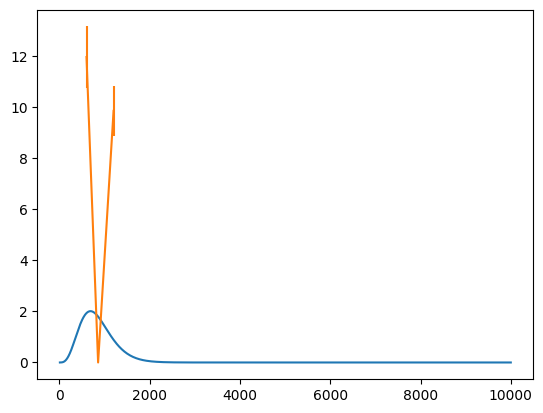

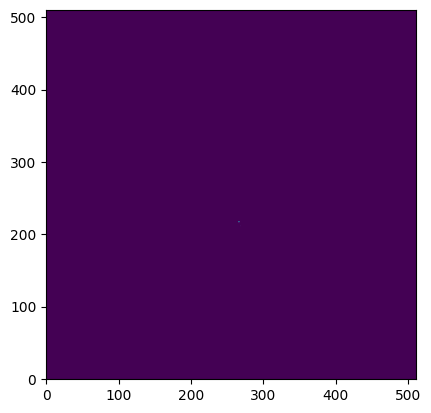

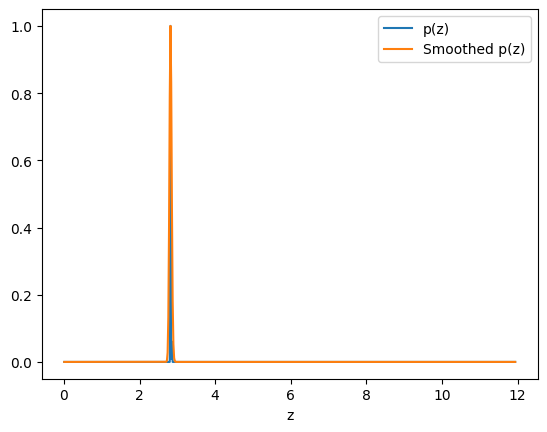

In [169]:
FIT_result = get_z_and_T_for_one_galaxy(FIR_indices_in_dublended[0])




In [174]:
# FIR_indices_in_dublended


In [172]:
p_z_optical

array([0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
       0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
       0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
       0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
       0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
       0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
       0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
       0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
       0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
       0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
       0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
       0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
       0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
       0.00000000e+000, 0

In [49]:
# 
# header_cosmos2018

# ################################

220242

# OPTICAL PHOTOMETRY
## Loading The COSMOS2015 catalog (Laigle+, 2016) for EAZY

In [5]:
from astropy.io import fits

# Demo running eazy-py

In [6]:
# %matplotlib inline

## Setup things 

For running on cloud environments, e.g, 

<p style="float:left; margin:5px"> <a href="https://colab.research.google.com/github/gbrammer/eazy-py/blob/master/docs/examples/HDFN-demo.ipynb"><img src="https://colab.research.google.com/assets/colab-badge.svg" style="float:left"/> </a> </p>

<p style="display:inline-block; margin:5px"> <a href="https://mybinder.org/v2/gh/gbrammer/eazy-py/HEAD?filepath=docs%2Fexamples%2FHDFN-demo.ipynb"><img src="https://mybinder.org/badge_logo.svg" /> </a> </p>


In [15]:
# # environment installation for hosted notebooks
# # (e.g., mybinder, GoogleCollab)
# import os
# import sys

# orig_wd = os.getcwd()

# try:
#     import eazy
#     HAS_EAZY = True
# except:
#     HAS_EAZY = False

# # mybinder
# if ('jovyan' in orig_wd):
#     if not HAS_EAZY:
#         print('Install on /home/jovyan')

#         os.chdir('/home/jovyan')
#         ! {sys.executable} -m pip install . -r requirements.txt

#         os.chdir(orig_wd)
    
#     try:
#         import grizli
#     except:
#         ! {sys.executable} -m pip install cython
#         ! {sys.executable} -m pip install git+https://github.com/gbrammer/grizli
            
#     try:
#         print('EAZYCODE = '+os.getenv('EAZYCODE'))
#     except:
#         %env EAZYCODE=/home/jovyan/eazy-photoz/

# # Google collab
# if ('/content' in orig_wd):
#     if not HAS_EAZY:
#         print('Install on /content (Google Collab')

#         os.chdir('/content')
#         !git clone https://github.com/gbrammer/eazy-py.git --recurse-submodule
#         os.chdir('/content/eazy-py')
#         ! {sys.executable} -m pip install . -r requirements.txt

#         os.chdir(orig_wd)
    
#     try:
#         import grizli
#     except:
#         ! {sys.executable} -m pip install cython
#         ! {sys.executable} -m pip install git+https://github.com/gbrammer/grizli
            
#     try:
#         print('EAZYCODE = '+os.getenv('EAZYCODE'))
#     except:
#         %env EAZYCODE=/content/eazy-py/eazy-photoz/

# try:
#     import astroquery
# except:
#     ! {sys.executable} -m pip install astroquery

# try:
#     import lxml
# except ImportError:
#     ! pip install lxml

In [107]:
# Module versions
import importlib
import sys
import time
print(time.ctime() + '\n')

print(sys.version + '\n')

for module in ['numpy', 'scipy', 'matplotlib','astropy','eazy', 'prospect']:
    #print(module)
    mod = importlib.import_module(module)
    print('{0:>20} : {1}'.format(module, mod.__version__))


Sat Aug 12 21:36:58 2023

3.9.6 (default, Mar 10 2023, 20:16:38) 
[Clang 14.0.3 (clang-1403.0.22.14.1)]

               numpy : 1.23.4
               scipy : 1.9.3
          matplotlib : 3.7.1
             astropy : 5.1.1
                eazy : 0.5.2.dev68
            prospect : 1.1.0


In [108]:
import os
import numpy as np
import matplotlib.pyplot as plt

import eazy

# Symlink templates & filters from the eazy-code repository
try:
    print('EAZYCODE = '+os.getenv('EAZYCODE'))
except:
    pass

if not os.path.exists('templates'):
    eazy.symlink_eazy_inputs() 

In [109]:
# quiet numpy/astropy warnings
import warnings
from astropy.utils.exceptions import AstropyWarning

np.seterr(all='ignore')
warnings.simplefilter('ignore', category=AstropyWarning)

In [110]:
pwd

'/Users/ptanouri/Desktop/eazy-py/docs/examples'

## HDFN catalog

Default parameters are stored in the file `eazy/data/zphot.param.default` in the repository.

Parameter that differ from defaults can be provided in a dictionary as follows.

In [111]:
params = {}
params['CATALOG_FILE'] = os.path.join(str(os.getenv('EAZYCODE')), '/inputs/hdfn_fs99_eazy.cat')

params['MAIN_OUTPUT_FILE'] = 'hdfn.eazypy'

# Galactic extinction
params['MW_EBV'] = 0.0103
params['CAT_HAS_EXTCORR'] = True

params['Z_STEP'] = 0.01
params['Z_MIN'] = 0.01
params['Z_MAX'] = 6.

params['PRIOR_ABZP'] = 25 
params['PRIOR_FILTER'] = 28 # K
params['PRIOR_FILE'] = 'templates/prior_K_TAO.dat'

params['TEMPLATES_FILE'] = 'templates/fsps_full/tweak_fsps_QSF_12_v3.param'

params['FIX_ZSPEC'] = False

params['IGM_SCALE_TAU'] = 1.0

translate_file = os.path.join(str(os.getenv('EAZYCODE')), 'inputs/zphot.translate')


In [112]:
translate_file

'None/inputs/zphot.translate'

## ZFOURGE catalog

Use the [ZFOURGE](https://sites.google.com/site/zfourge/) CDFS catalog from Straatman et al., pulled from [Vizier](https://vizier.cfa.harvard.edu/viz-bin/VizieR-3?-source=J/ApJ/830/51/zf_cdfs).

In [113]:
import pandas as pd
from grizli.catalog import query_tap_catalog

# field = 'cdfs'
field = 'uds'

# radec = {'cdfs':(53.0, -27.9), 
#          'uds':(34.3, -5.3)}

# # Vizier Table
# # https://vizier.cfa.harvard.edu/viz-bin/VizieR-3?-source=J/ApJ/830/51/zf_cdfs
# db = f'"J/ApJ/830/51/zf_{field}"'

# Bright mag to limit catalog size
MAX_KMAG = 22.5

# # # Get table from Vizier
# zf = query_tap_catalog(*radec[field], radius=60, db=db, vizier=True, 
#                        extra=f" AND (zspec > 0 OR FKsall > {10**(-0.4*(MAX_KMAG-25))})", verbose=True)

# print(f'\nFound {len(zf)} objects in {db}')

# cat_name = f'zfourge.{field}.zspec.vizier.csv'
cat_name = f'zfourge.{field}.zspec.vizier999.csv'
# zf.write(cat_name, overwrite=True)

print(cat_name)

zfourge.uds.zspec.vizier999.csv


In [323]:
#### Update parameters

# Predefined translate file
trans_name = f'zfourge.{field}.vizier.translate.csv'
# csv_trans = pd.read_csv(f'https://erda.ku.dk/vgrid/Gabriel%20Brammer/Catalogs/{trans_name}')
# csv_trans.to_csv(trans_name, index=False)

# New parameters
# params['MW_EBV'] = eazy.utils.get_irsa_dust(np.nanmedian(zf['ra']), np.nanmedian(zf['dec']))

params['CATALOG_FILE'] = cat_name
params['PRIOR_ABZP'] = 25
params['CATALOG_FORMAT'] = 'csv'
params['PRIOR_FILTER'] = 255
#params['TEMPLATES_FILE'] = 'templates/spline_templates_v2/tweak_spline.param'
params['MAIN_OUTPUT_FILE'] = f'zfourge.{field}'

params['SYS_ERR'] = 0.03

params['Z_MAX'] = 12.
params['Z_STEP'] = 0.005

translate_file = trans_name

In [324]:
cat_name

'zfourge.uds.zspec.vizier999.csv'

In [325]:
trans_name

'zfourge.uds.vizier.translate.csv'

## Initialize `eazy.photoz.PhotoZ` object

In [326]:
self = eazy.photoz.PhotoZ(param_file=None, translate_file=translate_file, zeropoint_file=None, 
                          params=params, load_prior=True, load_products=False)

Read default param file: /Users/ptanouri/Library/Python/3.9/lib/python/site-packages/eazy/data/zphot.param.default
Read CATALOG_FILE: zfourge.uds.zspec.vizier999.csv
   >>> NOBJ = 763
F8_0 e_F8_0 ( 21): IRAC/irac_tr4_2004-08-09.dat
F5_8 e_F5_8 ( 20): IRAC/irac_tr3_2004-08-09.dat
F4_5 e_F4_5 ( 19): IRAC/irac_tr2_2004-08-09.dat
F3_6 e_F3_6 ( 18): IRAC/irac_tr1_2004-08-09.dat
FKs e_FKs (255): FOURSTAR/Ks_cam_optics_sky.txt
Fu e_Fu ( 88): megaprime/cfht_mega_u_cfh9301.dat
FB e_FB (122): UKIDSS/B_qe.txt
FV e_FV ( 79): COSMOS/SUBARU_filter_V.txt
FR e_FR (123): UKIDSS/R_qe.txt
Fi e_Fi (124): UKIDSS/i_qe.txt
FY e_FY (266): VLT/hawki_y_ETC.dat
FJ e_FJ (263): UKIDSS/Table04_online.dat
FH e_FH (264): UKIDSS/Table05_online.dat
Set sys_err = 0.03 (positive=True)
Read PRIOR_FILE:  templates/prior_K_TAO.dat
Template grid: templates/fsps_full/tweak_fsps_QSF_12_v3.param (this may take some time)


100%|███████████████████████████████████████████████████| 12/12 [00:10<00:00,  1.14it/s]


Template   0: tweak_fsps_QSF_12_v3_001.dat (NZ=1).
Template   1: tweak_fsps_QSF_12_v3_002.dat (NZ=1).
Template   2: tweak_fsps_QSF_12_v3_003.dat (NZ=1).
Template   3: tweak_fsps_QSF_12_v3_004.dat (NZ=1).
Template   4: tweak_fsps_QSF_12_v3_005.dat (NZ=1).
Template   5: tweak_fsps_QSF_12_v3_006.dat (NZ=1).
Template   6: tweak_fsps_QSF_12_v3_007.dat (NZ=1).
Template   7: tweak_fsps_QSF_12_v3_008.dat (NZ=1).
Template   8: tweak_fsps_QSF_12_v3_009.dat (NZ=1).
Template   9: tweak_fsps_QSF_12_v3_010.dat (NZ=1).
Template  10: tweak_fsps_QSF_12_v3_011.dat (NZ=1).
Template  11: tweak_fsps_QSF_12_v3_012.dat (NZ=1).
Process templates: 11.018 s


511it [00:00, 6515.73it/s]


In [151]:
# plt.hist(self.zgrid)


In [161]:
common_z_grid = self.zgrid

In [162]:
len(common_z_grid)

511

#### Iterative zeropoint corrections

Iteration:  0


100%|█████████████████████████████████████████████████| 511/511 [00:08<00:00, 61.82it/s]


Compute best fits
fit_best: 0.2 s (n_proc=1,  NOBJ=763)
Fit 8.8 s (n_proc=8, NOBJ=763)
Iterative correction - zeropoint / template
Iteration:  1


100%|█████████████████████████████████████████████████| 511/511 [00:08<00:00, 61.35it/s]


Compute best fits
fit_best: 0.2 s (n_proc=1,  NOBJ=763)
Fit 8.7 s (n_proc=8, NOBJ=763)
Iterative correction - zeropoint / template
Iteration:  2


100%|█████████████████████████████████████████████████| 511/511 [00:08<00:00, 61.75it/s]


Compute best fits
fit_best: 0.2 s (n_proc=1,  NOBJ=763)
Fit 8.8 s (n_proc=8, NOBJ=763)
Iterative correction - zeropoint / template


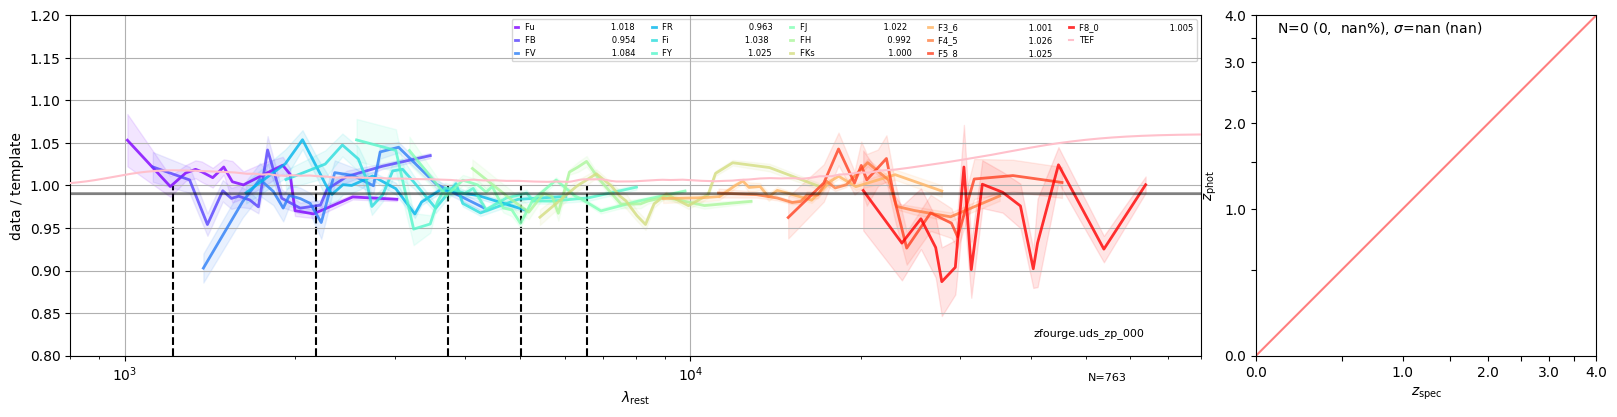

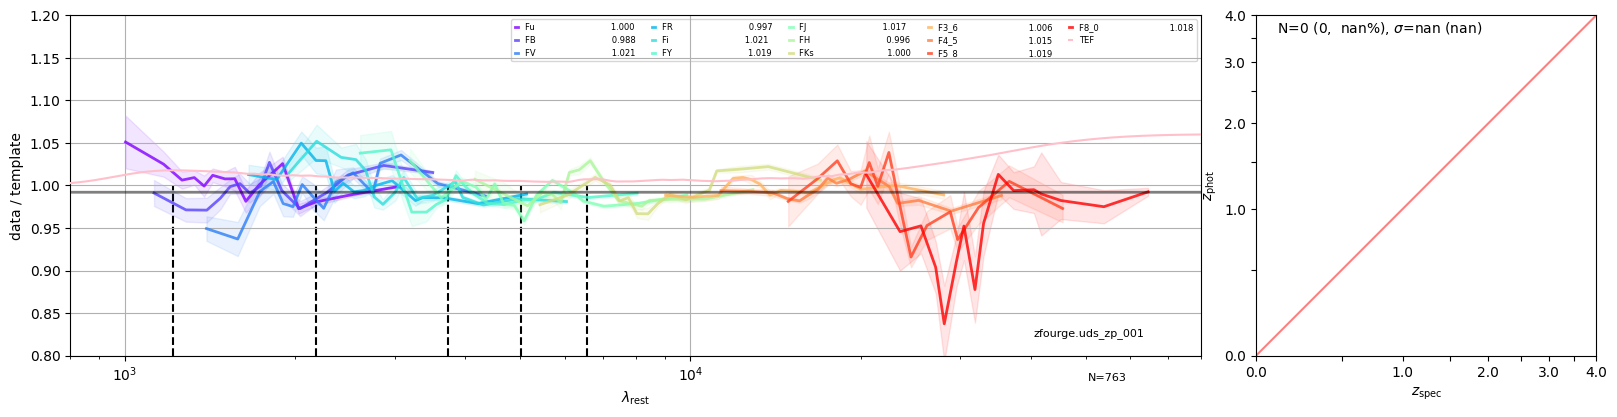

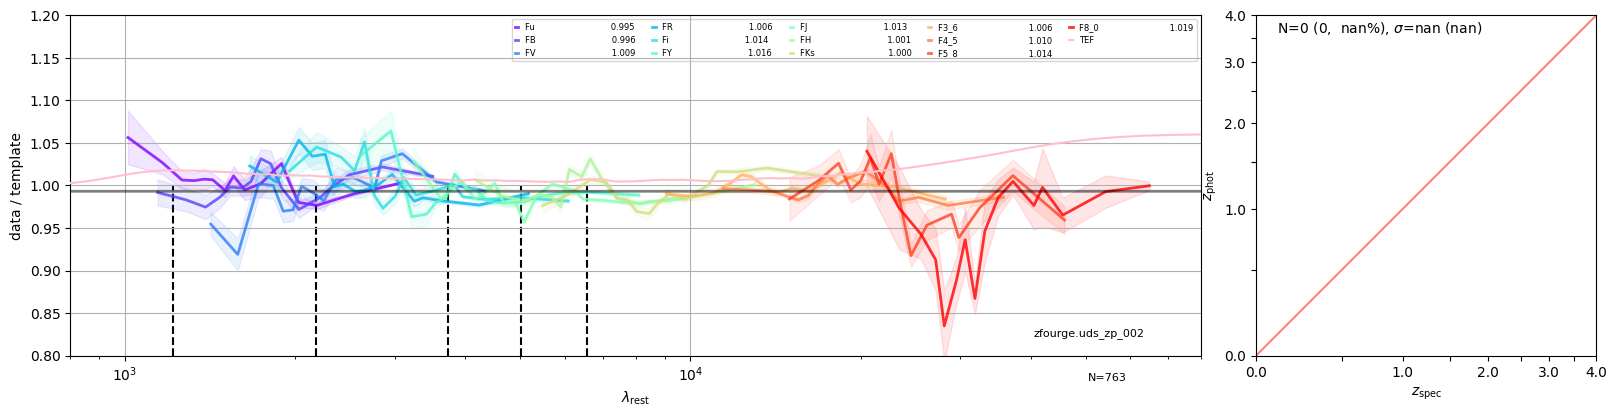

In [327]:
NITER = 3
NBIN = np.minimum(self.NOBJ//100, 180)

self.param.params['VERBOSITY'] = 1.
for iter in range(NITER):
    print('Iteration: ', iter)
    
    sn = self.fnu/self.efnu
    clip = (sn > 1).sum(axis=1) > 4 # Generally make this higher to ensure reasonable fits
    self.iterate_zp_templates(idx=self.idx[clip], update_templates=False, 
                              update_zeropoints=True, iter=iter, n_proc=8, 
                              save_templates=False, error_residuals=False, 
                              NBIN=NBIN, get_spatial_offset=False)

#### Now fit the whole catalog

In [345]:
# Turn off error corrections derived above
self.set_sys_err(positive=True)

# Full catalog
sample = np.isfinite(self.ZSPEC)

# fit_parallel renamed to fit_catalog 14 May 2021
self.fit_catalog(self.idx[sample], n_proc=8)

Set sys_err = 0.03 (positive=True)


100%|█████████████████████████████████████████████████| 511/511 [00:08<00:00, 60.90it/s]


Compute best fits
fit_best: 0.2 s (n_proc=1,  NOBJ=763)
Fit 8.8 s (n_proc=8, NOBJ=763)


In [119]:
# Show zspec-zphot comparison
# fig = self.zphot_zspec()

In [140]:
common_z_grid


0.01

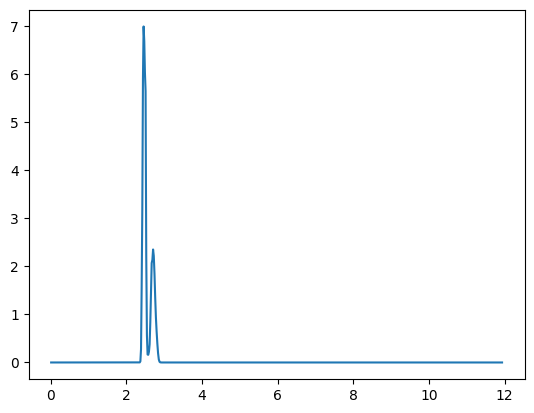

In [136]:
ind = 76

self.full_logprior[ind,:]
plt.plot(self.zgrid,np.exp(self.lnp[ind,:]))

# best_z_val=common_z_grid[np.where(np.exp(self.lnp[ind,:])==max(np.exp(self.lnp[ind,:])))[0][0]]

In [513]:
print(best_z_val)

1.79404811111151


In [64]:
len(self.zgrid)

NameError: name 'self' is not defined

In [93]:
ind = 78
# self.lnp_with_prior

# plt.plot(self.zgrid,np.exp(self.lnp_beta[ind,:]))


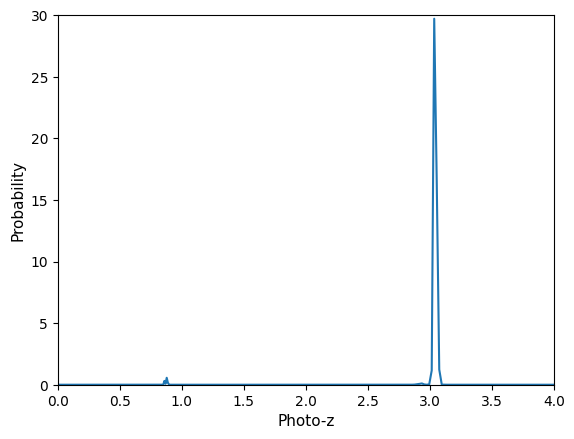

In [363]:
ind = 46

plt.plot(self.zgrid,np.exp(self.lnp[ind,:]))

plt.ylim(0,30)
plt.xlim(0,4)

plt.xlabel('Photo-z', fontsize = 11)
plt.ylabel('Probability', fontsize = 11)
plt.show()

In [158]:
#29,46


0.01

In [359]:
self.cat[''][46]

932

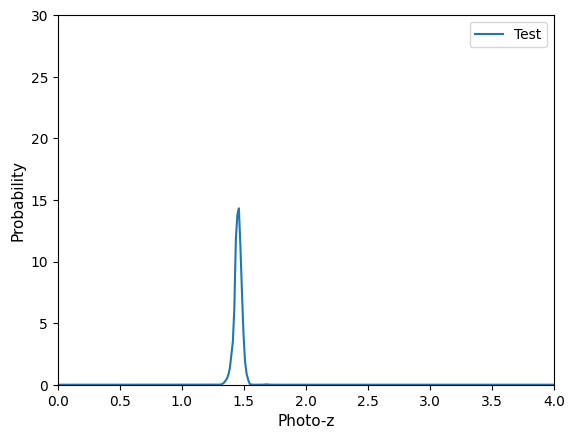

In [166]:
ind =762



# np.array(zout['z_spec'])[ind]
plt.plot(common_z_grid,np.exp(self.lnp[ind,:]), label = 'Test')



plt.ylim(0,30)
plt.xlim(0,4)

plt.xlabel('Photo-z', fontsize = 11)
plt.ylabel('Probability', fontsize = 11)
plt.legend()
plt.show()

In [254]:
self.lnp[ind,:]

array([-2.39303040e+02, -2.38418823e+02, -2.37553101e+02, -2.36541931e+02,
       -2.35266373e+02, -2.33816803e+02, -2.32671906e+02, -2.32491562e+02,
       -2.31469757e+02, -2.29704819e+02, -2.28285873e+02, -2.27069717e+02,
       -2.26327957e+02, -2.25168701e+02, -2.23835388e+02, -2.22793152e+02,
       -2.22014542e+02, -2.21273392e+02, -2.20239197e+02, -2.19057236e+02,
       -2.17814728e+02, -2.16480392e+02, -2.15214203e+02, -2.14155640e+02,
       -2.13317337e+02, -2.12723907e+02, -2.12260040e+02, -2.11923615e+02,
       -2.11857544e+02, -2.12072433e+02, -2.12809601e+02, -2.14964554e+02,
       -2.19922913e+02, -2.27187561e+02, -2.33446777e+02, -2.35579056e+02,
       -2.33586090e+02, -2.29888077e+02, -2.27342621e+02, -2.27234436e+02,
       -2.28103973e+02, -2.28582748e+02, -2.28106842e+02, -2.26266266e+02,
       -2.23590393e+02, -2.20589050e+02, -2.18077835e+02, -2.16369766e+02,
       -2.14727386e+02, -2.13663818e+02, -2.12452316e+02, -2.11876251e+02,
       -2.10419281e+02, -

# Code to Combine my FIR p(z) with EAZY p(z)

# ################################################

# ################################################

In [79]:

get_file = fits.open("Cosmos2015.fit")[1]


header = get_file.header
filter1 = get_file.data


In [83]:
# cosmos2015['Seq']

In [89]:
# ID_common_galaxies

In [93]:


cosmos2015_filtered_index = np.array([index for index, value in enumerate(filter1['Seq']) if value in ID_common_galaxies])




In [95]:
# cosmos2015_filtered_index

In [84]:
# indices_in_dublended

In [100]:
def flux_density(ab_mag):
    return 10 ** ((ab_mag - 23.9) / -2.5)

def flux_density_error(ab_mag, delta_ab_mag):

    df_dmag = flux_density(ab_mag)

    delta_flux = abs(df_dmag) * delta_ab_mag* math.log(10) / 2.5

    return delta_flux



def mag_to_mjy(ab_mag,delta_ab_mag):
    
    

    def flux_density(ab_mag):
        return 10 ** ((ab_mag - 23.9) / -2.5)

    def flux_density_error(ab_mag, delta_ab_mag):

        df_dmag = flux_density(ab_mag)

        delta_flux = abs(df_dmag) * delta_ab_mag* math.log(10) / 2.5

        return delta_flux
    
    return (flux_density(ab_mag),flux_density_error(ab_mag, delta_ab_mag))

# mag_to_mjy(20.3836,0.1145)

In [331]:
# len(FIR_index)


In [339]:
# cosmos2015_filtered_index

In [341]:
optical_index

814

In [420]:
# cosmos2015_filtered_index

# Dub data vizier
https://vizier.cds.unistra.fr/viz-bin/VizieR?-source=J/ApJ/864/56
# Cosmos 2016
https://vizier.cds.unistra.fr/viz-bin/VizieR-4

In [342]:
import numpy as np
import pandas as pd

# Create some sample data

header_name=['Seq', 'RAJ2000', 'DEJ2000','Fu','e_Fu','FB','e_FB','FV','e_FV','FR','e_FR','Fi','e_Fi','FKs','e_FKs','FJ','e_FJ','FH','e_FH','FY','e_FY','F3_6','e_F3_6','F4_5','e_F4_5','F5_8','e_F5_8','F8_0','e_F8_0']


# FIR_index
cosmos2015_filtered_index  = optical_index


Seq = filter1['Seq'][cosmos2015_filtered_index]



RAJ2000 = filter1['RAJ2000'][cosmos2015_filtered_index]
DEJ2000 = filter1['DEJ2000'][cosmos2015_filtered_index]
Fu = flux_density(filter1['umag'][cosmos2015_filtered_index])
e_Fu = flux_density_error(filter1['umag'][cosmos2015_filtered_index],filter1['e_umag'][cosmos2015_filtered_index])

FB = flux_density(filter1['Bmag'][cosmos2015_filtered_index])
e_FB = flux_density_error(filter1['Bmag'][cosmos2015_filtered_index],filter1['e_Bmag'][cosmos2015_filtered_index])

FV = flux_density(filter1['Vmag'][cosmos2015_filtered_index])
e_FV = flux_density_error(filter1['Vmag'][cosmos2015_filtered_index],filter1['e_Vmag'][cosmos2015_filtered_index])

FR = flux_density(filter1['rmag'][cosmos2015_filtered_index])
e_FR = flux_density_error(filter1['rmag'][cosmos2015_filtered_index],filter1['e_rmag'][cosmos2015_filtered_index])

Fi = flux_density(filter1['ipmag'][cosmos2015_filtered_index])
e_Fi = flux_density_error(filter1['ipmag'][cosmos2015_filtered_index],filter1['e_ipmag'][cosmos2015_filtered_index])


FKs = flux_density(filter1['Ksmag'][cosmos2015_filtered_index])
e_FKs = flux_density_error(filter1['Ksmag'][cosmos2015_filtered_index],filter1['e_Ksmag'][cosmos2015_filtered_index])

FJ = flux_density(filter1['Jmag'][cosmos2015_filtered_index])
e_FJ = flux_density_error(filter1['Jmag'][cosmos2015_filtered_index],filter1['e_Jmag'][cosmos2015_filtered_index])

FH = flux_density(filter1['Hmag'][cosmos2015_filtered_index])
e_FH = flux_density_error(filter1['Hmag'][cosmos2015_filtered_index],filter1['e_Hmag'][cosmos2015_filtered_index])

FY = flux_density(filter1['Ymag'][cosmos2015_filtered_index])
e_FY = flux_density_error(filter1['Ymag'][cosmos2015_filtered_index],filter1['e_Ymag'][cosmos2015_filtered_index])

F3_6 = flux_density(filter1['_3_6mag'][cosmos2015_filtered_index])
e_F3_6 = flux_density_error(filter1['_3_6mag'][cosmos2015_filtered_index],filter1['e_3_6mag'][cosmos2015_filtered_index])

F4_5 = flux_density(filter1['_4_5mag'][cosmos2015_filtered_index])
e_F4_5 = flux_density_error(filter1['_4_5mag'][cosmos2015_filtered_index],filter1['e_4_5mag'][cosmos2015_filtered_index])

F5_8 = flux_density(filter1['_5_8mag'][cosmos2015_filtered_index])
e_F5_8 = flux_density_error(filter1['_5_8mag'][cosmos2015_filtered_index],filter1['e_5_8mag'][cosmos2015_filtered_index])

F8_0 = flux_density(filter1['_8_0mag'][cosmos2015_filtered_index])
e_F8_0 = flux_density_error(filter1['_8_0mag'][cosmos2015_filtered_index],filter1['e_8_0mag'][cosmos2015_filtered_index])

e_Jmag = filter1['e_Jmag'][cosmos2015_filtered_index]

# F250_Dublended = Dub_data['F250'][FIR_indices_in_dublended]

# z_photo = filter1['zphot']

# F250 = filter1['F250um']
# F250_err = filter1['e_F250tot']

# F350 = filter1['F350um']
# F350_err = filter1['e_F350tot']

# F500 = filter1['F500um']
# F500_err = filter1['e_F500tot']



# Combine the data into a single array
combined_data = np.vstack((Seq, RAJ2000, DEJ2000,Fu,e_Fu,FB,e_FB,FV,e_FV,FR,e_FR,Fi,e_Fi,FKs,e_FKs,FJ,e_FJ,FH,e_FH,FY,e_FY,F3_6,e_F3_6,F4_5,e_F4_5,F5_8,e_F5_8,F8_0,e_F8_0 )).T

# Create a Pandas DataFrame from the combined data
df = pd.DataFrame(combined_data, columns= header_name)
                  

# Save the DataFrame to a CSV file
df.to_csv('zfourge.uds.zspec.vizier999.csv', index=False)





# df


In [182]:
# len(cosmos2015_filtered_index)

In [180]:
# len(filter1['e_Jmag'])

In [178]:
# cosmos2015_filtered_index

In [366]:
# p1_z = np.array([0.0031071 , 0.0032329 , 0.00344896, 0.00371528, 0.0040092 ,
#               0.00432339, 0.00465681, 0.00500987, 0.00538322, 0.00577748,
#               0.00619329, 0.00663123, 0.00709189, 0.00757581, 0.00808352,
#               0.0086155 , 0.00917222, 0.00975409, 0.01036149, 0.01099478,
#               0.01165424, 0.01234015, 0.01305271, 0.01379208, 0.0145584 ,
#               0.01535173, 0.01617211, 0.01701949, 0.01789382, 0.01879497,
#               0.01972278, 0.02067703, 0.02165746, 0.02266378, 0.02369562,
#               0.02475261, 0.02583431, 0.02694025, 0.02806995, 0.02922285,
#               0.03039839, 0.03159597, 0.03281498, 0.03405476, 0.03531464,
#               0.03659393, 0.03789193, 0.03920791, 0.04054115, 0.04189088,
#               0.04325638, 0.04463686, 0.04603158, 0.04743976, 0.04886064,
#               0.05029345, 0.05173742, 0.05319181, 0.05465584, 0.05612877,
#               0.05760986, 0.05909837, 0.06059356, 0.06209473, 0.06360115,
#               0.06511213, 0.06662698, 0.06814501, 0.06966554, 0.07118794,
#               0.07271153, 0.07423568, 0.07575977, 0.07728317, 0.07880529,
#               0.08032552, 0.08184328, 0.08335799, 0.0848691 , 0.08637604,
#               0.08787829, 0.0893753 , 0.09086656, 0.09235156, 0.09382979,
#               0.09530079, 0.09676406, 0.09821916, 0.09966562, 0.101103  ,
#               0.10253089, 0.10394887, 0.10535655, 0.10675353, 0.10813945,
#               0.10951396, 0.11087672, 0.11222742, 0.11356575, 0.11489144,
#               0.11620423, 0.11750388, 0.11879018, 0.12006295, 0.12132201,
#               0.12256724, 0.12379852, 0.12501578, 0.12621896, 0.12740806,
#               0.12858309, 0.1297441 , 0.13089118, 0.13202443, 0.13314401,
#               0.13425012, 0.13534297, 0.13642283, 0.13748999, 0.13854478,
#               0.13958756, 0.14061873, 0.14163871, 0.14264795, 0.14364695,
#               0.1446362 , 0.14561625, 0.14658763, 0.14755094, 0.14850674,
#               0.14945563, 0.15039822, 0.15133513, 0.15226695, 0.15319431,
#               0.1541178 , 0.15503801, 0.15595552, 0.1568709 , 0.15778469,
#               0.15869739, 0.15960951, 0.16052148, 0.16143374, 0.16234667,
#               0.1632606 , 0.16417585, 0.16509267, 0.16601128, 0.16693183,
#               0.16785444, 0.16877919, 0.16970609, 0.17063511, 0.17156617,
#               0.17249915, 0.17343388, 0.17437014, 0.17530768, 0.1762462 ,
#               0.17718535, 0.17812478, 0.17906408, 0.18000281, 0.18094053,
#               0.18187675, 0.18281098, 0.1837427 , 0.18467139, 0.18559653,
#               0.18651756, 0.18743397, 0.18834521, 0.18925075, 0.19015007,
#               0.19104266, 0.19192801, 0.19280566, 0.19367512, 0.19453595,
#               0.19538772, 0.19623003, 0.19706248, 0.19788471, 0.19869639,
#               0.19949719, 0.20028682, 0.20106501, 0.2018315 , 0.20258607,
#               0.20332851, 0.20405864, 0.20477628, 0.20548129, 0.20617354,
#               0.20685292, 0.20751933, 0.20817269, 0.20881294, 0.20944003,
#               0.21005393, 0.21065461, 0.21124208, 0.21181634, 0.21237741,
#               0.21292534, 0.21346017, 0.21398198, 0.21449085, 0.21498687,
#               0.21547016, 0.21594086, 0.21639912, 0.2168451 , 0.21727899,
#               0.217701  , 0.21811135, 0.21851029, 0.21889809, 0.21927503,
#               0.21964141, 0.21999757, 0.22034384, 0.2206806 , 0.22100823,
#               0.22132712, 0.2216377 , 0.22194041, 0.22223568, 0.222524  ,
#               0.22280582, 0.22308164, 0.22335195, 0.22361726, 0.22387806,
#               0.22413488, 0.22438822, 0.22463859, 0.22488651, 0.22513248,
#               0.225377  , 0.22562055, 0.22586363, 0.22610669, 0.22635019,
#               0.22659457, 0.22684025, 0.22708763, 0.22733709, 0.22758899,
#               0.22784366, 0.22810141, 0.22836253, 0.22862726, 0.22889584,
#               0.22916845, 0.22944525, 0.22972639, 0.23001194, 0.23030199,
#               0.23059655, 0.23089561, 0.23119914, 0.23150706, 0.23181924,
#               0.23213555, 0.23245579, 0.23277974, 0.23310715, 0.23343774,
#               0.23377117, 0.23410711, 0.23444517, 0.23478495, 0.23512601,
#               0.23546792, 0.23581019, 0.23615235, 0.23649389, 0.23683431,
#               0.23717311, 0.23750975, 0.23784374, 0.23817457, 0.23850175,
#               0.23882478, 0.23914322, 0.2394566 , 0.23976453, 0.24006661,
#               0.24036247, 0.24065179, 0.24093429, 0.24120969, 0.2414778 ,
#               0.24173844, 0.24199146, 0.24223677, 0.24247432, 0.24270408,
#               0.24292608, 0.24314037, 0.24334702, 0.24354617, 0.24373794,
#               0.24392252, 0.24410008, 0.24427083, 0.24443499, 0.24459279,
#               0.24474446, 0.24489023, 0.24503034, 0.24516502, 0.2452945 ,
#               0.24541897, 0.24553865, 0.24565372, 0.24576435, 0.24587069,
#               0.24597288, 0.24607103, 0.24616525, 0.24625563, 0.24634222,
#               0.24642508, 0.24650426, 0.24657979, 0.24665169, 0.24671999,
#               0.2467847 , 0.24684584, 0.24690344, 0.24695752, 0.24700814,
#               0.24705534, 0.24709919, 0.24713979, 0.24717724, 0.24721167,
#               0.24724324, 0.24727213, 0.24729855, 0.24732274, 0.24734495,
#               0.24736548, 0.24738463, 0.24740275, 0.24742021, 0.24743738,
#               0.24745468, 0.24747252, 0.24749135, 0.24751161, 0.24753376,
#               0.24755827, 0.2475856 , 0.24761622, 0.24765059, 0.24768916,
#               0.24773238, 0.24778067, 0.24783445, 0.24789411, 0.24796002,
#               0.24803251, 0.24811192, 0.24819853, 0.24829258, 0.24839432,
#               0.24850392, 0.24862156, 0.24874734, 0.24888135, 0.24902366,
#               0.24917427, 0.24933317, 0.2495003 , 0.24967559, 0.24985891,
#               0.25005013, 0.25024905, 0.25045549, 0.25066921, 0.25088995,
#               0.25111743, 0.25135136, 0.25159141, 0.25183725, 0.25208851,
#               0.25234484, 0.25260584, 0.25287112, 0.25314028, 0.25341289,
#               0.25368854, 0.2539668 , 0.25424724, 0.25452941, 0.25481288,
#               0.25509721, 0.25538195, 0.25566668, 0.25595094, 0.2562343 ,
#               0.25651633, 0.2567966 , 0.25707469, 0.25735019, 0.25762267,
#               0.25789175, 0.25815703, 0.25841811, 0.25867464, 0.25892623,
#               0.25917255, 0.25941323, 0.25964795, 0.25987639, 0.26009824,
#               0.26031319, 0.26052096, 0.26072127, 0.26091385, 0.26109845,
#               0.2612748 , 0.26144267, 0.26160181, 0.26175199, 0.26189297,
#               0.26202452, 0.26214639, 0.26225835, 0.26236012, 0.26245145,
#               0.26253204, 0.26260157, 0.26265972, 0.26270611, 0.26274034,
#               0.26276195, 0.26277045, 0.26276529, 0.26274585, 0.26271145,
#               0.26266135, 0.26259469, 0.26251058, 0.26240797, 0.26228577,
#               0.26214275, 0.26197756, 0.26178876, 0.26157475, 0.26133384,
#               0.26106418, 0.26076377, 0.26043051, 0.26006212, 0.2596562 ,
#               0.25921019, 0.2587214 , 0.25818699, 0.257604  , 0.25696934,
#               0.25627978, 0.25553199, 0.25472256, 0.25384795, 0.25290458,
#               0.2518888 , 0.25079693, 0.24962525, 0.24837006, 0.2470277 ,
#               0.24559454, 0.24406704, 0.24244175, 0.24071538, 0.23888481,
#               0.23694708, 0.23489949, 0.23273959, 0.23046522, 0.22807455,
#               0.22556607, 0.22293869, 0.2201917 , 0.21732482, 0.21433824,
#               0.21123261, 0.20800907, 0.20466928, 0.20121542, 0.19765017,
#               0.19397675, 0.19019892, 0.18632095, 0.18234763, 0.17828423,
#               0.17413652, 0.16991073, 0.16561351, 0.16125192, 0.1568334 ,
#               0.15236611, 0.14786283, 0.14336636, 0.13904583, 0.13537711,
#               0.13318068])

In [439]:
p1_z = np.array([0.01133523, 0.01175475, 0.01247294, 0.01335362, 0.0143192 ,
              0.01534394, 0.01642336, 0.01755796, 0.01874889, 0.01999726,
              0.02130412, 0.0226704 , 0.02409694, 0.02558445, 0.02713354,
              0.02874469, 0.03041824, 0.0321544 , 0.03395326, 0.03581475,
              0.03773866, 0.03972462, 0.04177214, 0.04388055, 0.04604904,
              0.04827666, 0.0505623 , 0.05290471, 0.05530248, 0.05775408,
              0.06025783, 0.06281192, 0.06541441, 0.06806324, 0.07075625,
              0.07349116, 0.07626559, 0.07907708, 0.08192307, 0.08480094,
              0.08770802, 0.09064157, 0.0935988 , 0.09657691, 0.09957306,
              0.1025844 , 0.10560808, 0.10864125, 0.1116811 , 0.11472482,
              0.11776964, 0.12081285, 0.12385177, 0.12688381, 0.12990642,
              0.13291713, 0.13591355, 0.1388934 , 0.14185444, 0.14479458,
              0.14771177, 0.15060412, 0.15346979, 0.15630708, 0.15911436,
              0.16189014, 0.16463301, 0.16734166, 0.17001489, 0.17265161,
              0.17525079, 0.17781154, 0.18033302, 0.1828145 , 0.18525532,
              0.18765491, 0.19001277, 0.19232848, 0.19460168, 0.19683208,
              0.19901943, 0.20116358, 0.2032644 , 0.20532183, 0.20733583,
              0.20930645, 0.21123375, 0.21311784, 0.21495887, 0.21675704,
              0.21851257, 0.22022573, 0.2218968 , 0.22352613, 0.22511407,
              0.22666103, 0.22816744, 0.22963376, 0.23106049, 0.23244817,
              0.23379734, 0.23510861, 0.2363826 , 0.23761997, 0.2388214 ,
              0.23998761, 0.24111935, 0.24221739, 0.24328252, 0.24431558,
              0.2453174 , 0.24628885, 0.24723081, 0.24814417, 0.24902986,
              0.24988877, 0.25072184, 0.25152999, 0.25231413, 0.2530752 ,
              0.25381408, 0.25453167, 0.25522885, 0.25590647, 0.25656535,
              0.25720629, 0.25783006, 0.25843738, 0.25902893, 0.25960537,
              0.26016728, 0.26071522, 0.26124969, 0.26177113, 0.26227994,
              0.26277646, 0.26326096, 0.26373369, 0.26419481, 0.26464444,
              0.26508266, 0.26550947, 0.26592486, 0.26632873, 0.26672096,
              0.2671014 , 0.26746983, 0.26782603, 0.26816972, 0.26850062,
              0.26881841, 0.26912276, 0.26941332, 0.26968973, 0.26995163,
              0.27019866, 0.27043046, 0.27064667, 0.27084696, 0.27103098,
              0.27119842, 0.271349  , 0.27148244, 0.27159849, 0.27169694,
              0.27177759, 0.27184029, 0.27188491, 0.27191135, 0.27191955,
              0.27190949, 0.27188117, 0.27183464, 0.27176997, 0.27168727,
              0.27158669, 0.27146841, 0.27133263, 0.2711796 , 0.27100959,
              0.2708229 , 0.27061987, 0.27040084, 0.2701662 , 0.26991637,
              0.26965177, 0.26937286, 0.26908012, 0.26877404, 0.26845513,
              0.26812393, 0.26778097, 0.26742682, 0.26706204, 0.26668721,
              0.26630291, 0.26590973, 0.26550826, 0.26509909, 0.2646828 ,
              0.26425998, 0.26383121, 0.26339703, 0.262958  , 0.26251466,
              0.26206751, 0.26161705, 0.26116373, 0.26070801, 0.26025028,
              0.25979092, 0.25933028, 0.25886866, 0.25840632, 0.25794351,
              0.2574804 , 0.25701716, 0.25655388, 0.25609065, 0.25562749,
              0.2551644 , 0.25470133, 0.25423821, 0.25377493, 0.25331135,
              0.2528473 , 0.25238259, 0.25191703, 0.25145038, 0.25098243,
              0.25051291, 0.25004161, 0.24956827, 0.24909268, 0.2486146 ,
              0.24813385, 0.24765023, 0.2471636 , 0.24667383, 0.24618081,
              0.2456845 , 0.24518488, 0.24468195, 0.24417579, 0.2436665 ,
              0.24315422, 0.24263916, 0.24212154, 0.24160164, 0.24107979,
              0.24055635, 0.24003171, 0.2395063 , 0.23898058, 0.23845504,
              0.23793019, 0.23740654, 0.23688464, 0.23636504, 0.23584827,
              0.23533489, 0.23482544, 0.23432044, 0.23382041, 0.23332582,
              0.23283714, 0.2323548 , 0.23187921, 0.23141072, 0.23094966,
              0.2304963 , 0.23005088, 0.2296136 , 0.2291846 , 0.22876398,
              0.22835178, 0.22794802, 0.22755265, 0.22716559, 0.22678671,
              0.22641585, 0.22605279, 0.22569728, 0.22534906, 0.2250078 ,
              0.22467316, 0.22434478, 0.22402226, 0.22370518, 0.2233931 ,
              0.22308558, 0.22278214, 0.2224823 , 0.22218556, 0.22189143,
              0.22159938, 0.22130891, 0.22101948, 0.22073058, 0.22044166,
              0.22015221, 0.21986168, 0.21956955, 0.21927529, 0.21897839,
              0.21867831, 0.21837455, 0.21806661, 0.217754  , 0.21743623,
              0.21711283, 0.21678337, 0.2164474 , 0.21610452, 0.21575434,
              0.21539651, 0.2150307 , 0.21465659, 0.21427394, 0.21388251,
              0.21348211, 0.21307259, 0.21265385, 0.21222582, 0.21178848,
              0.21134187, 0.21088605, 0.21042114, 0.20994731, 0.20946477,
              0.20897377, 0.20847461, 0.20796761, 0.20745315, 0.20693162,
              0.20640347, 0.20586914, 0.20532911, 0.20478389, 0.20423397,
              0.20367989, 0.20312214, 0.20256127, 0.20199778, 0.20143218,
              0.20086496, 0.20029661, 0.19972757, 0.19915828, 0.19858916,
              0.19802059, 0.19745292, 0.19688648, 0.19632157, 0.19575846,
              0.19519738, 0.19463856, 0.19408217, 0.19352839, 0.19297737,
              0.19242922, 0.19188406, 0.191342  , 0.19080312, 0.19026751,
              0.18973526, 0.18920646, 0.18868119, 0.18815957, 0.18764169,
              0.1871277 , 0.18661772, 0.18611191, 0.18561044, 0.18511352,
              0.18462134, 0.18413414, 0.18365216, 0.18317567, 0.18270494,
              0.18224026, 0.18178192, 0.18133025, 0.18088553, 0.18044808,
              0.1800182 , 0.17959619, 0.17918233, 0.17877689, 0.1783801 ,
              0.1779922 , 0.17761337, 0.17724378, 0.17688355, 0.17653277,
              0.17619148, 0.17585967, 0.17553732, 0.17522432, 0.17492052,
              0.17462575, 0.17433975, 0.17406224, 0.17379287, 0.17353126,
              0.17327698, 0.17302956, 0.17278846, 0.17255314, 0.172323  ,
              0.17209743, 0.17187576, 0.17165733, 0.17144144, 0.17122736,
              0.17101439, 0.17080177, 0.17058877, 0.17037465, 0.17015866,
              0.16994009, 0.16971819, 0.16949226, 0.16926161, 0.16902555,
              0.16878342, 0.16853458, 0.16827841, 0.16801431, 0.16774171,
              0.16746005, 0.1671688 , 0.16686745, 0.16655551, 0.16623251,
              0.16589799, 0.1655515 , 0.16519263, 0.16482093, 0.164436  ,
              0.16403742, 0.16362476, 0.16319761, 0.16275554, 0.16229809,
              0.1618248 , 0.1613352 , 0.16082877, 0.16030498, 0.15976327,
              0.15920304, 0.15862365, 0.15802443, 0.15740466, 0.15676359,
              0.1561004 , 0.15541425, 0.15470424, 0.15396944, 0.15320885,
              0.15242145, 0.15160616, 0.15076189, 0.14988747, 0.14898175,
              0.14804352, 0.14707156, 0.14606464, 0.14502152, 0.14394095,
              0.14282172, 0.14166261, 0.14046245, 0.13922008, 0.13793441,
              0.13660441, 0.13522913, 0.13380767, 0.13233927, 0.13082323,
              0.129259  , 0.12764615, 0.12598439, 0.12427358, 0.12251374,
              0.12070506, 0.11884792, 0.11694287, 0.11499065, 0.11299223,
              0.11094873, 0.10886153, 0.10673217, 0.10456244, 0.10235428,
              0.10010989, 0.09783162, 0.09552204, 0.09318388, 0.09082005,
              0.08843363, 0.08602783, 0.08360601, 0.08117164, 0.07872829,
              0.07627983, 0.07383248, 0.07140805, 0.06909442, 0.06713995,
              0.06597343])

# Code to Combine my FIR p(z) with EAZY p(z)

In [421]:
z_cosmos_optical = filter1['zphot'][cosmos2015_filtered_index]

In [383]:
ind = 7
# common_z_grid

In [374]:
# p_FIR
# combined_pdf

# combined_pdf


In [387]:
import numpy as np
from scipy.signal import find_peaks
import matplotlib.pyplot as plt


In [507]:
list_of_degen = []
for i in range(len(optical_index)):
    peaks, _ = find_peaks(np.exp(self.lnp[i,:]), height=0.5)
    
    if len(peaks) >= 2:
        list_of_degen.append(i)
        
        
   

In [508]:
len(list_of_degen)

290

In [474]:
list_of_degen

[60, 71, 253, 257, 324, 330, 340, 365, 369, 398, 434, 471, 504, 508, 626]

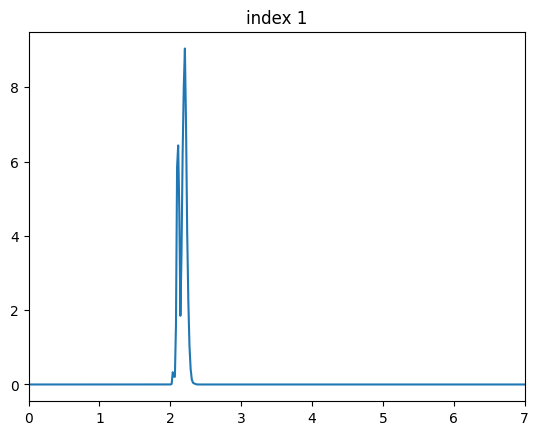

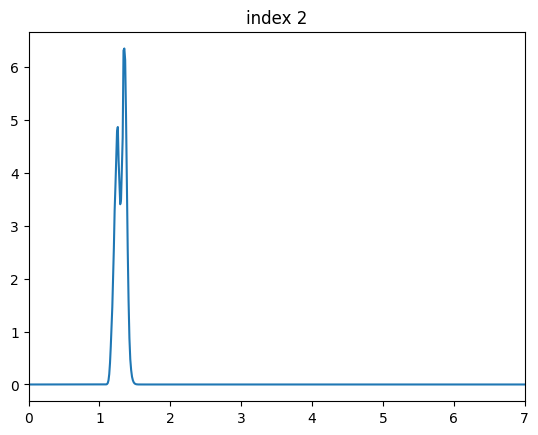

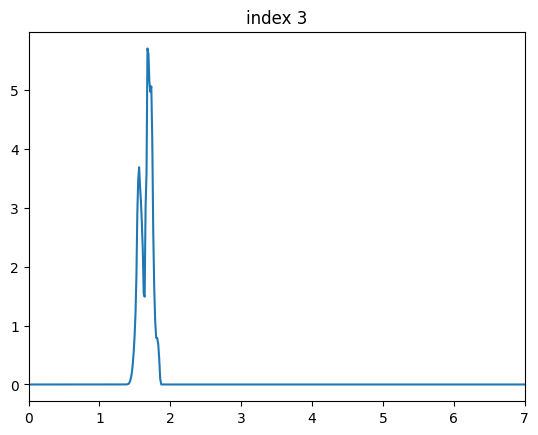

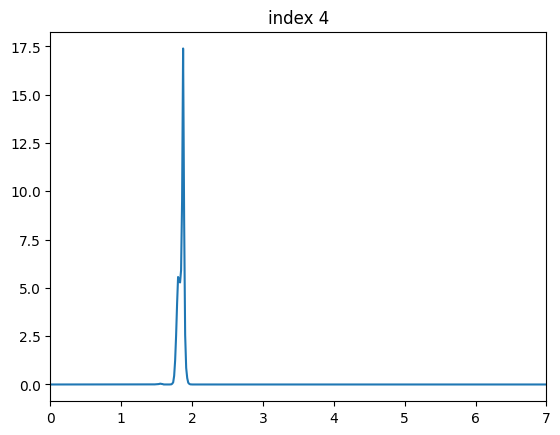

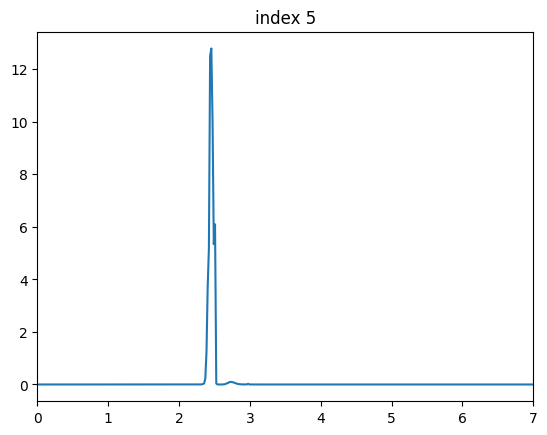

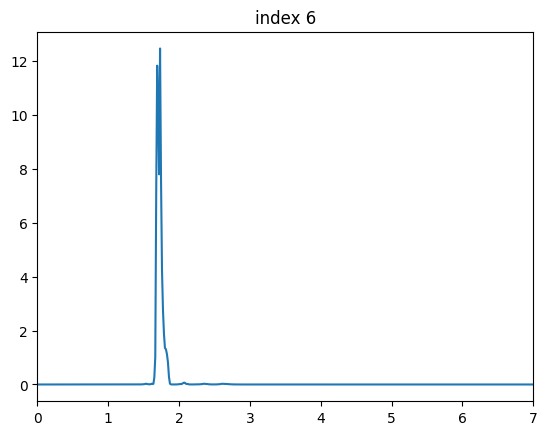

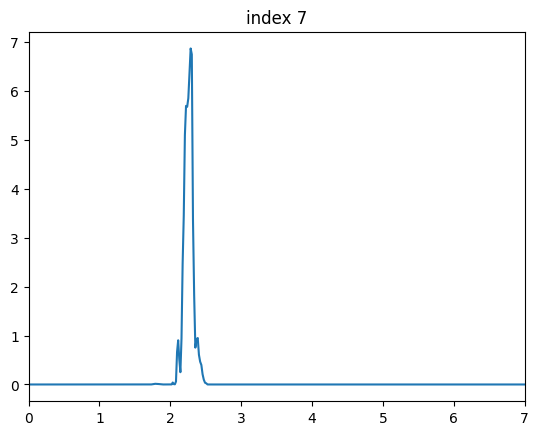

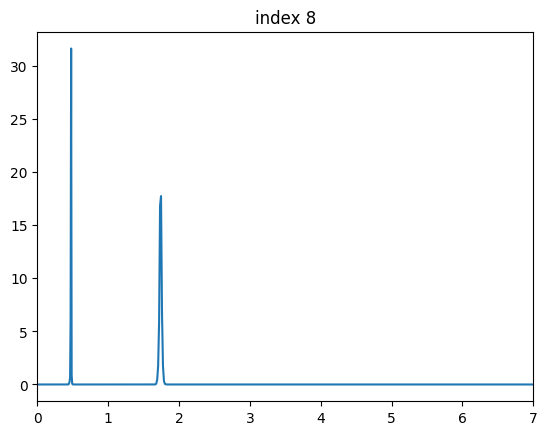

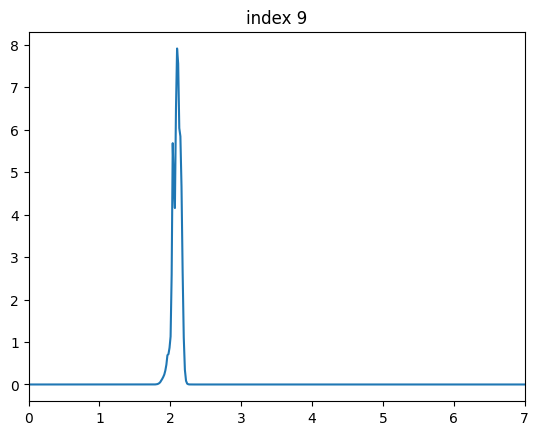

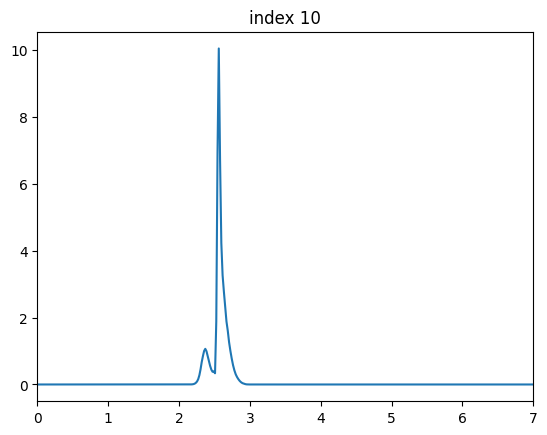

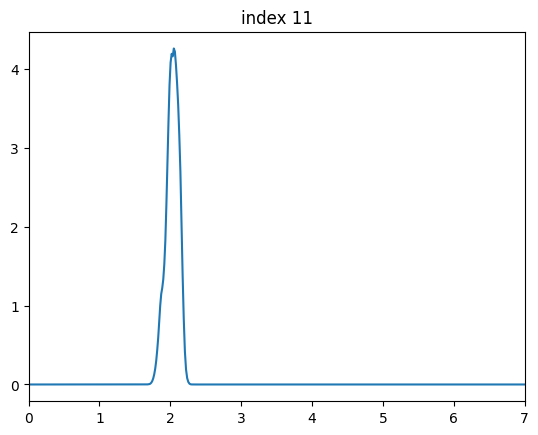

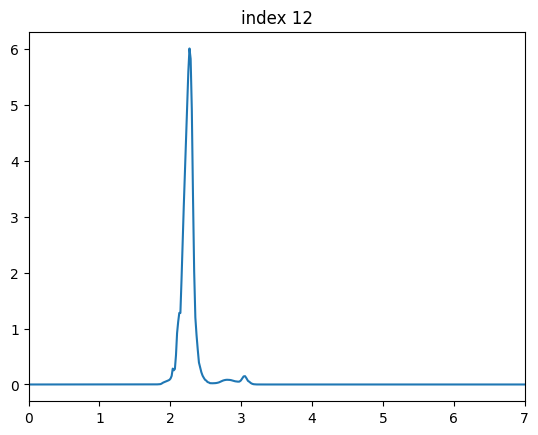

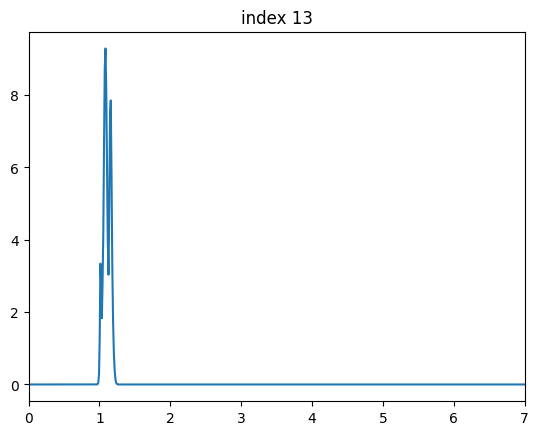

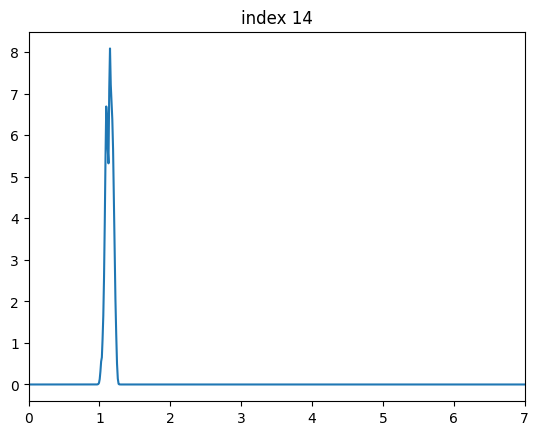

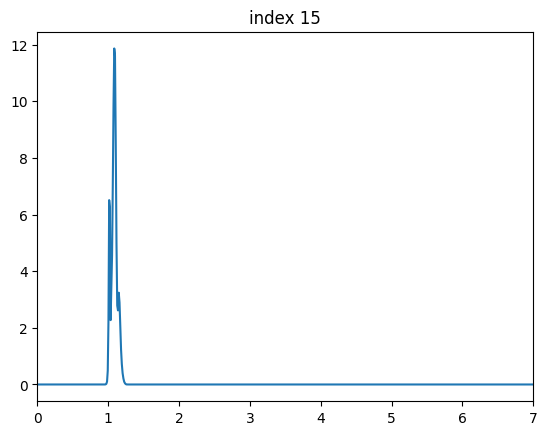

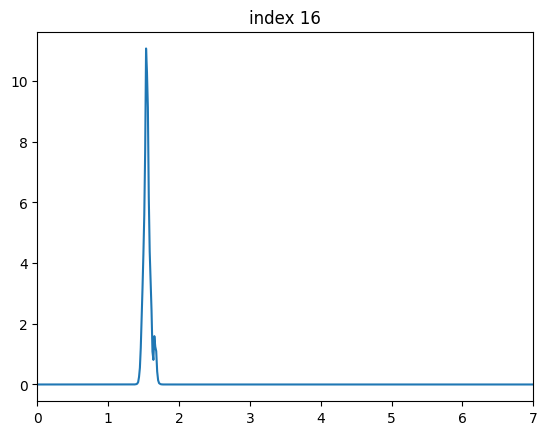

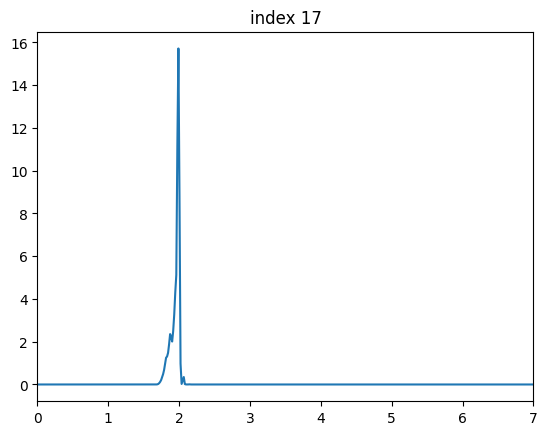

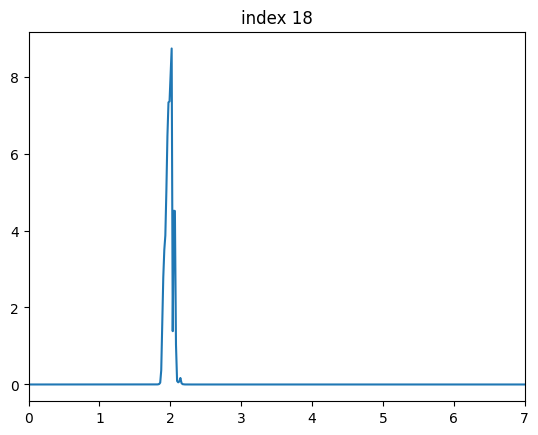

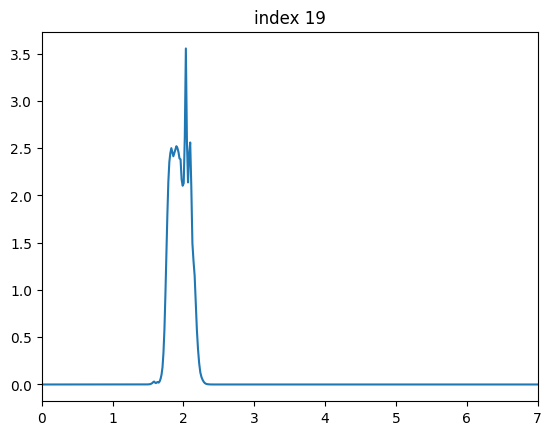

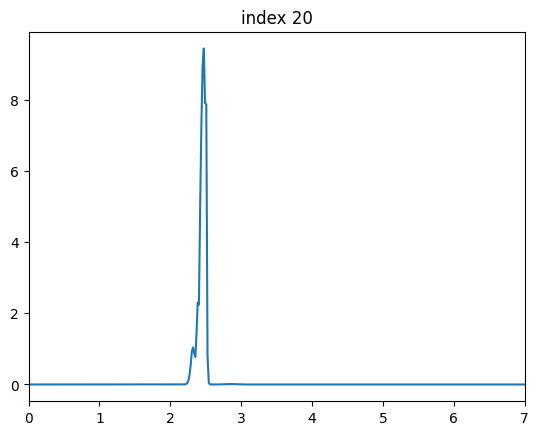

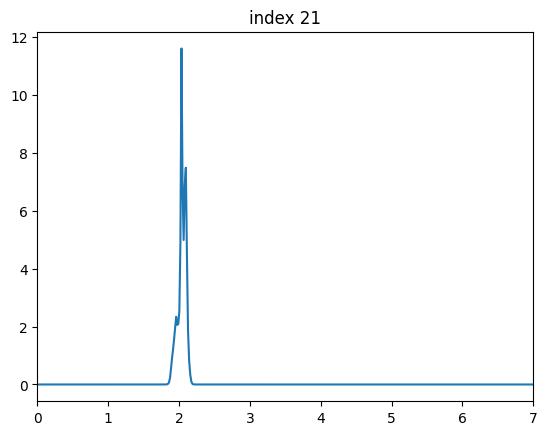

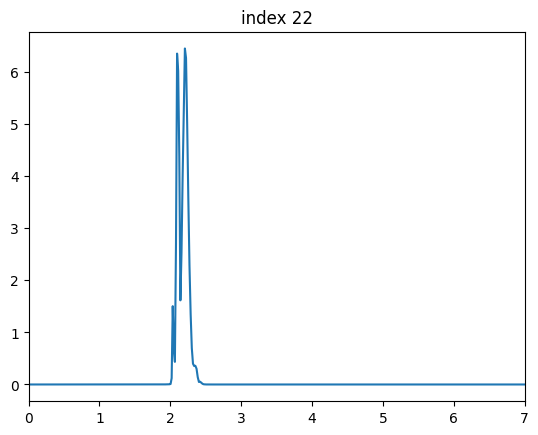

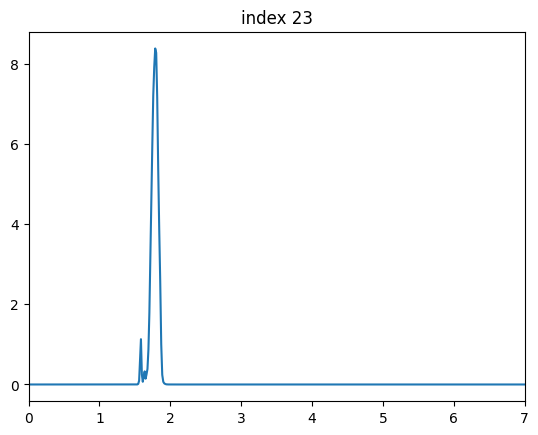

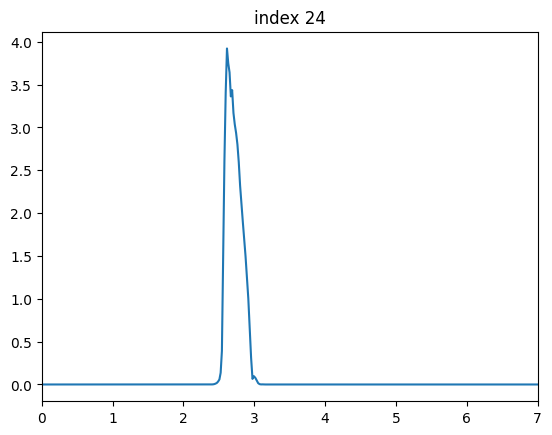

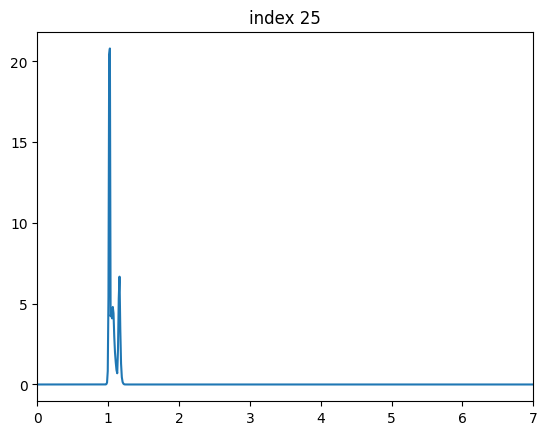

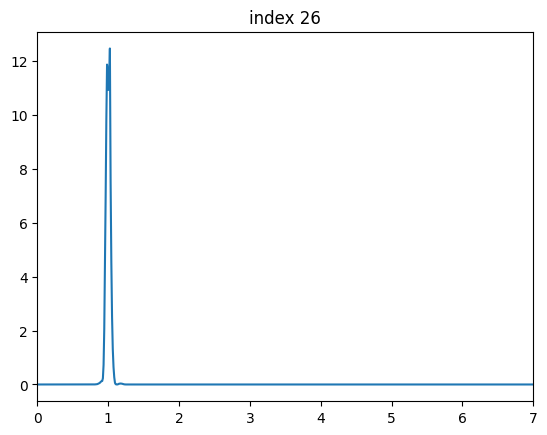

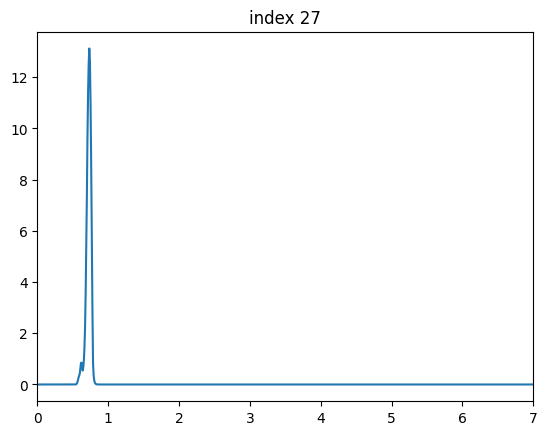

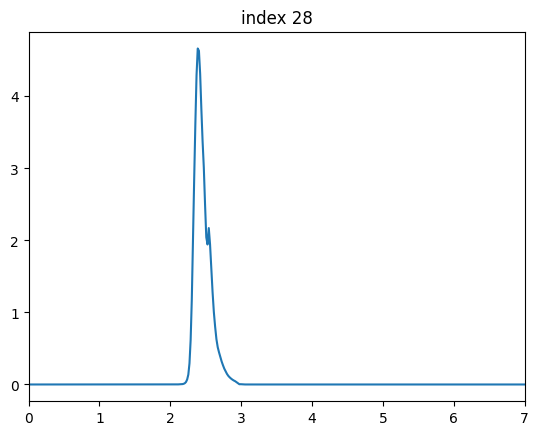

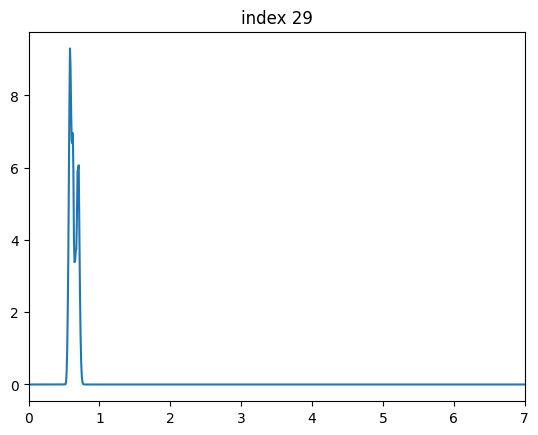

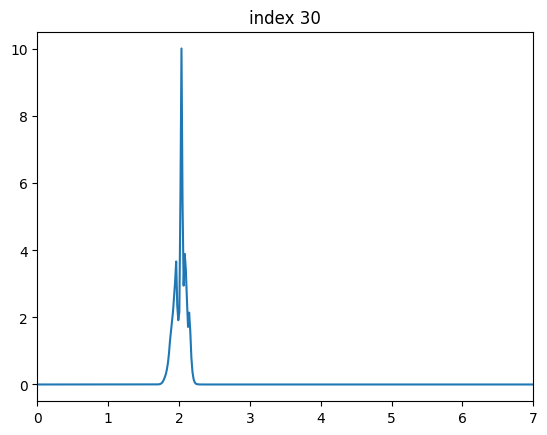

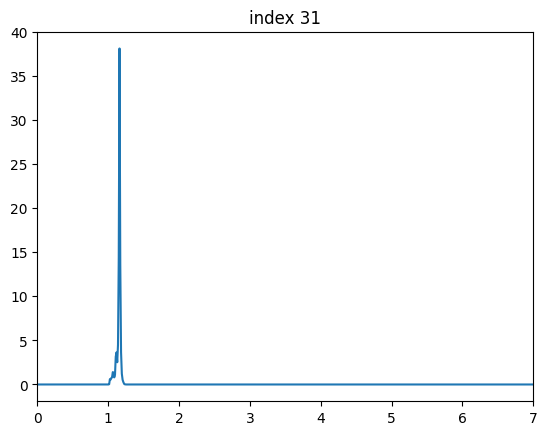

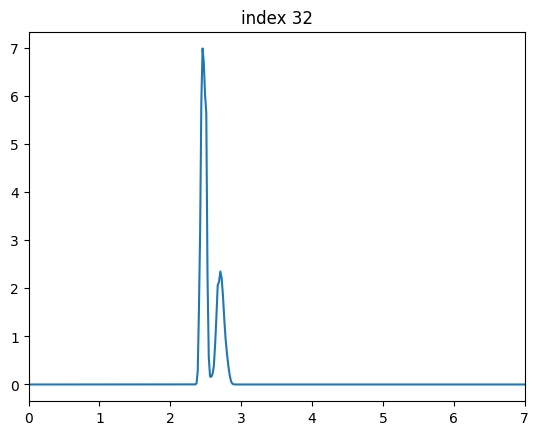

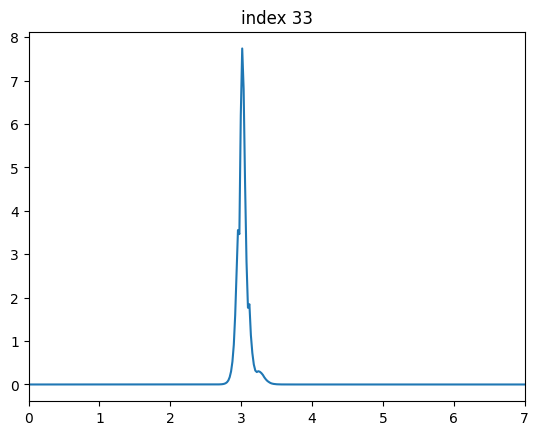

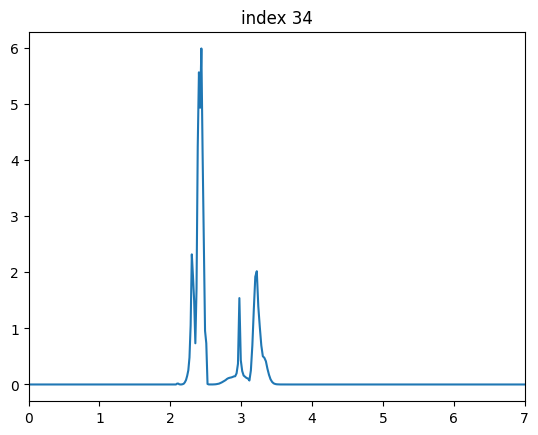

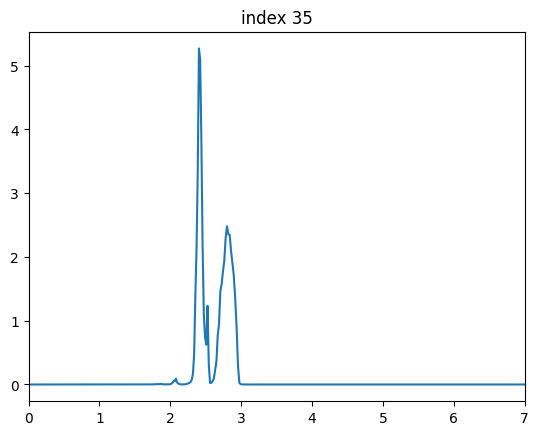

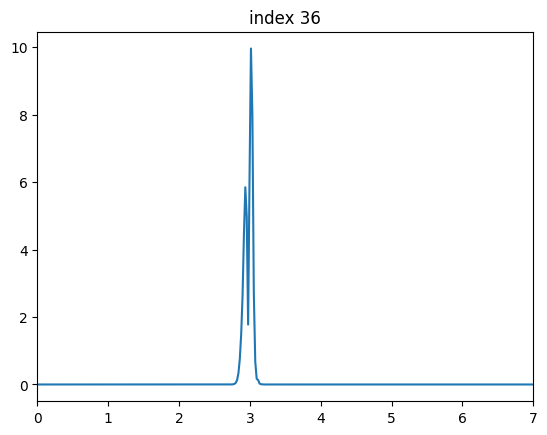

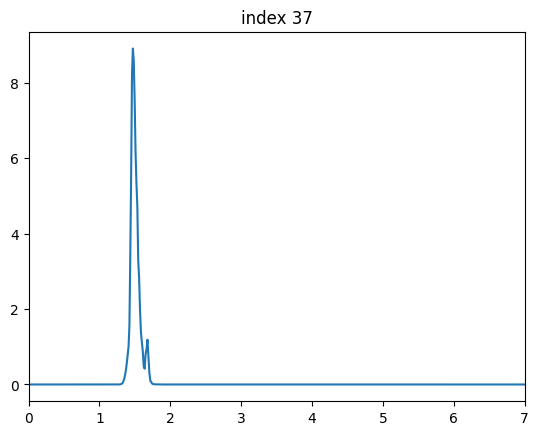

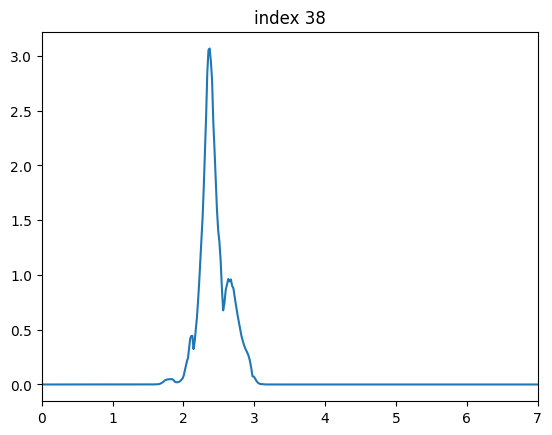

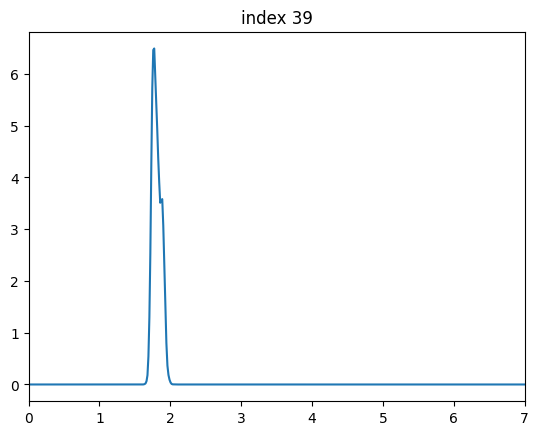

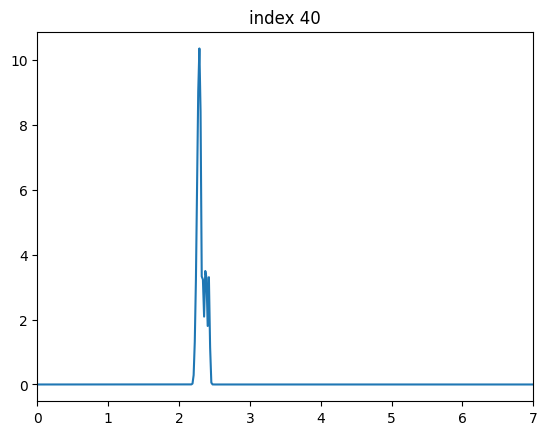

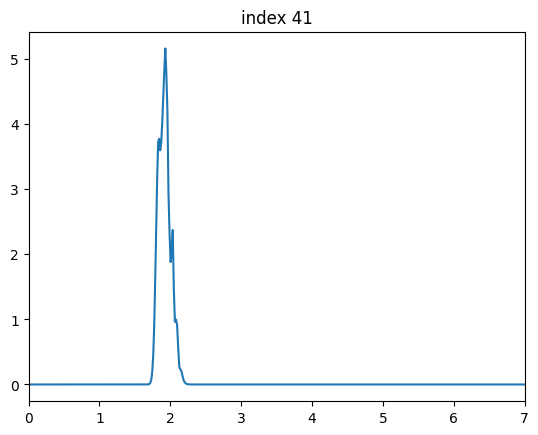

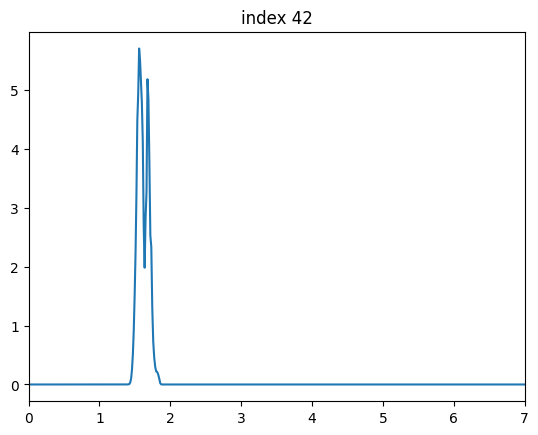

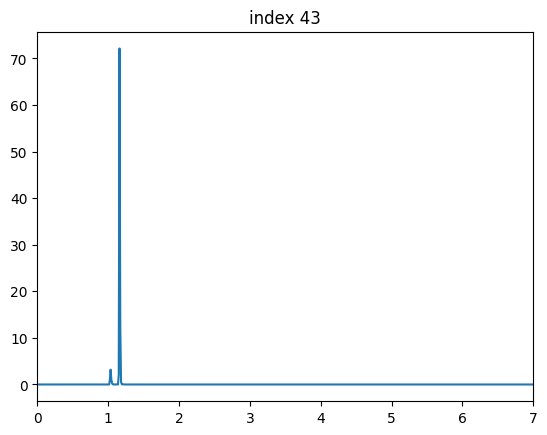

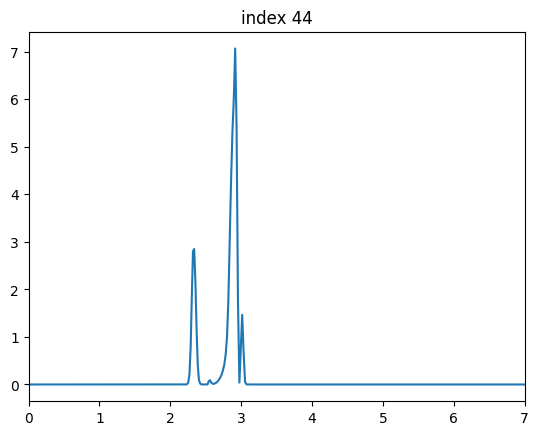

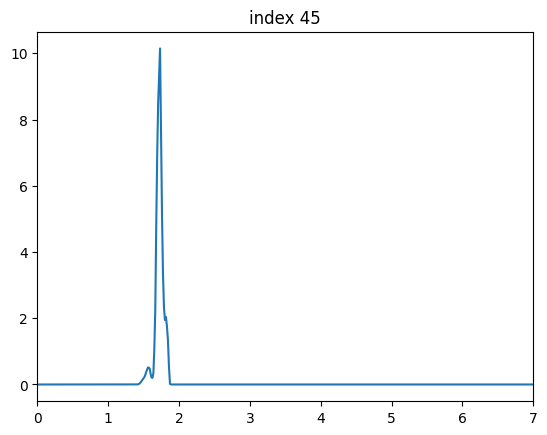

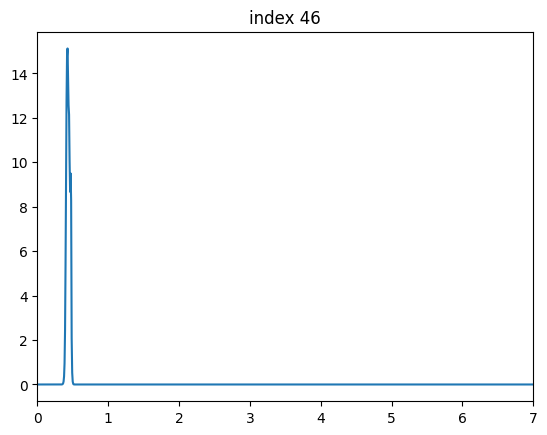

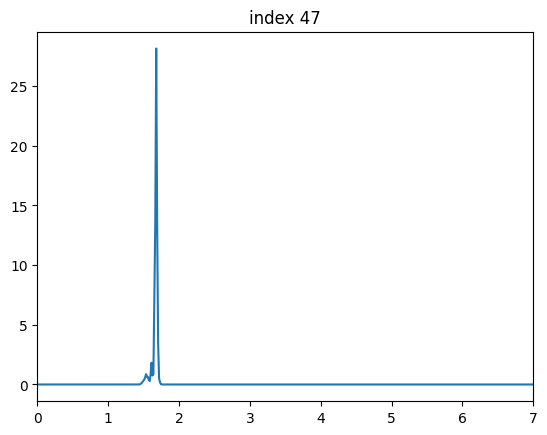

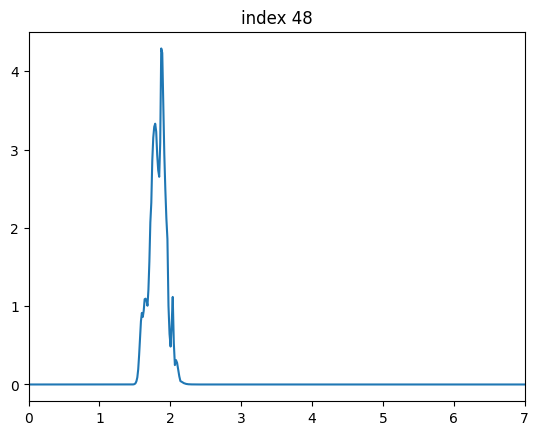

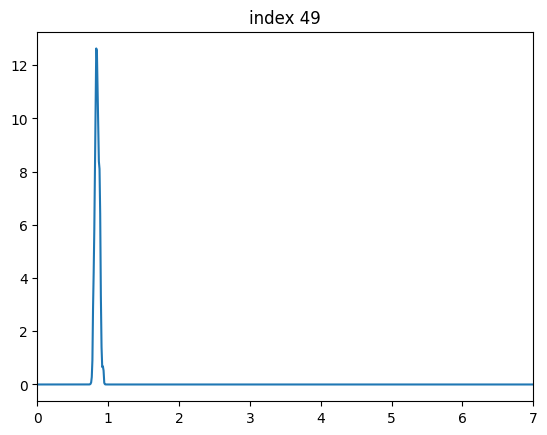

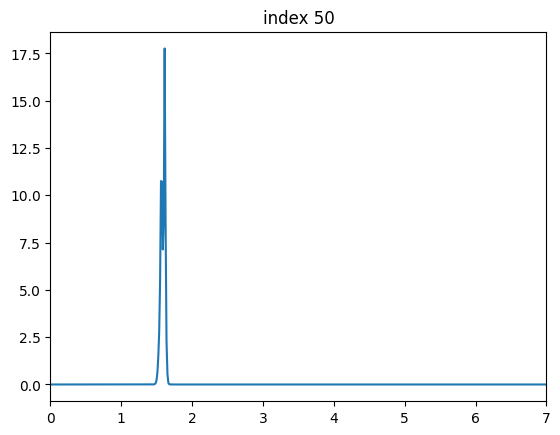

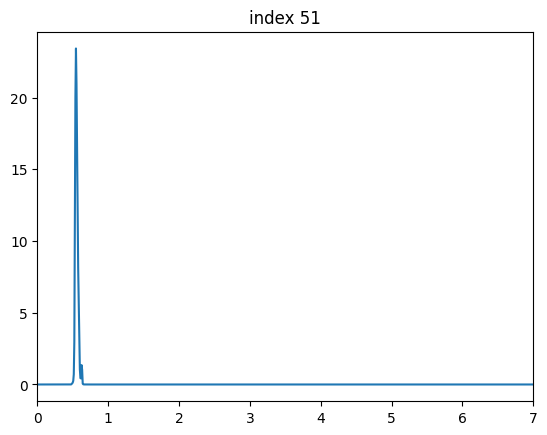

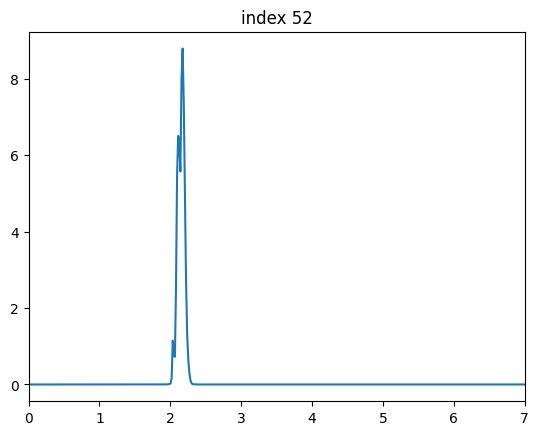

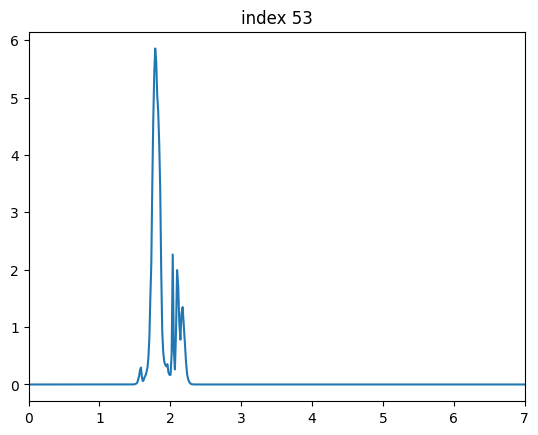

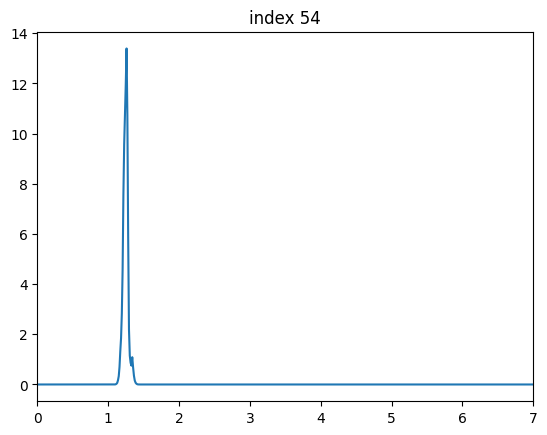

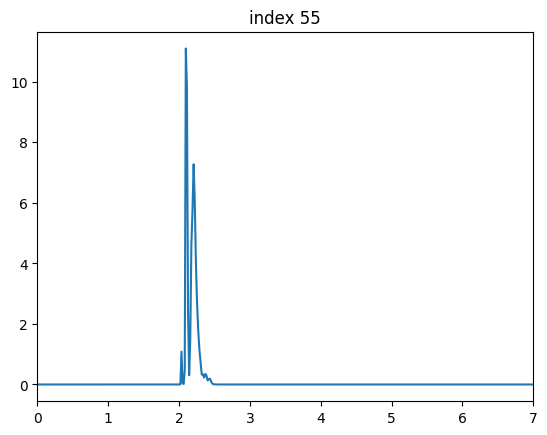

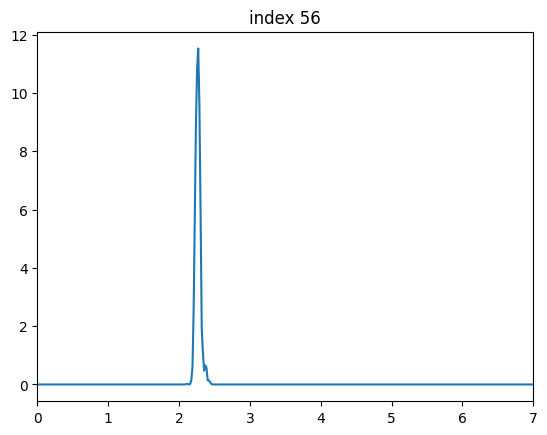

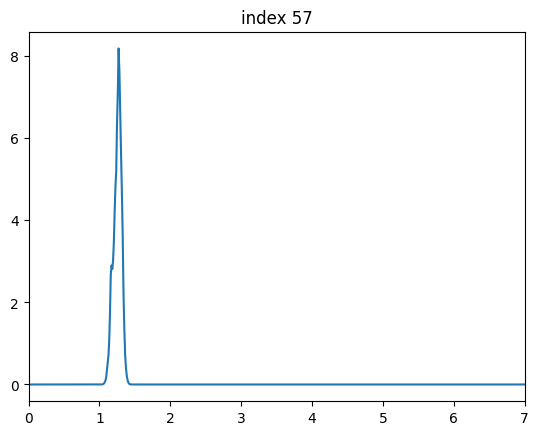

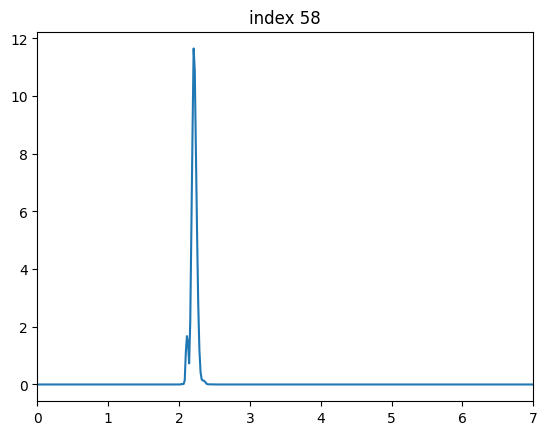

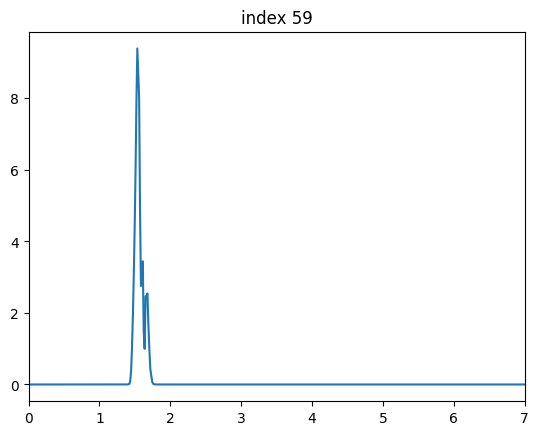

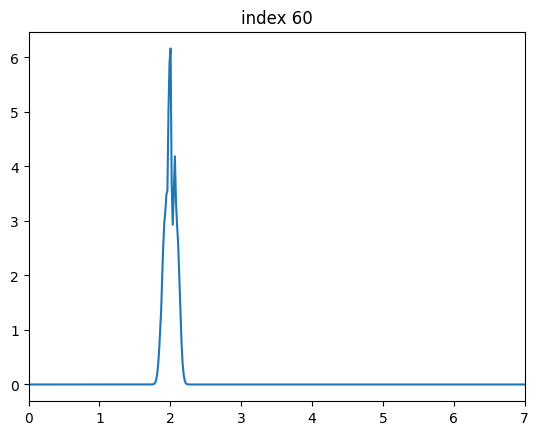

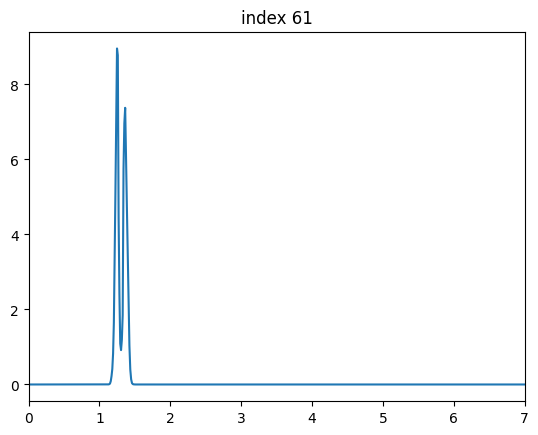

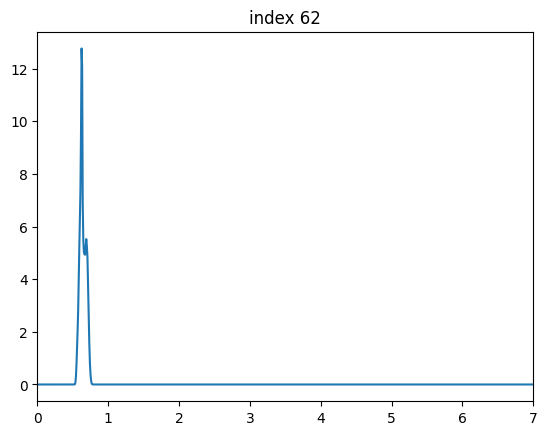

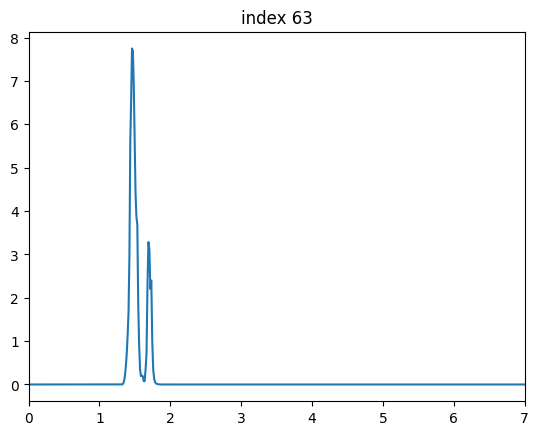

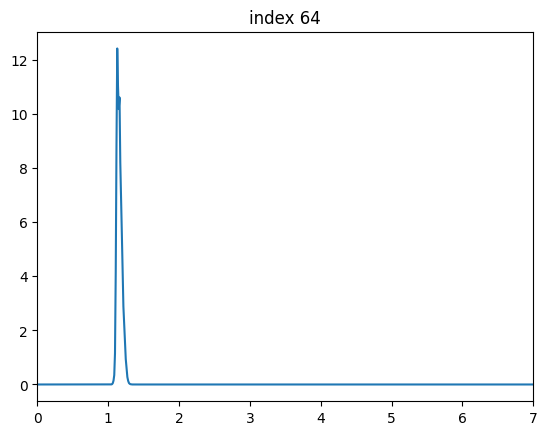

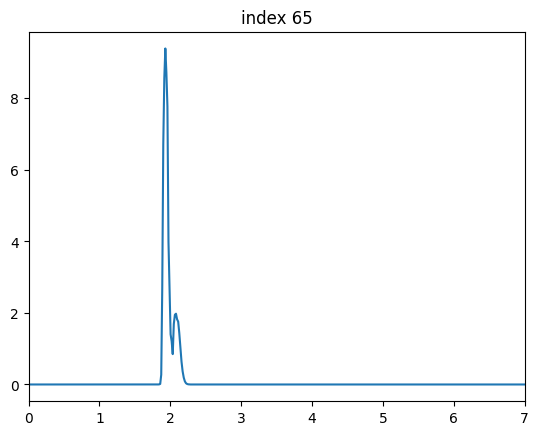

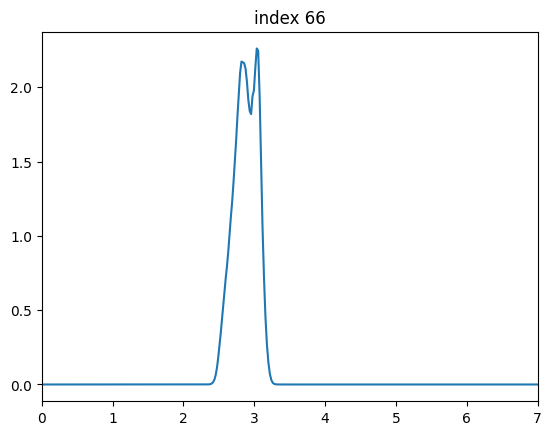

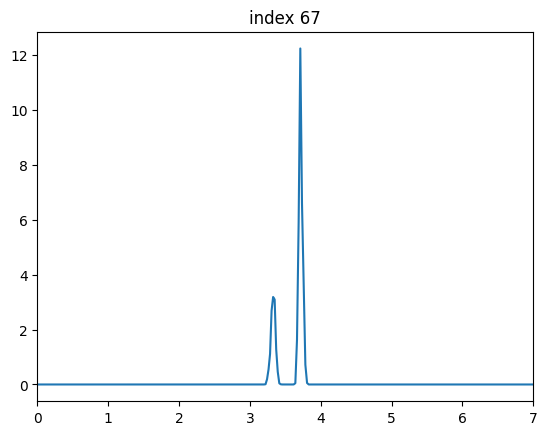

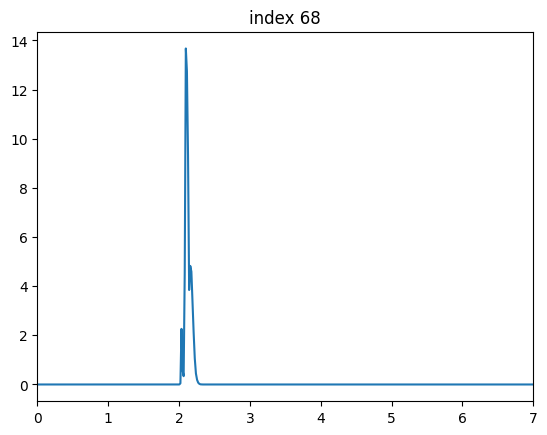

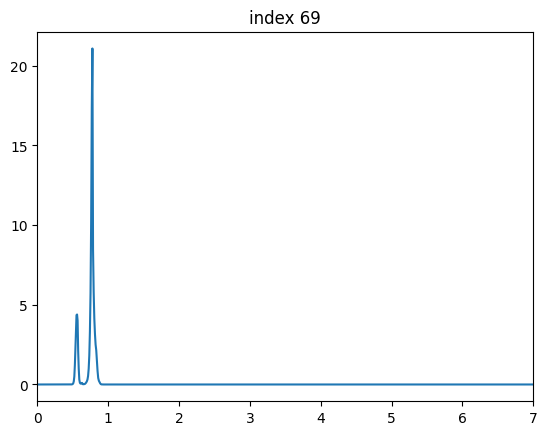

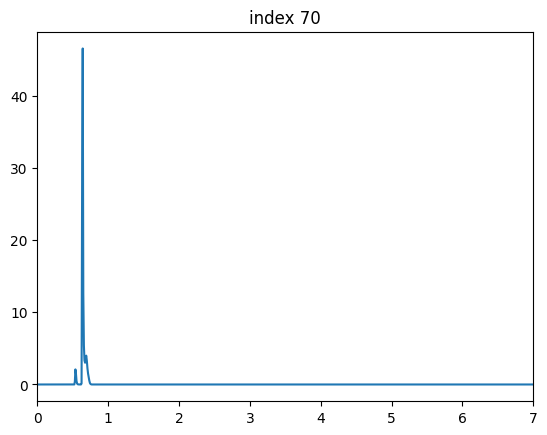

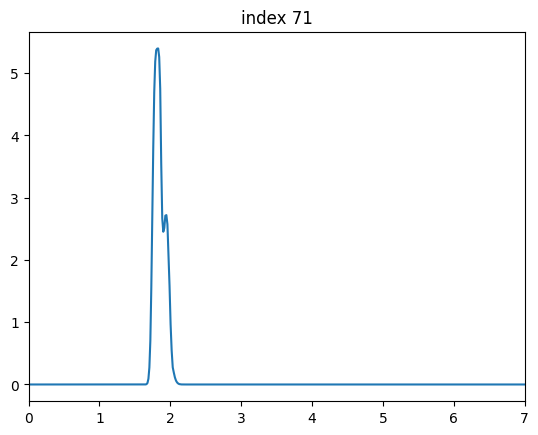

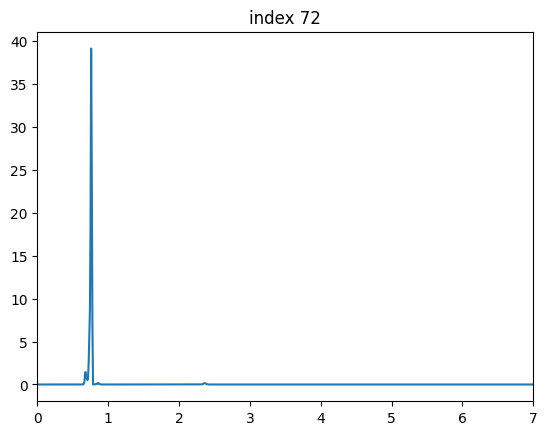

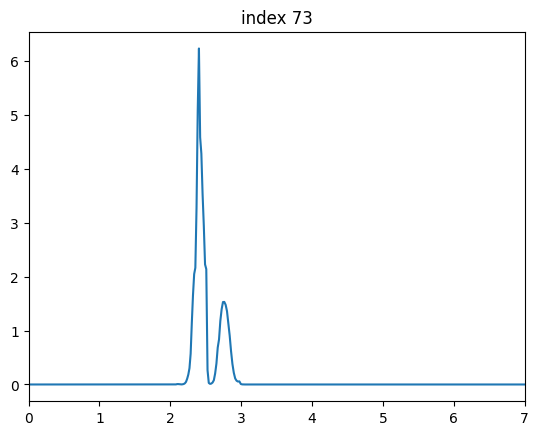

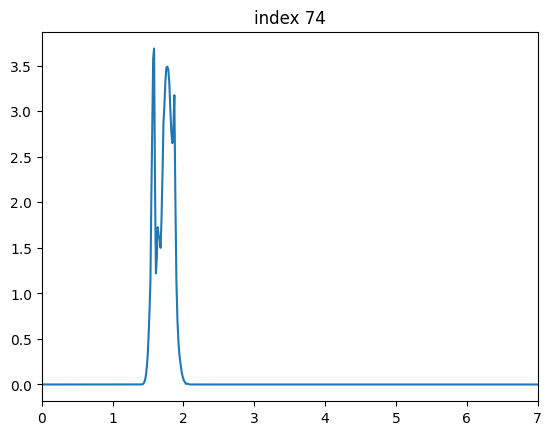

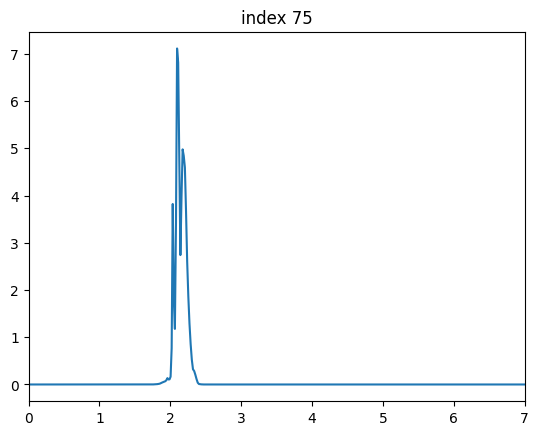

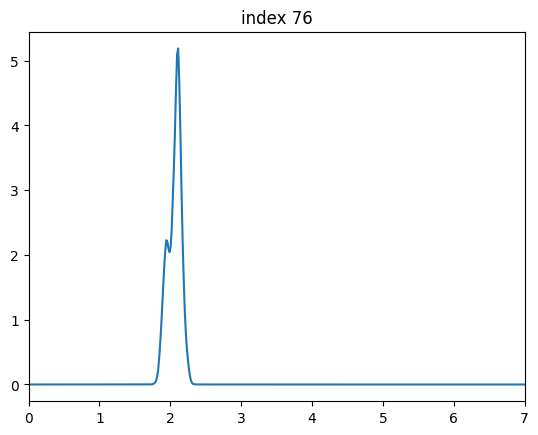

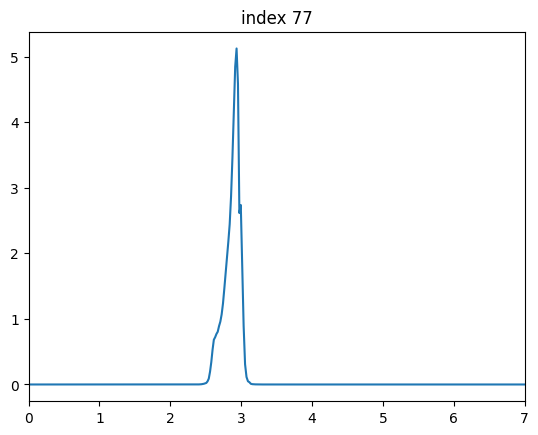

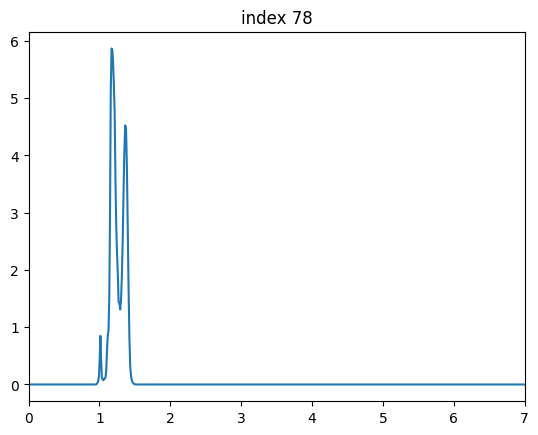

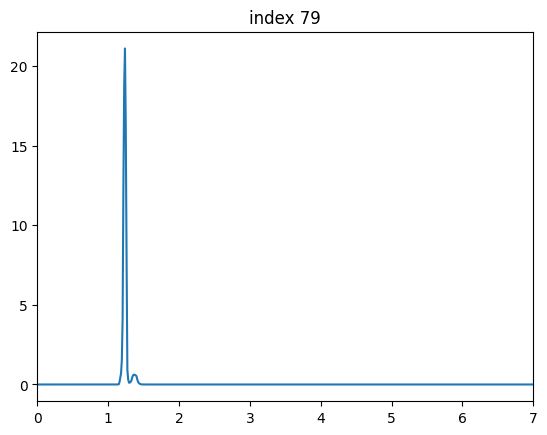

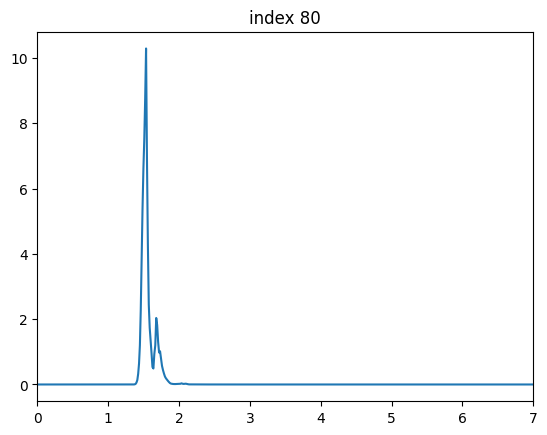

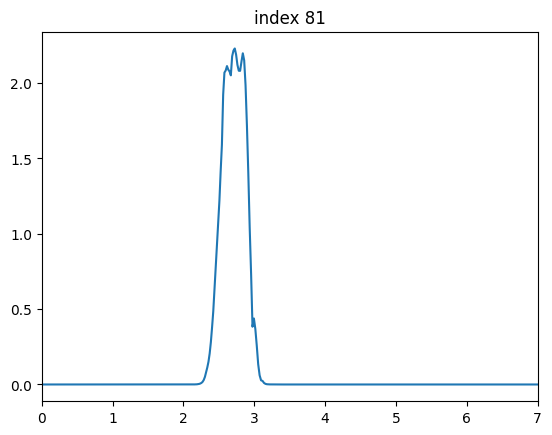

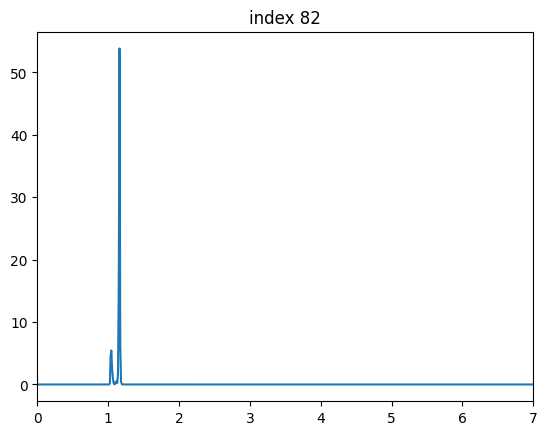

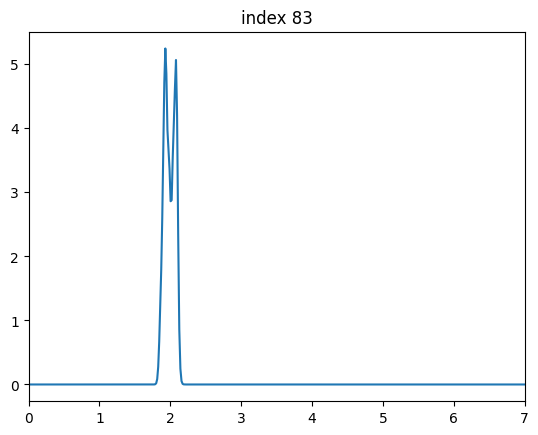

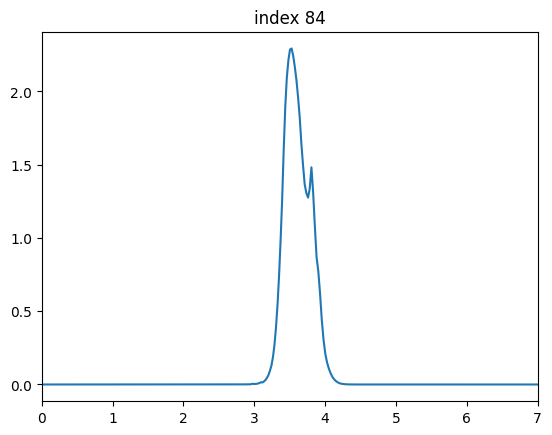

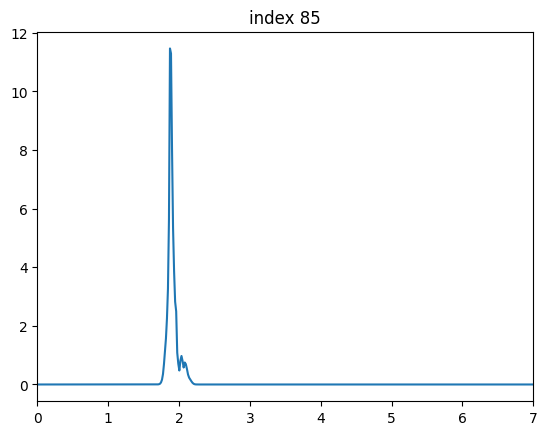

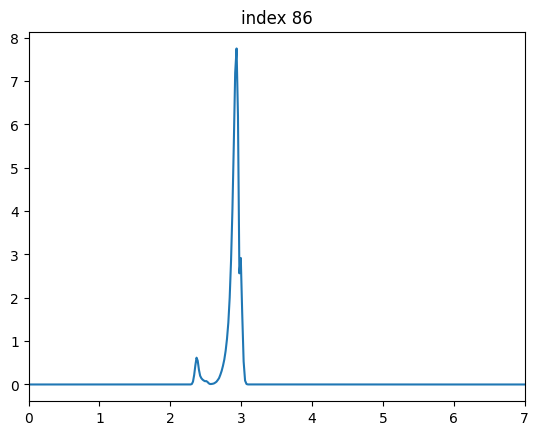

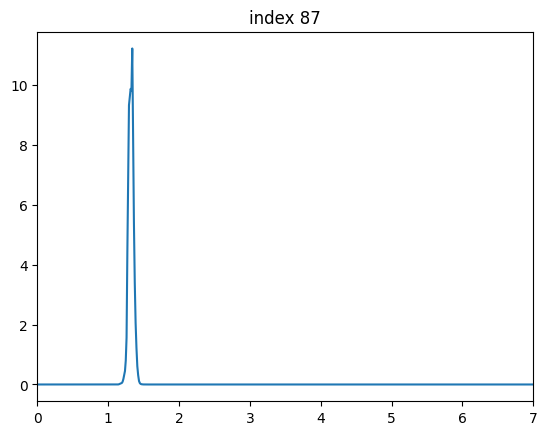

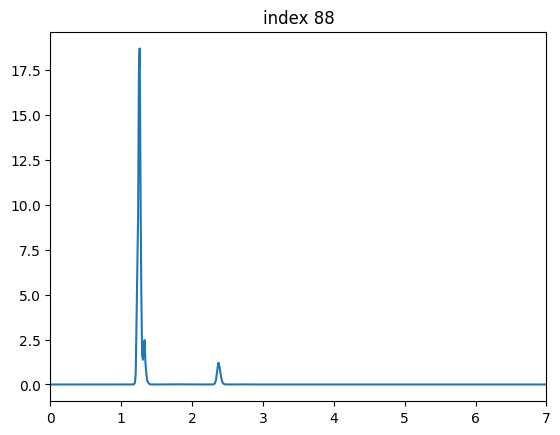

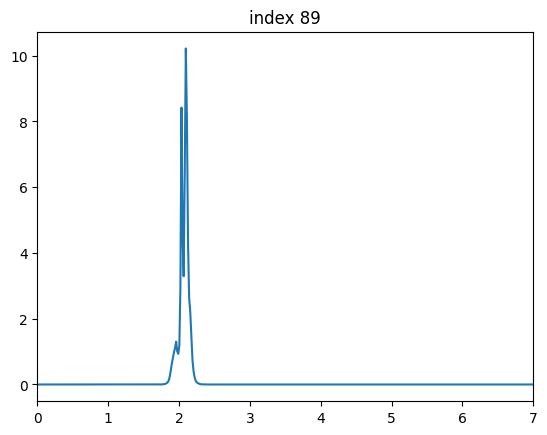

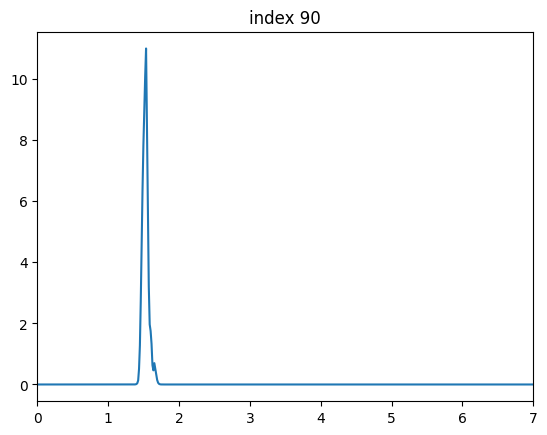

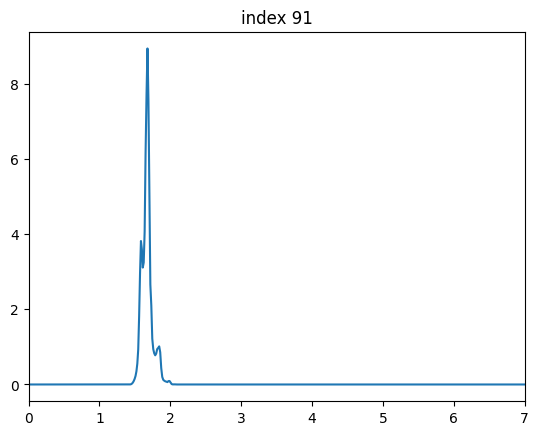

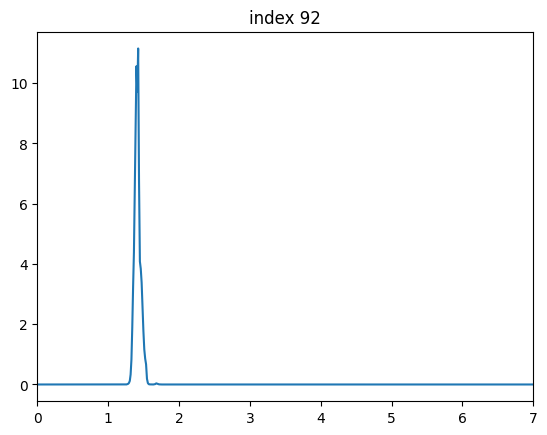

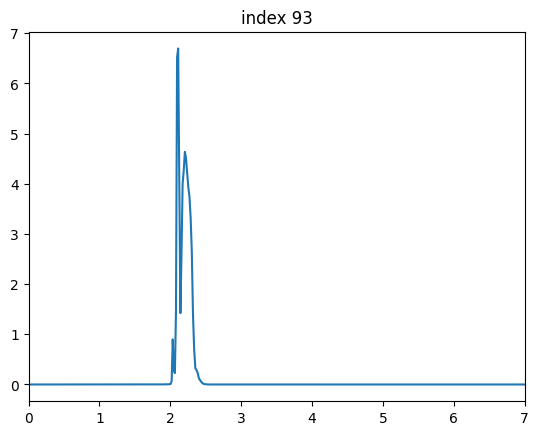

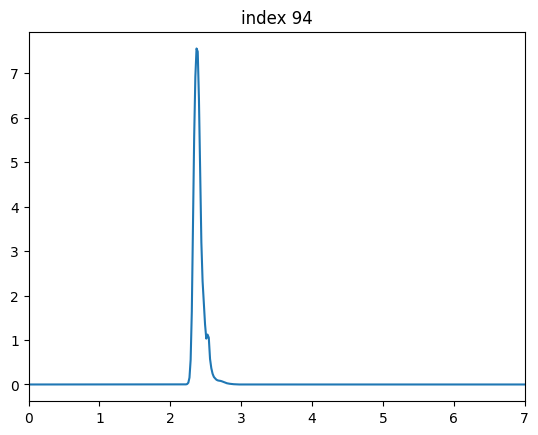

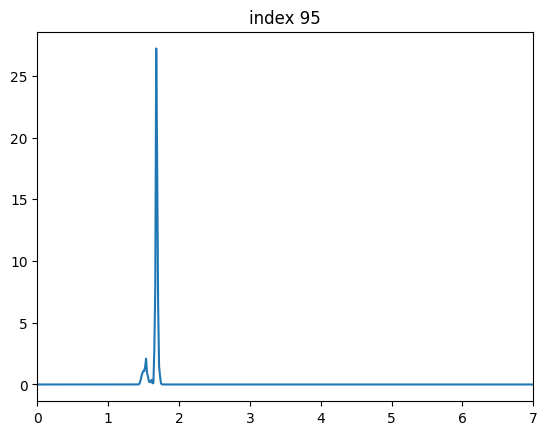

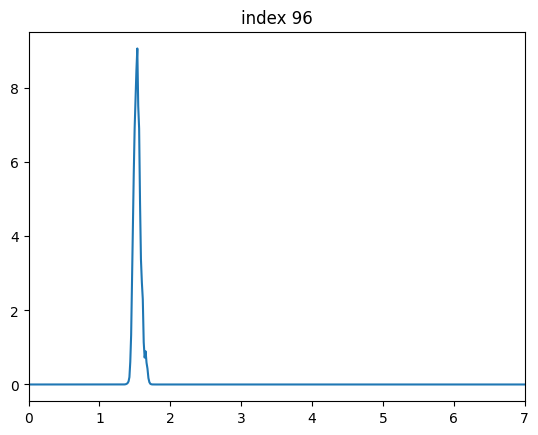

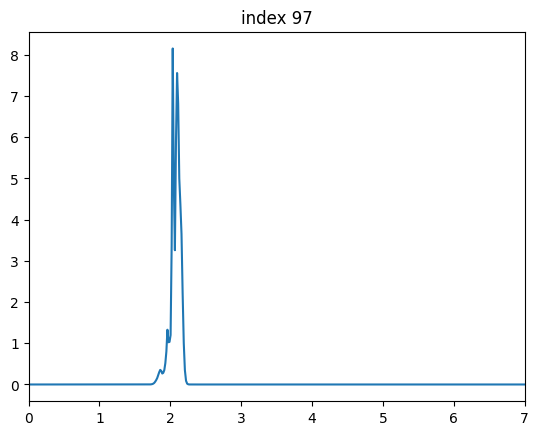

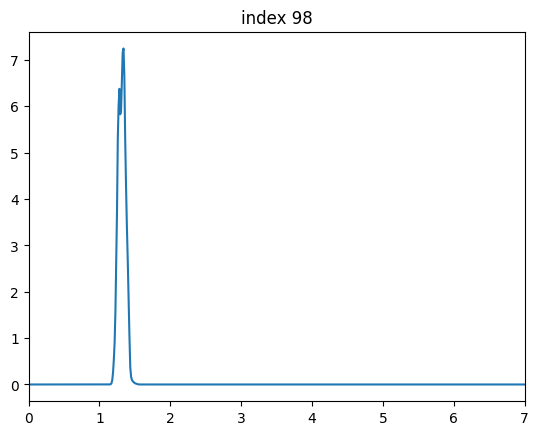

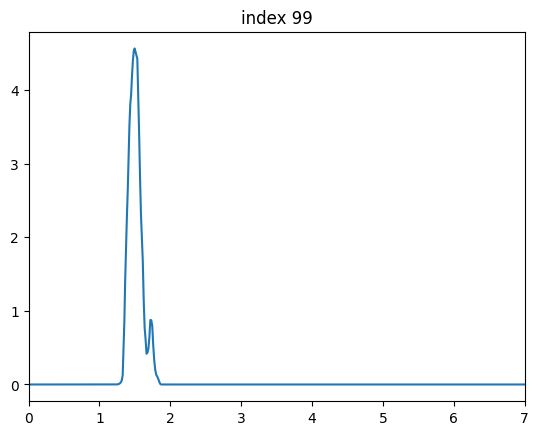

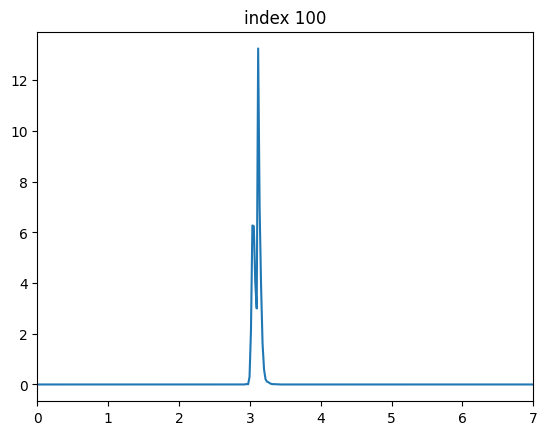

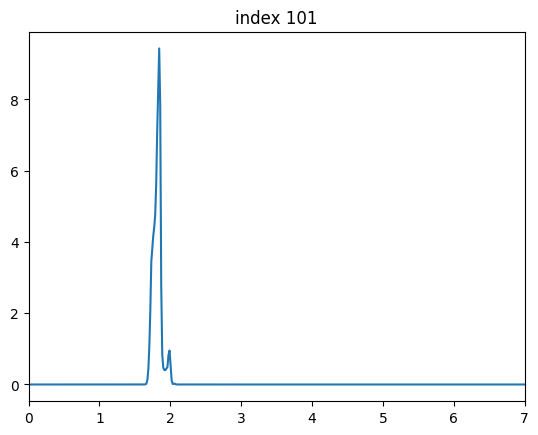

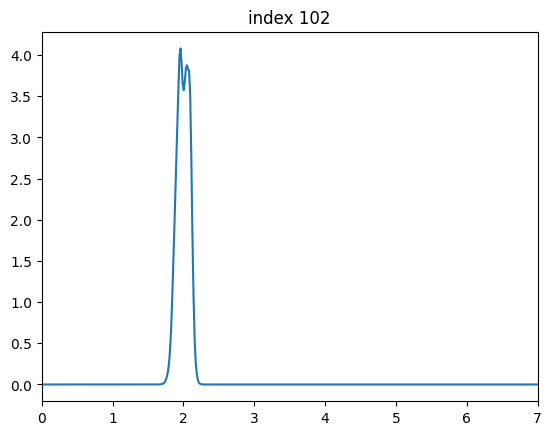

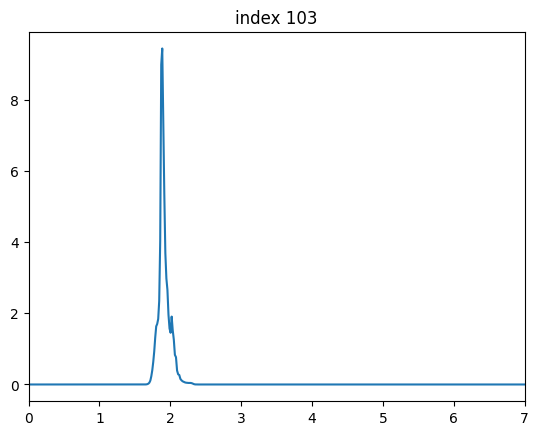

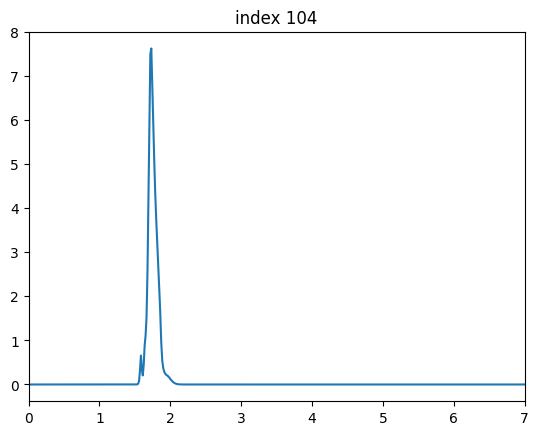

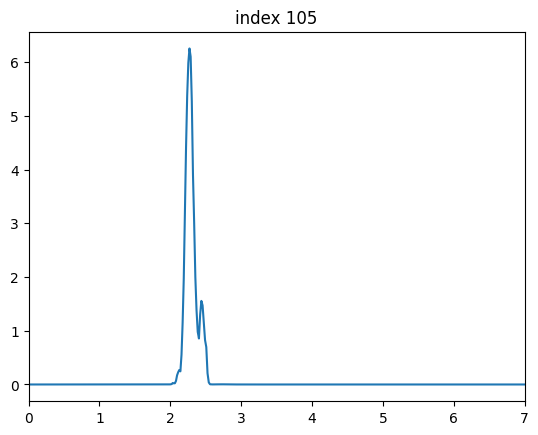

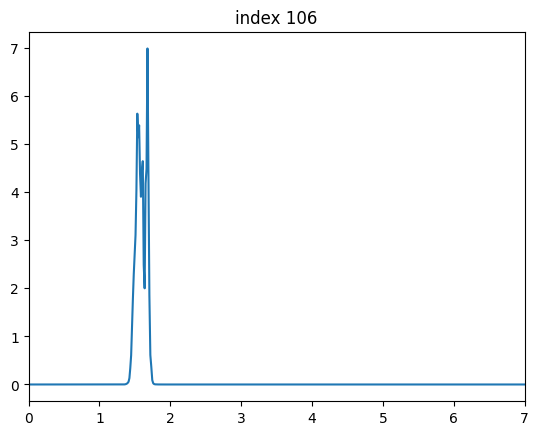

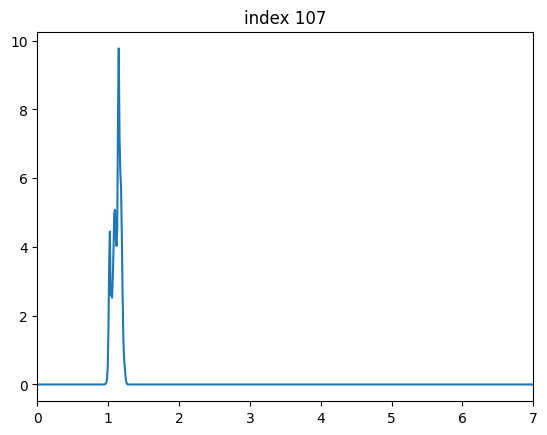

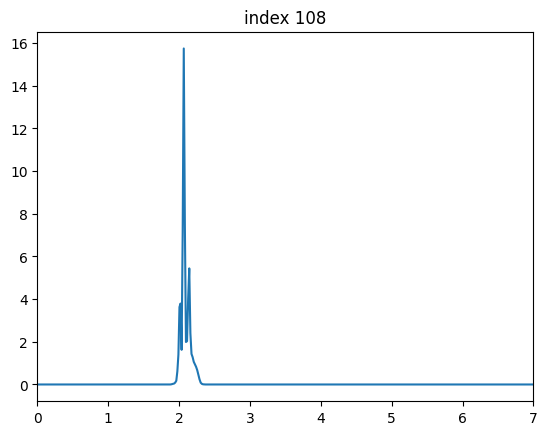

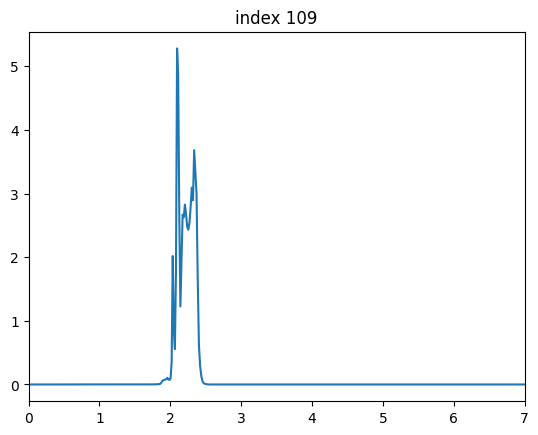

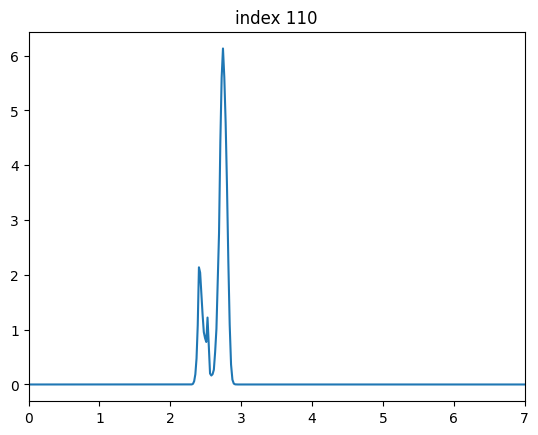

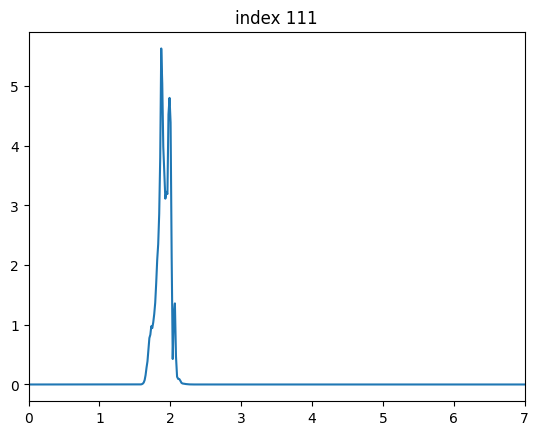

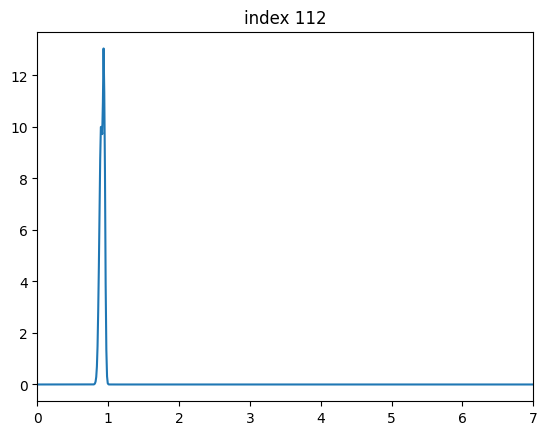

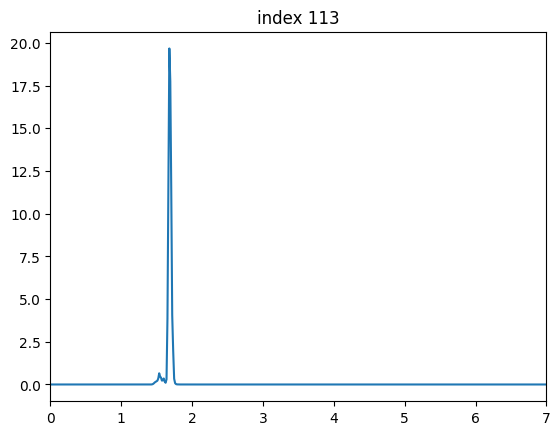

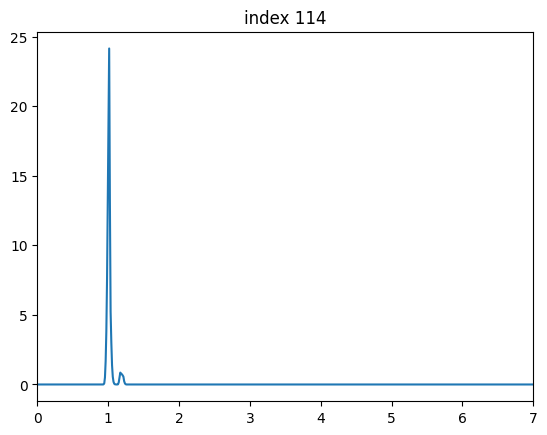

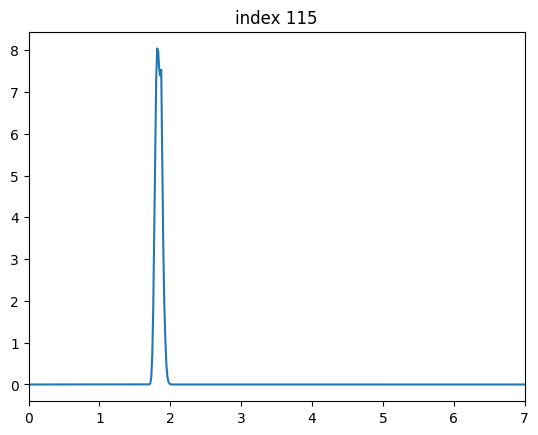

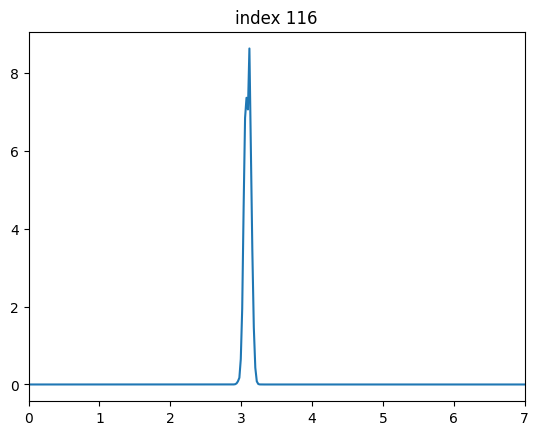

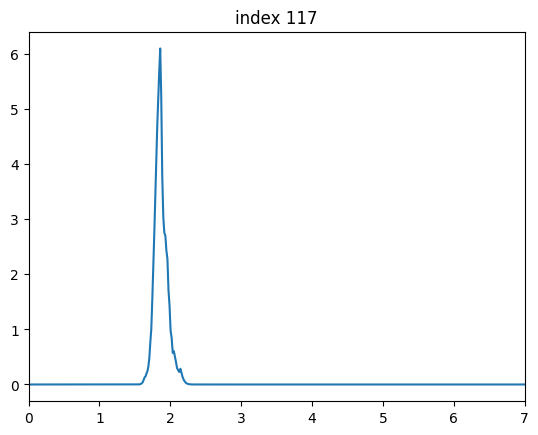

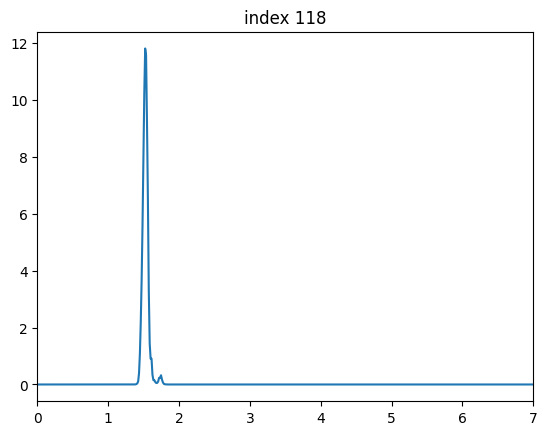

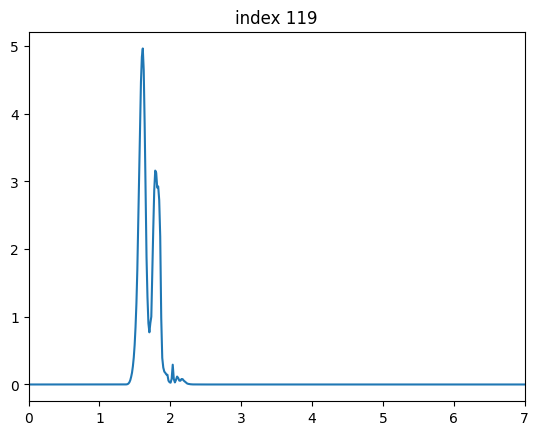

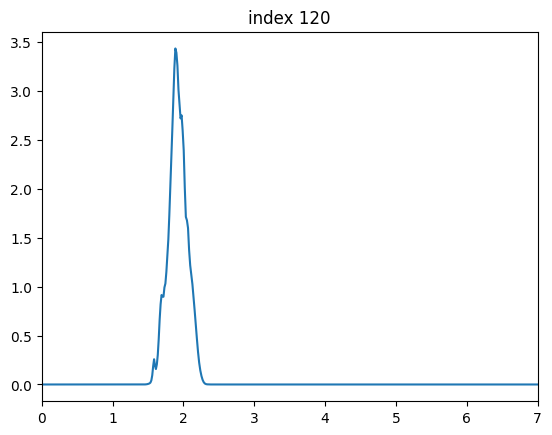

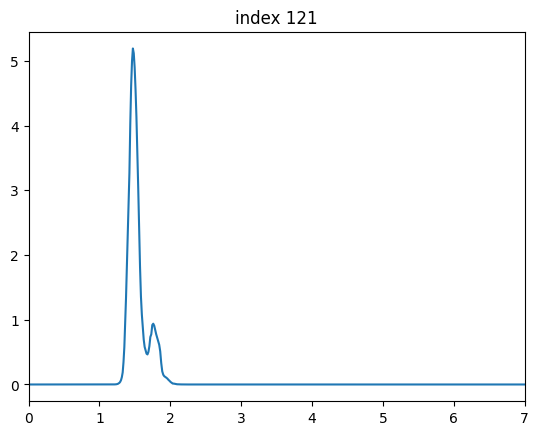

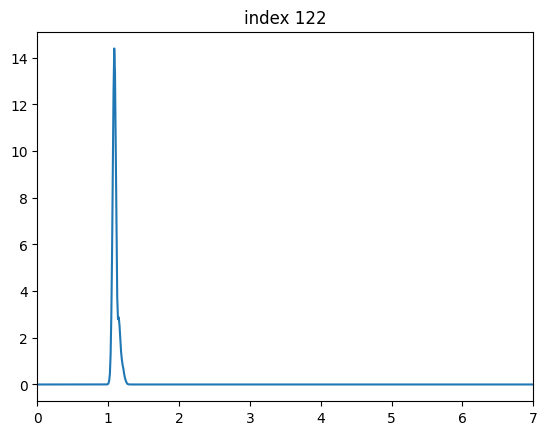

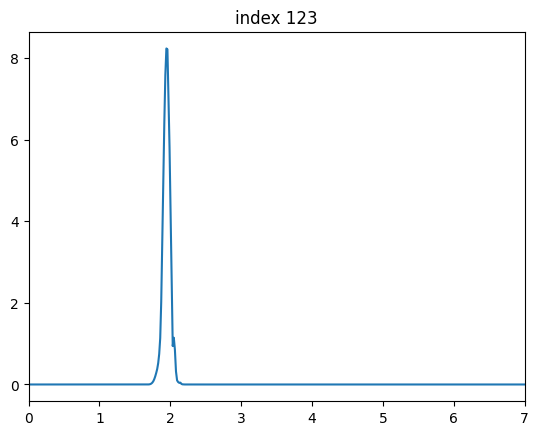

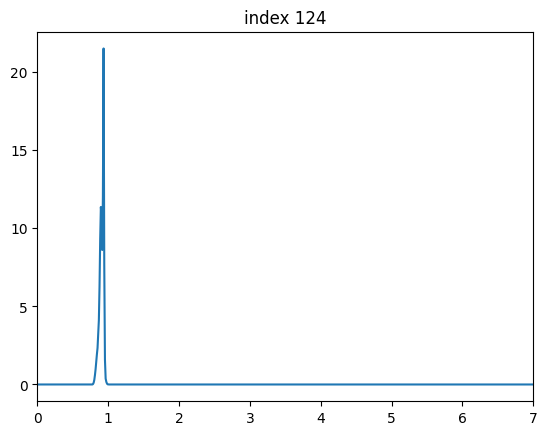

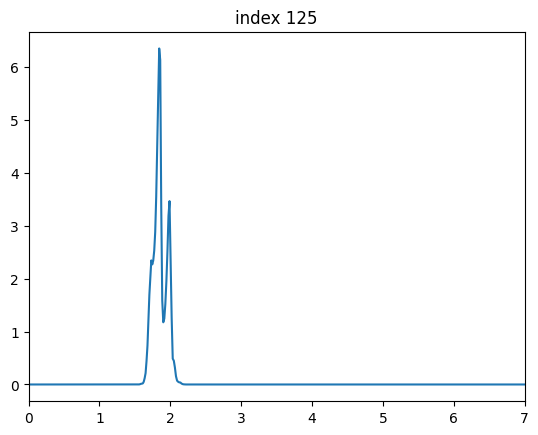

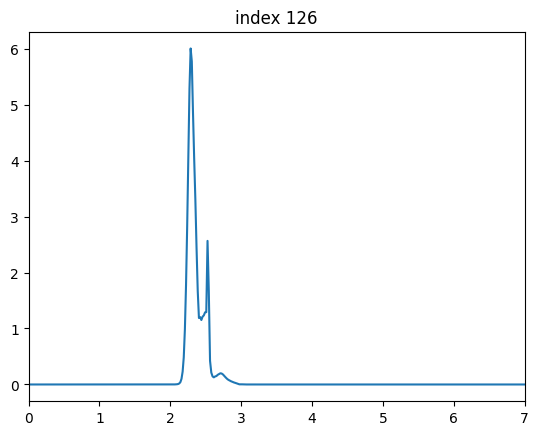

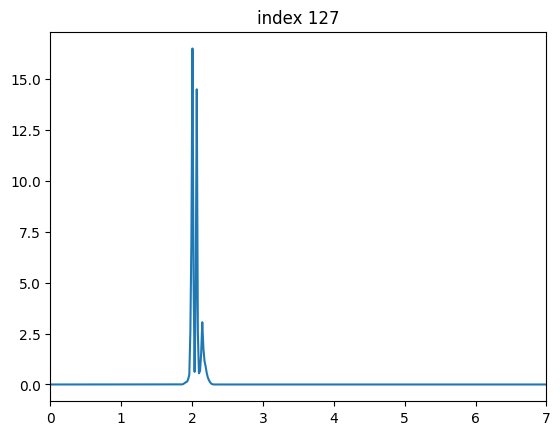

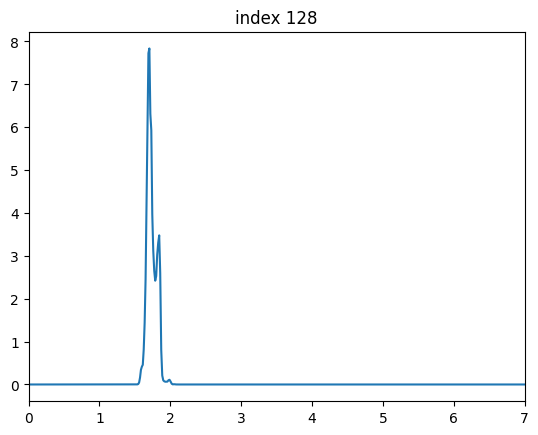

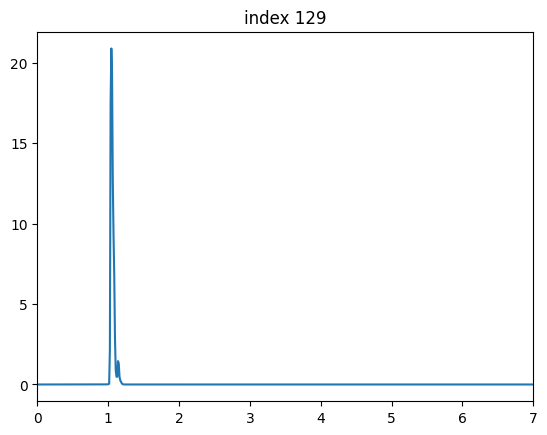

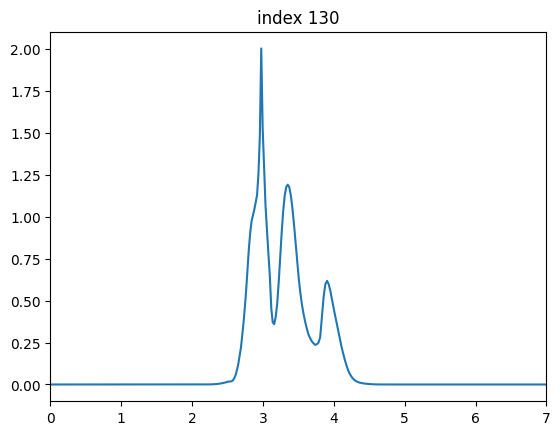

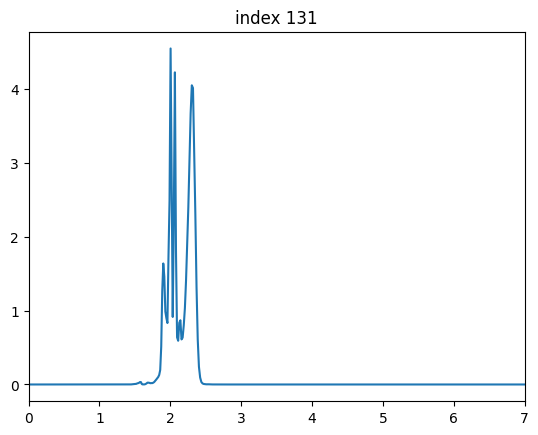

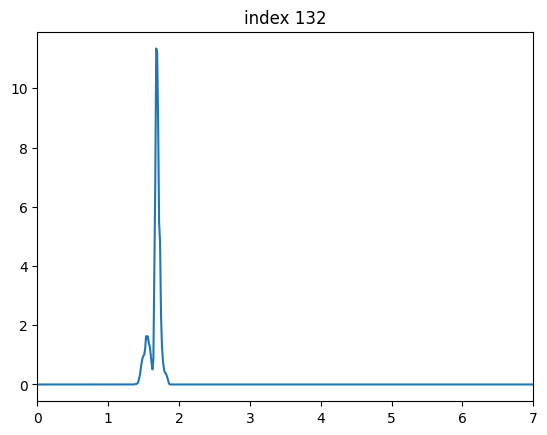

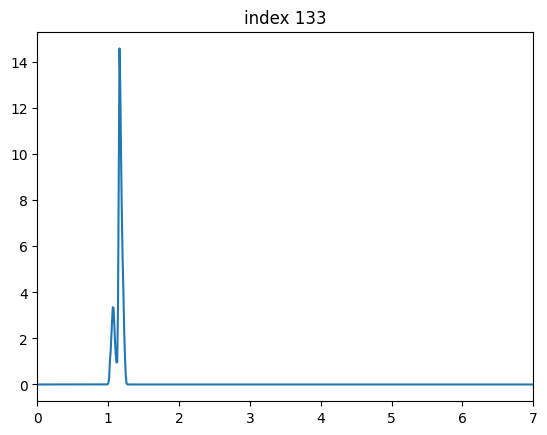

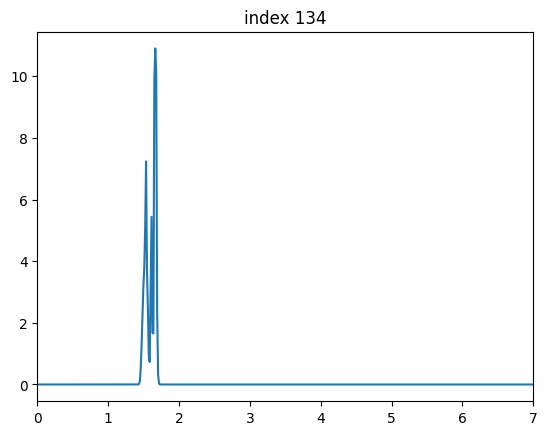

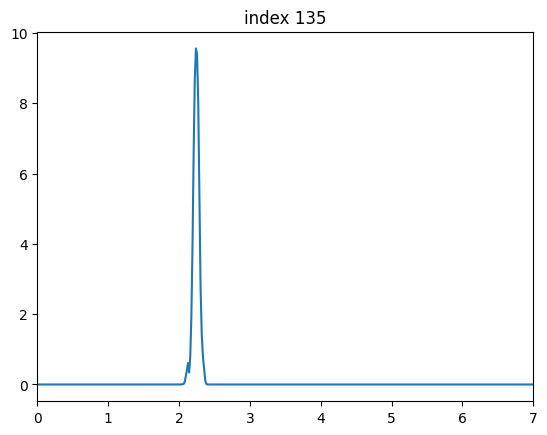

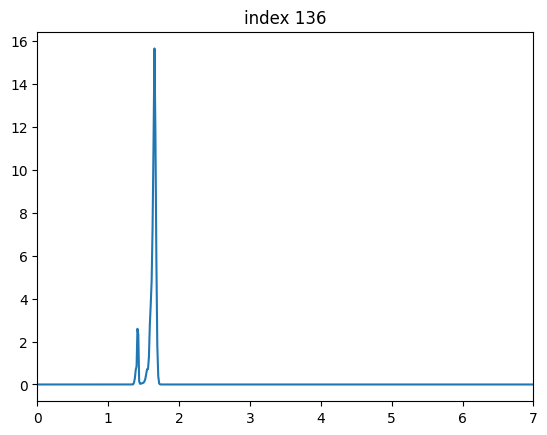

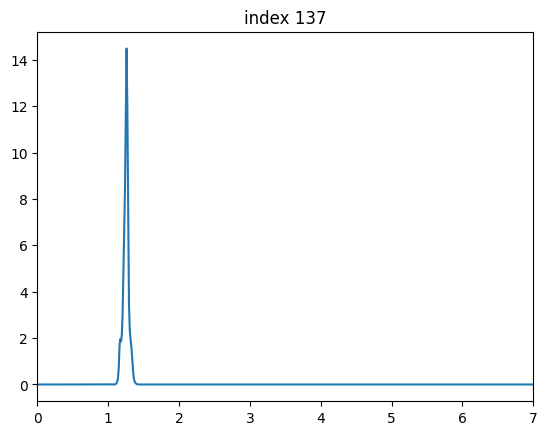

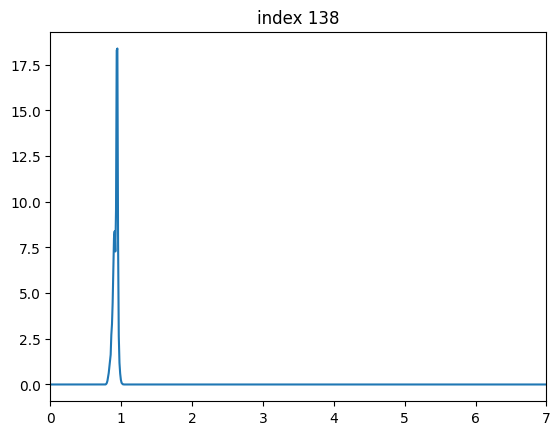

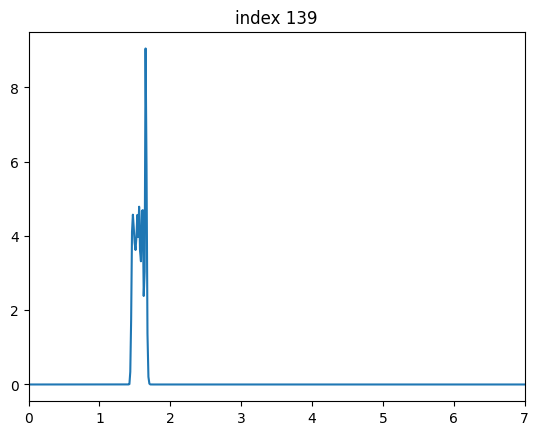

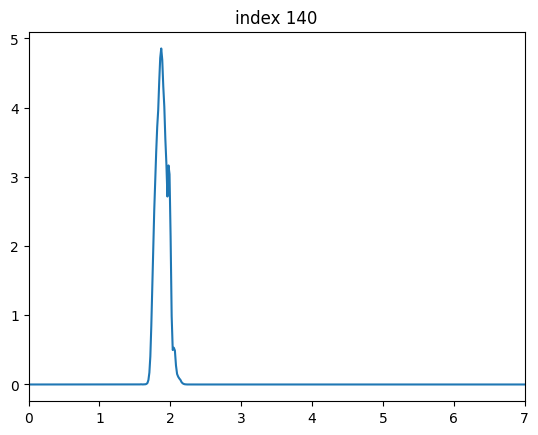

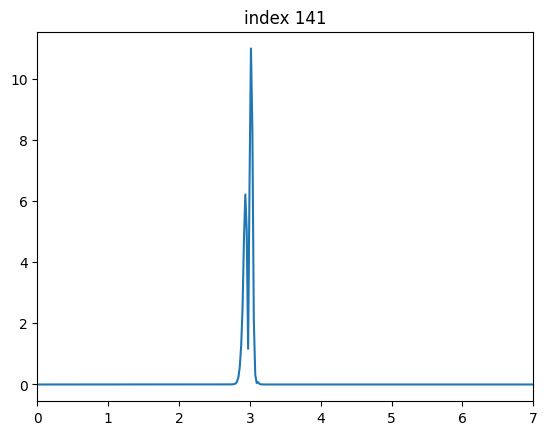

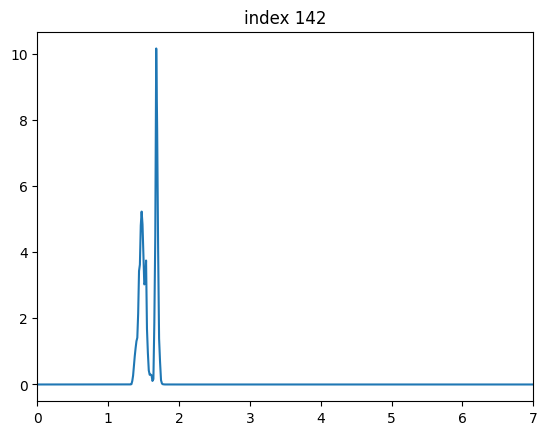

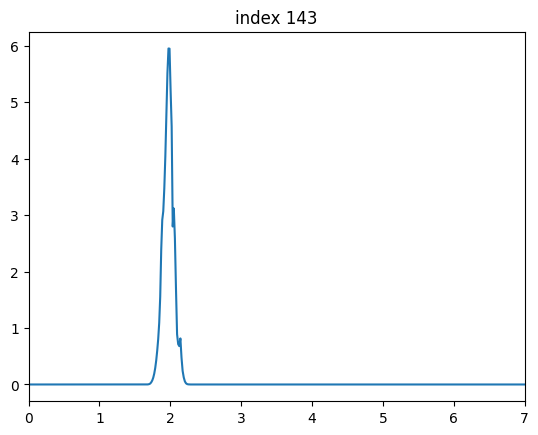

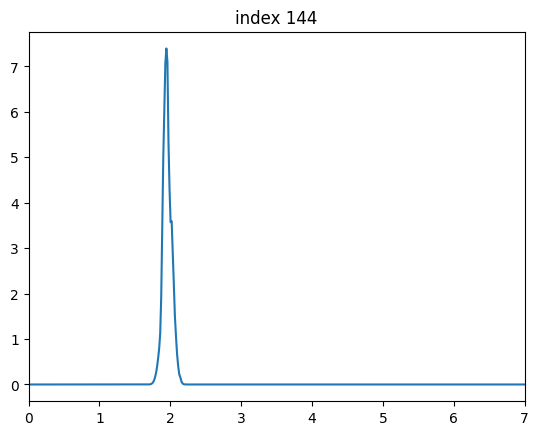

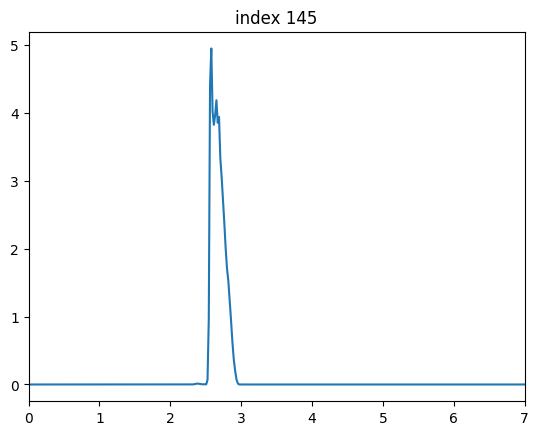

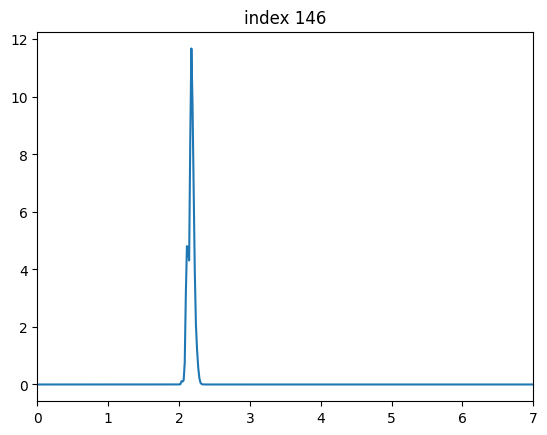

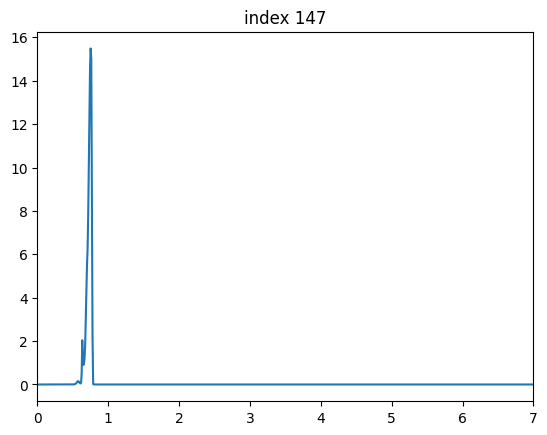

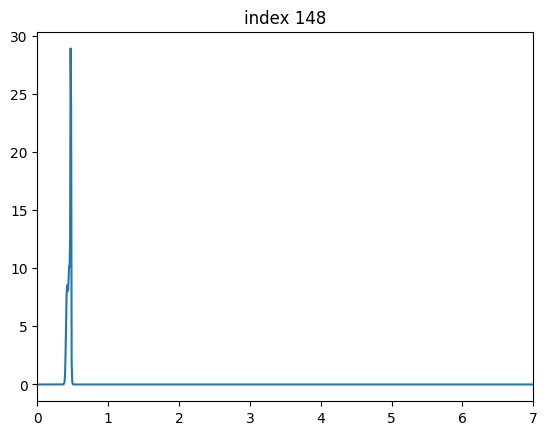

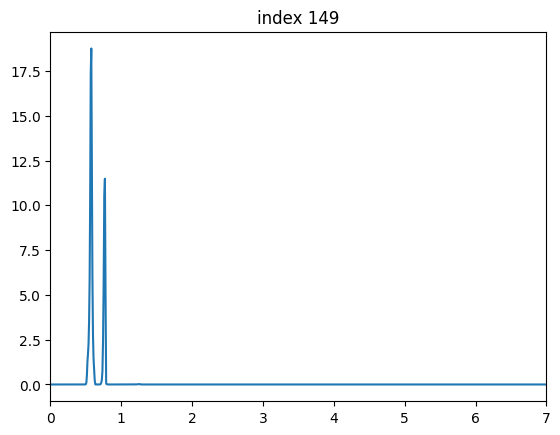

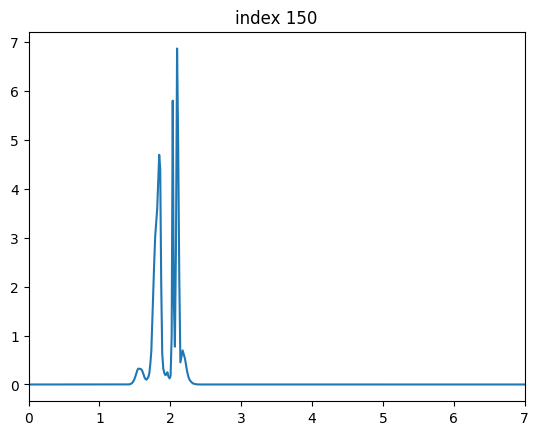

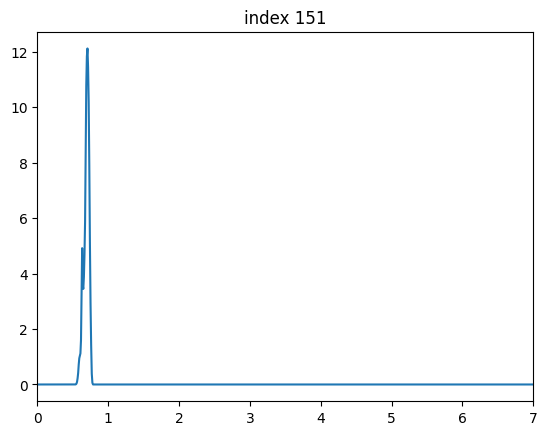

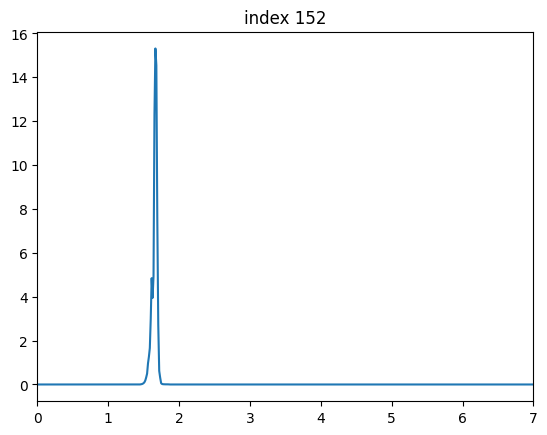

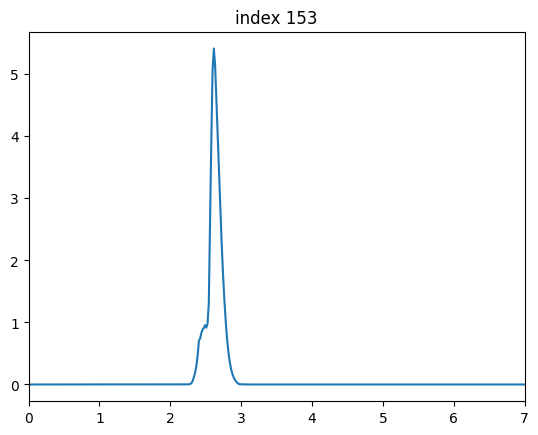

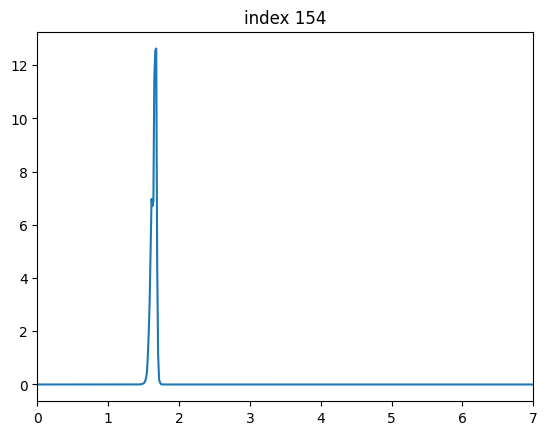

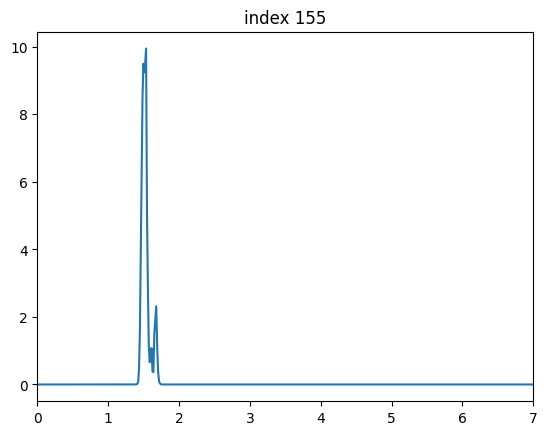

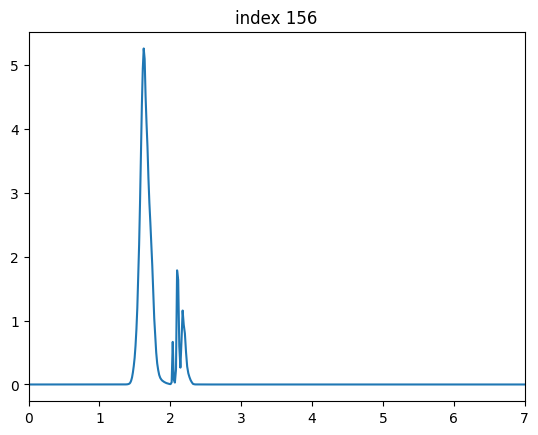

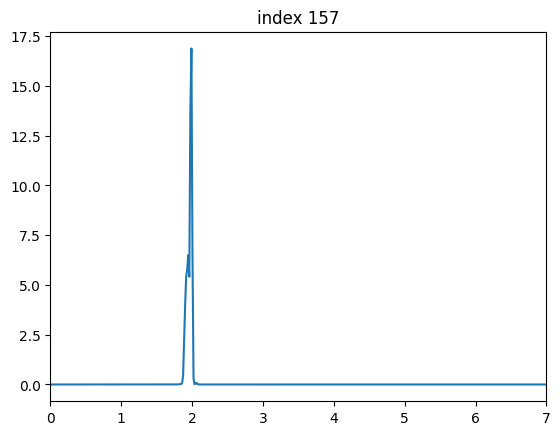

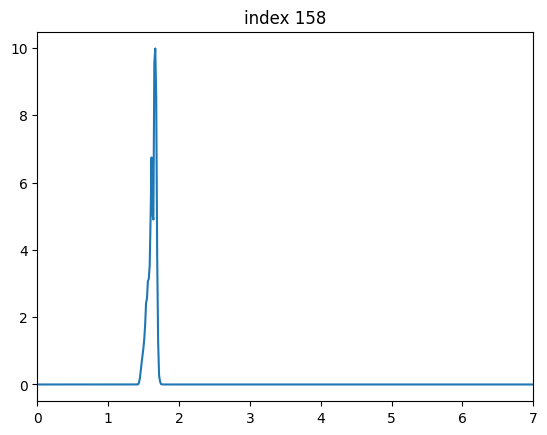

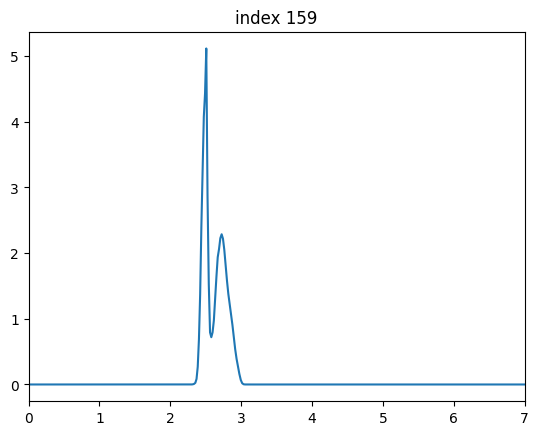

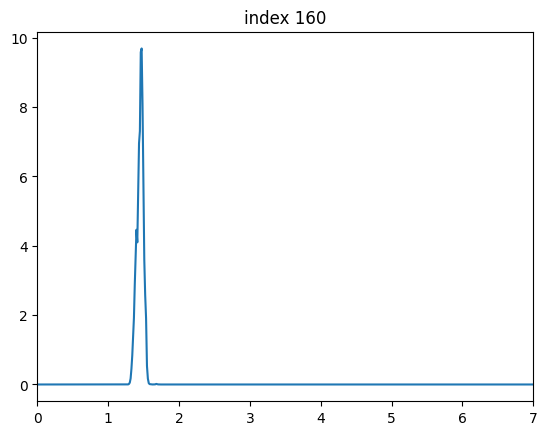

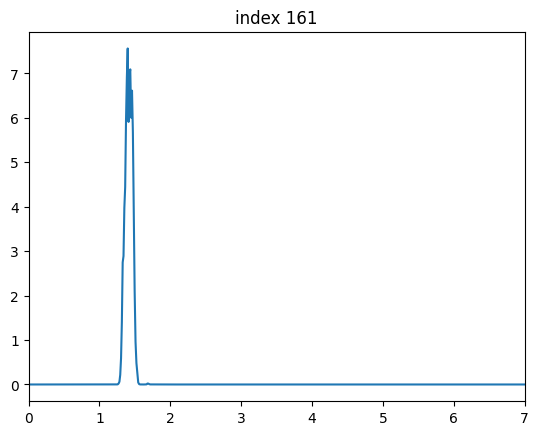

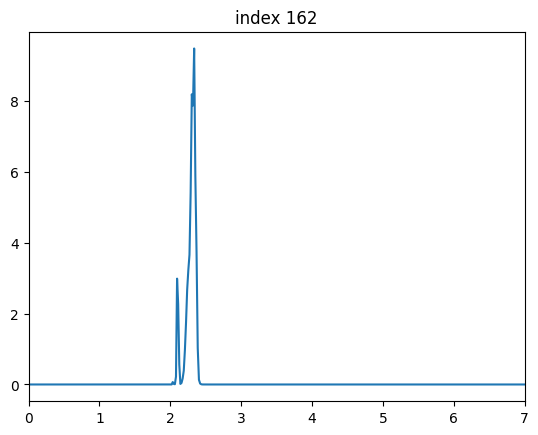

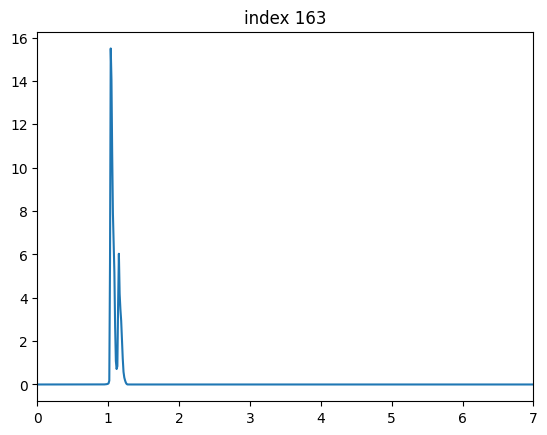

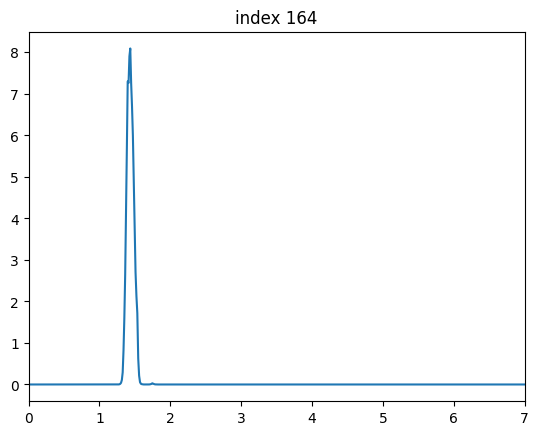

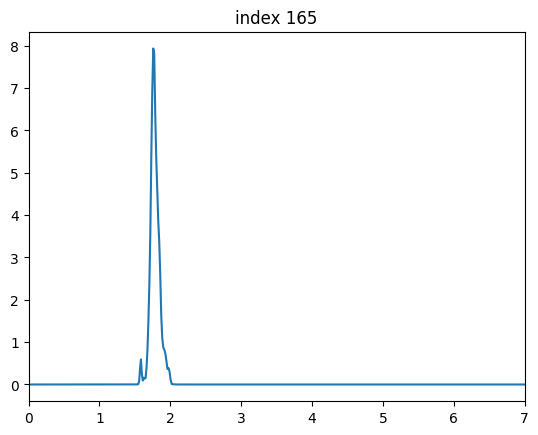

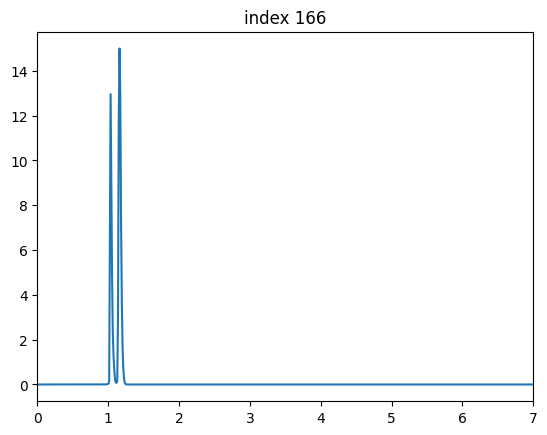

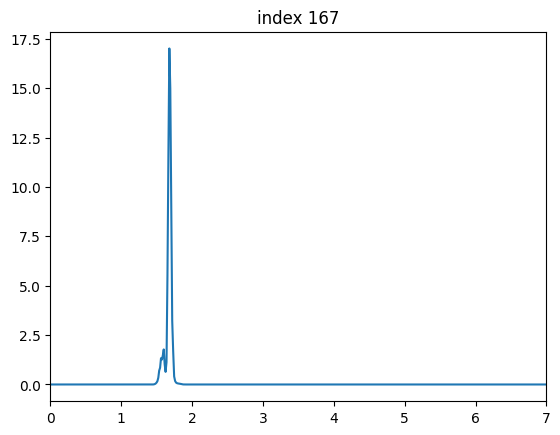

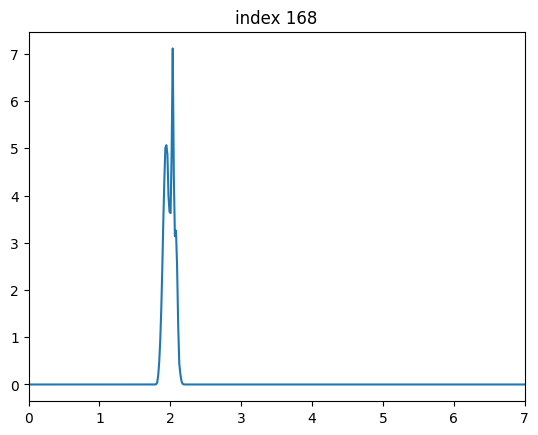

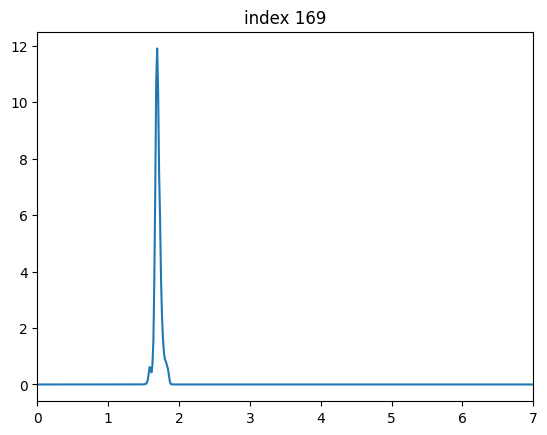

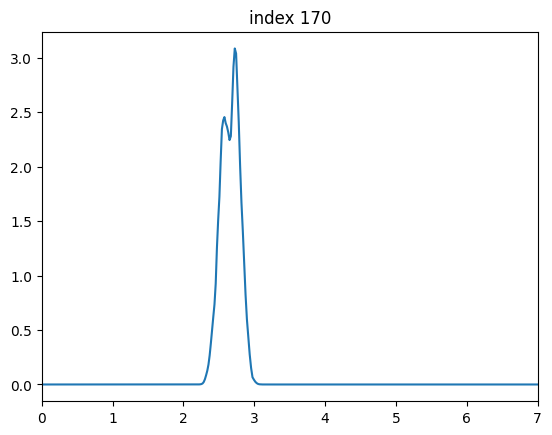

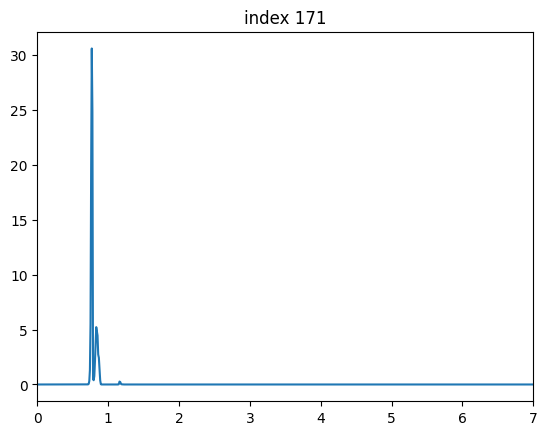

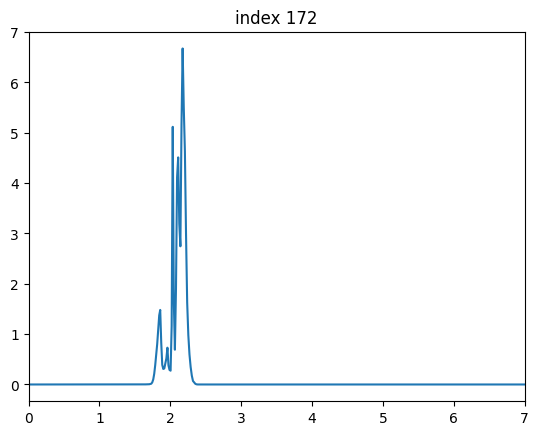

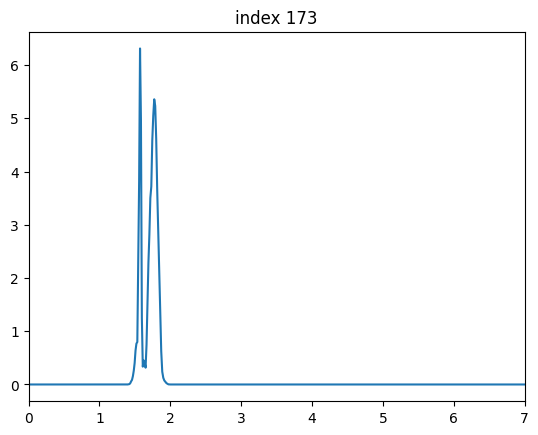

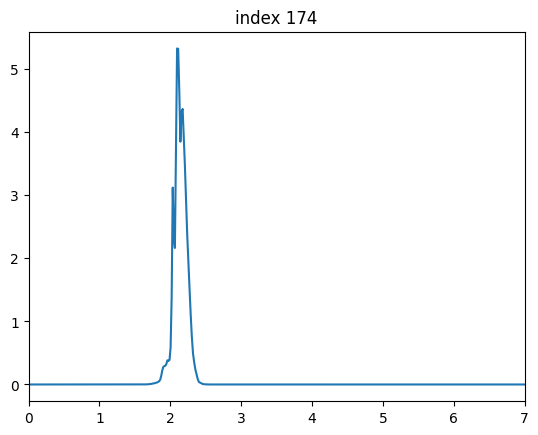

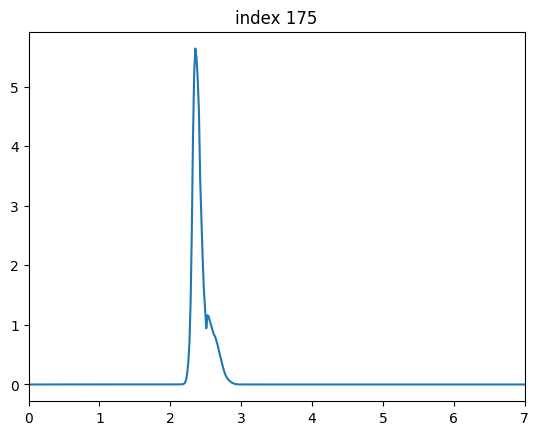

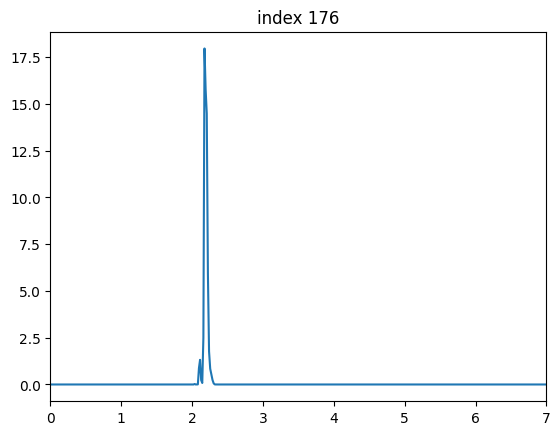

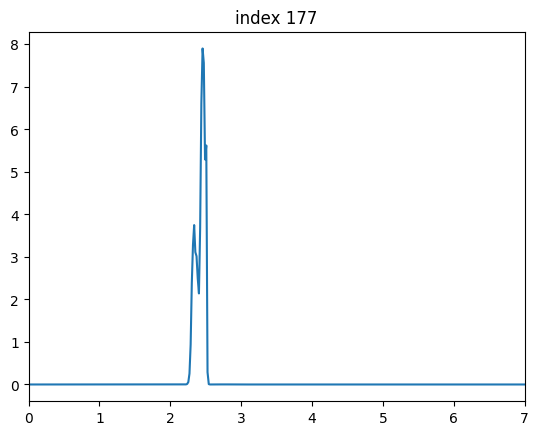

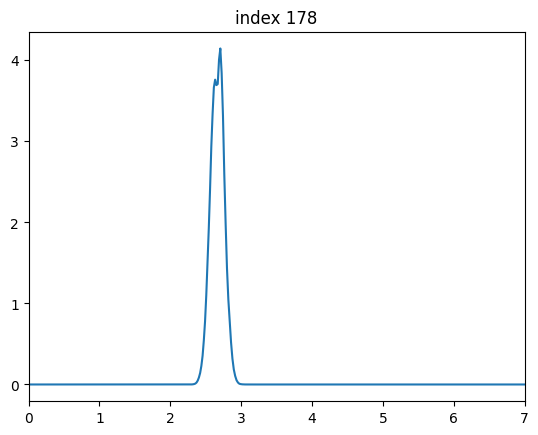

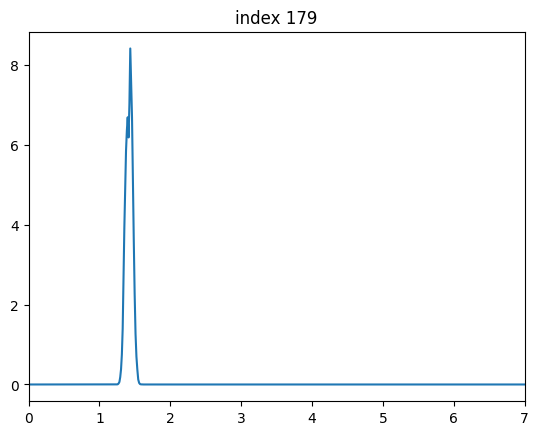

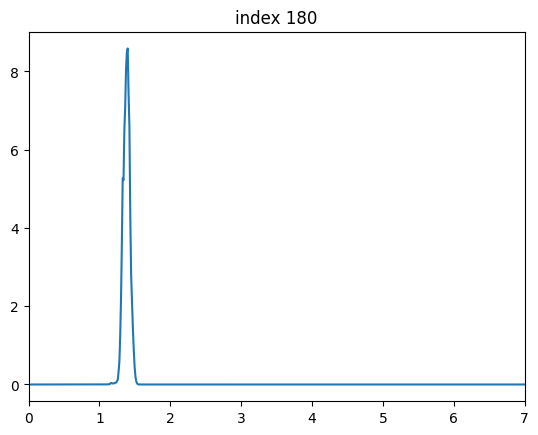

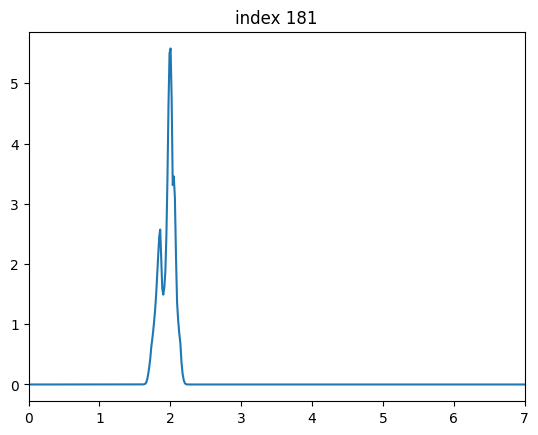

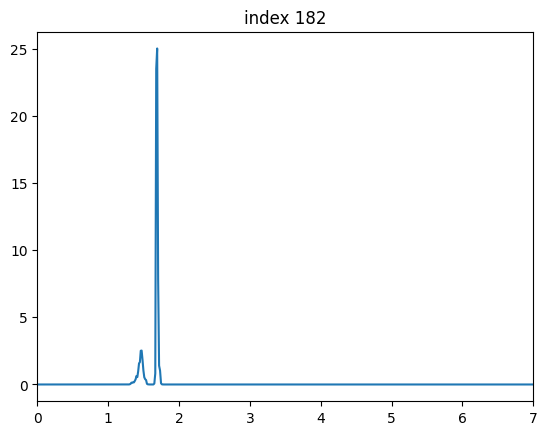

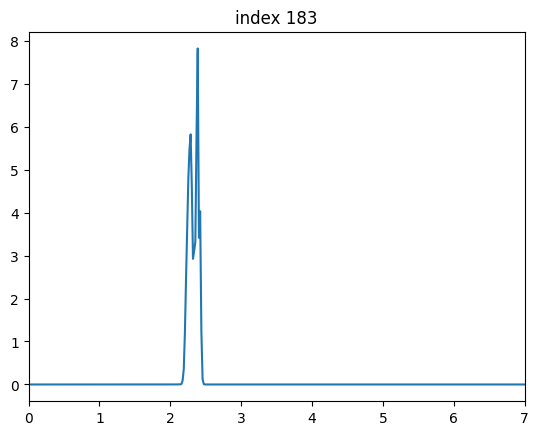

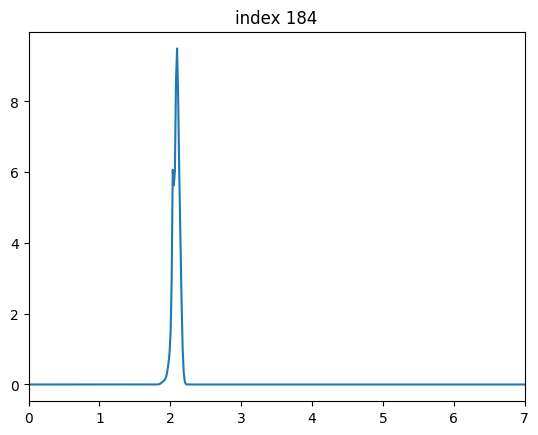

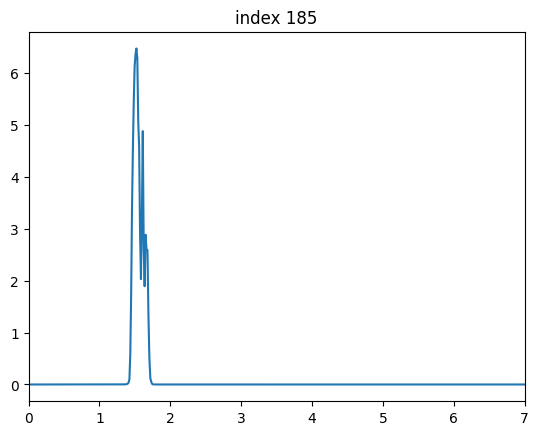

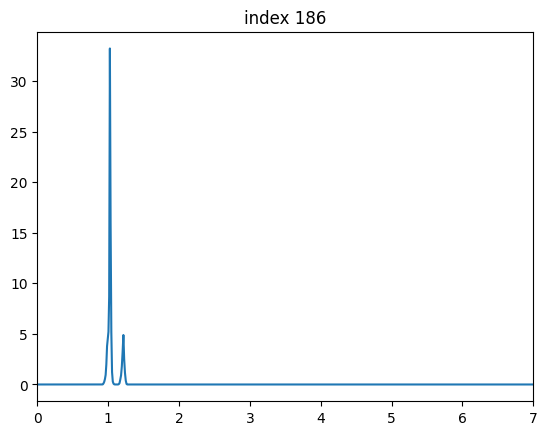

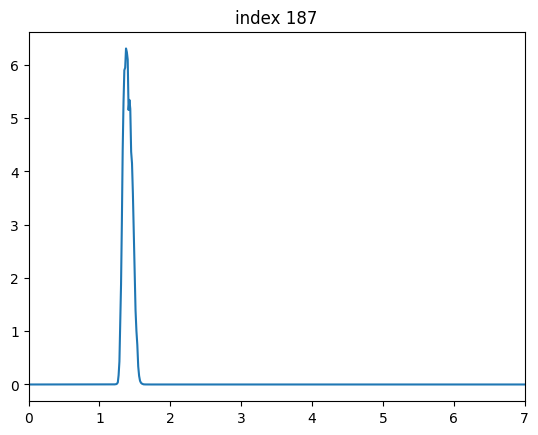

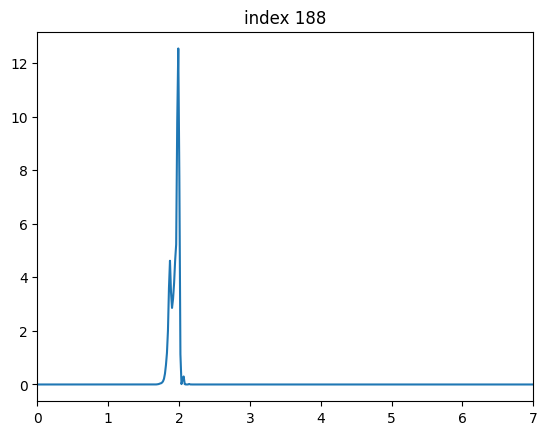

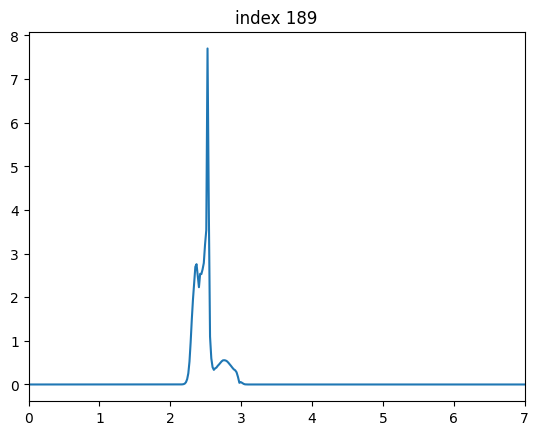

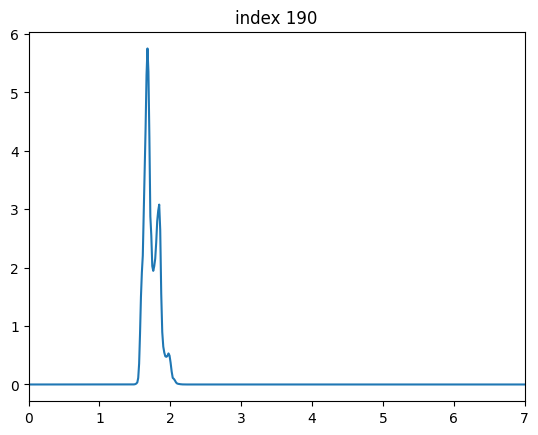

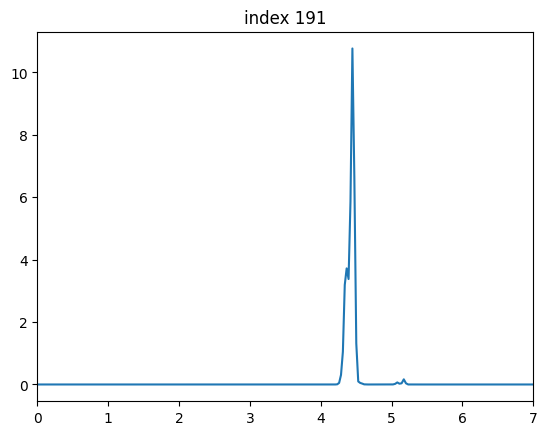

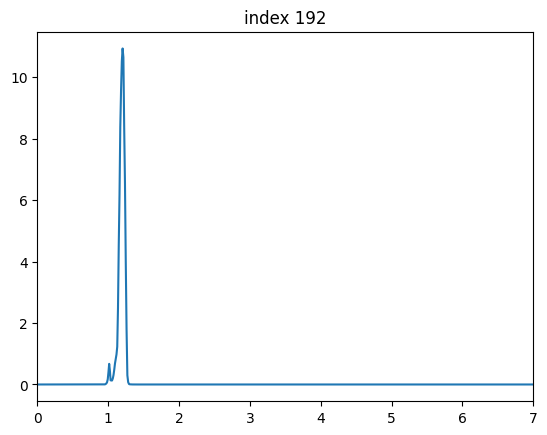

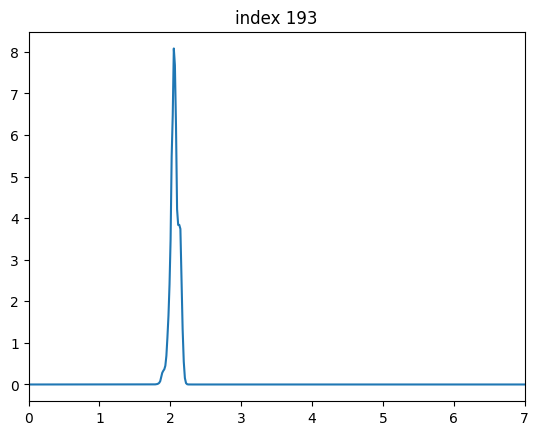

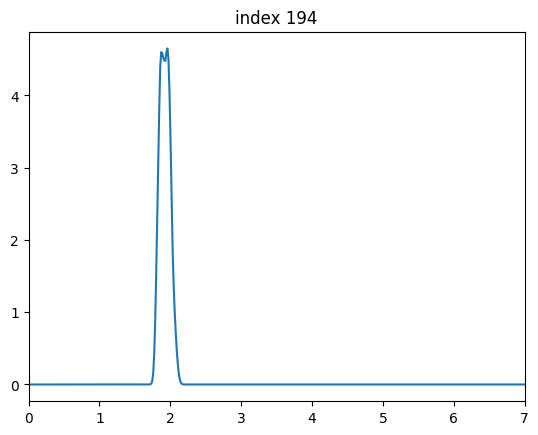

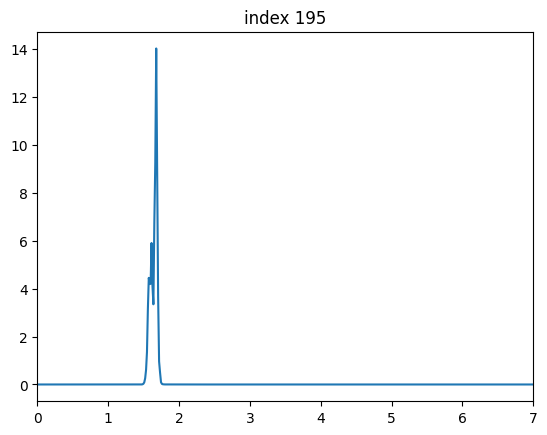

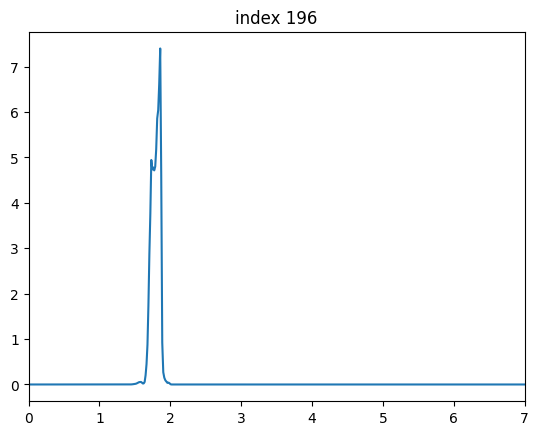

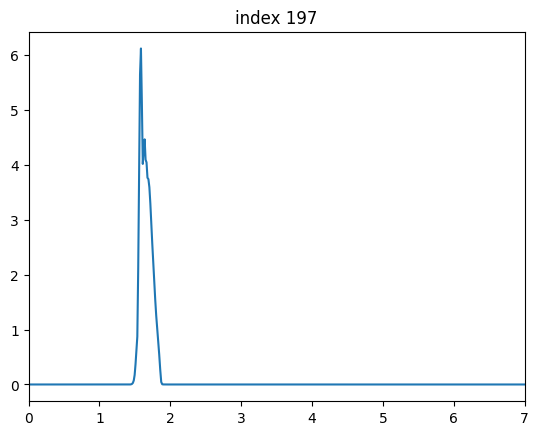

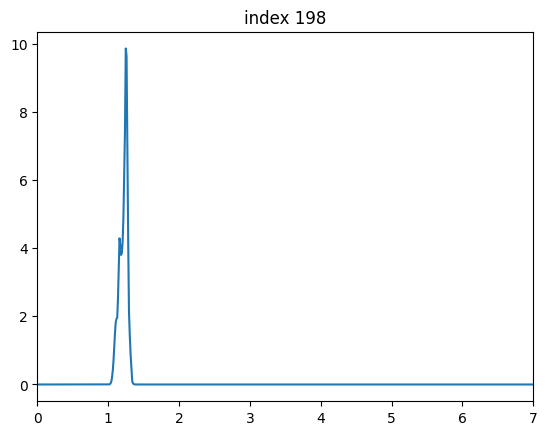

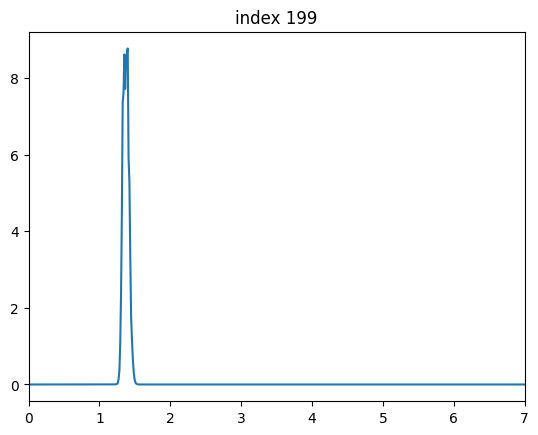

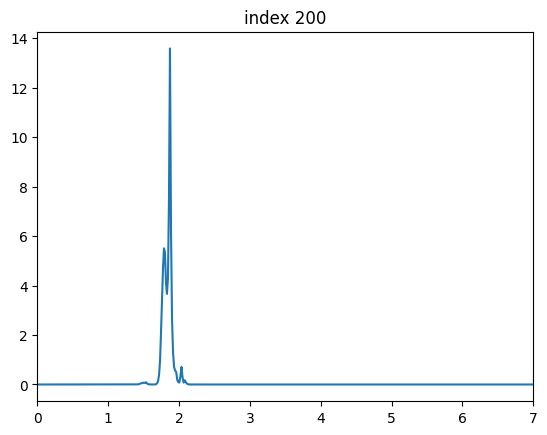

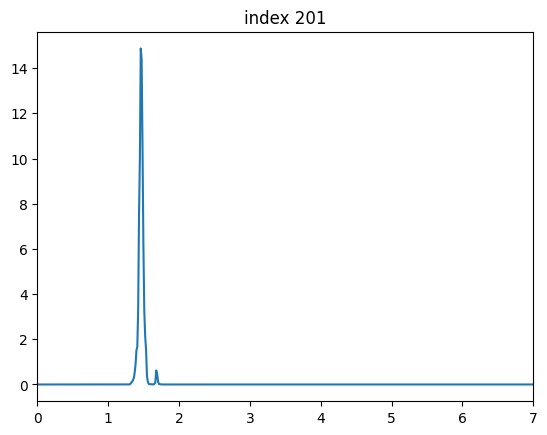

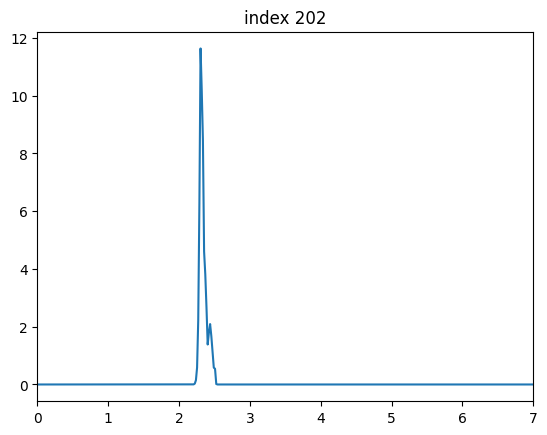

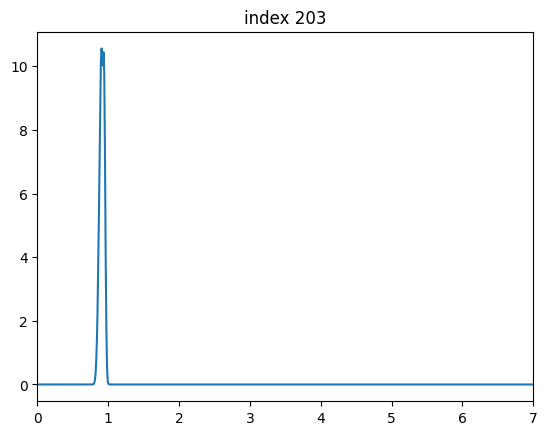

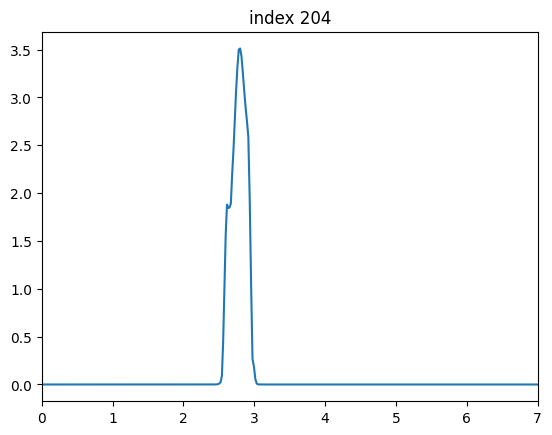

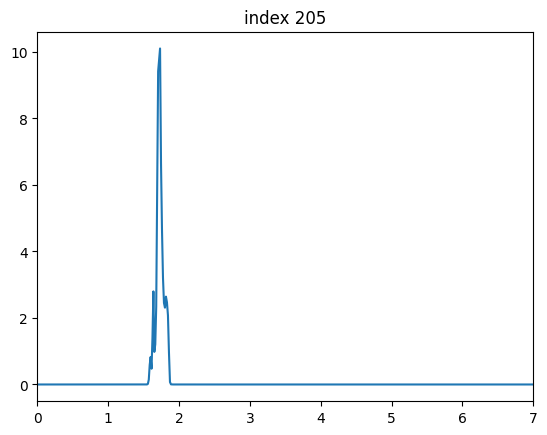

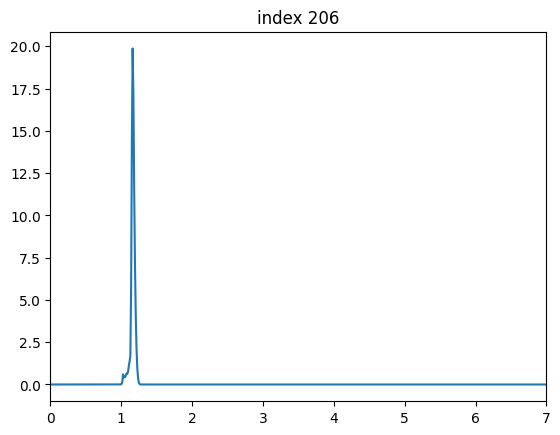

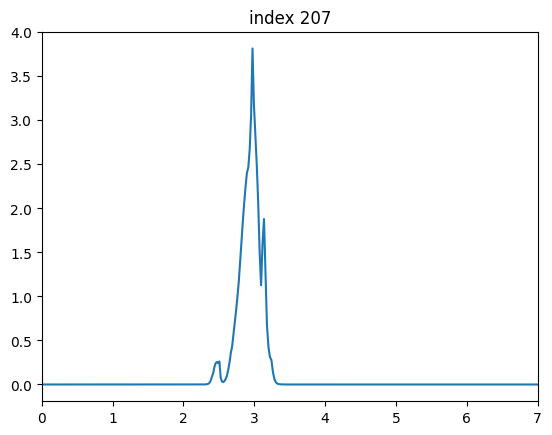

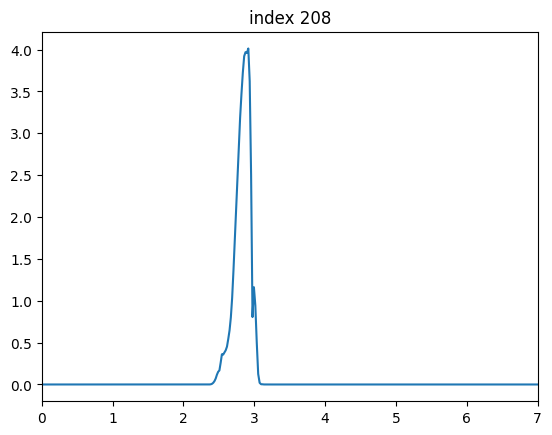

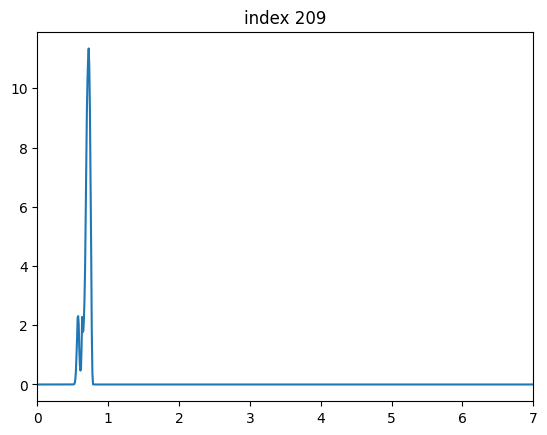

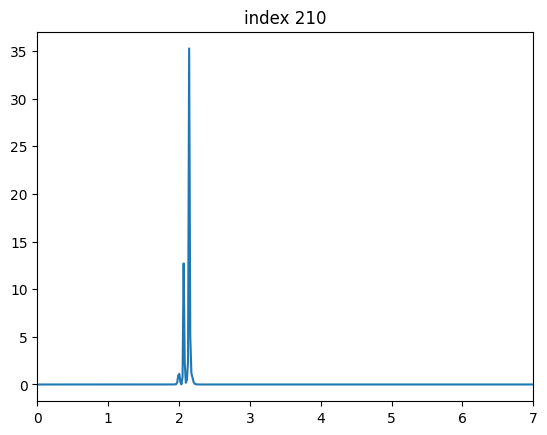

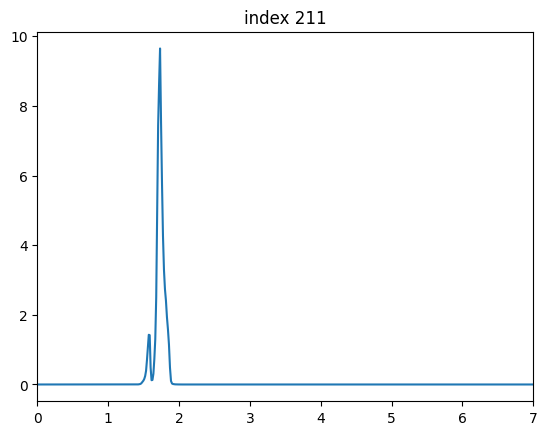

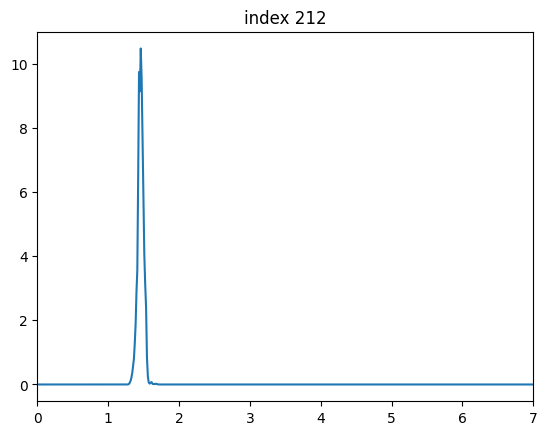

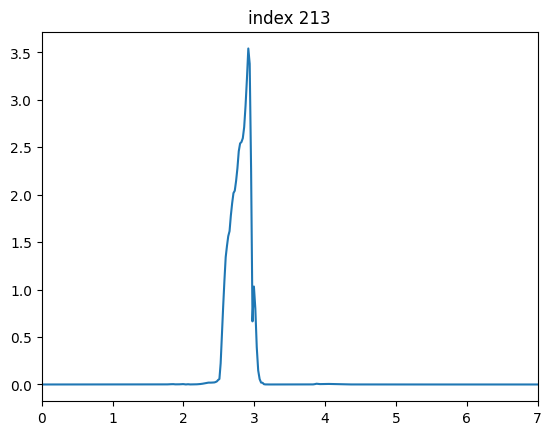

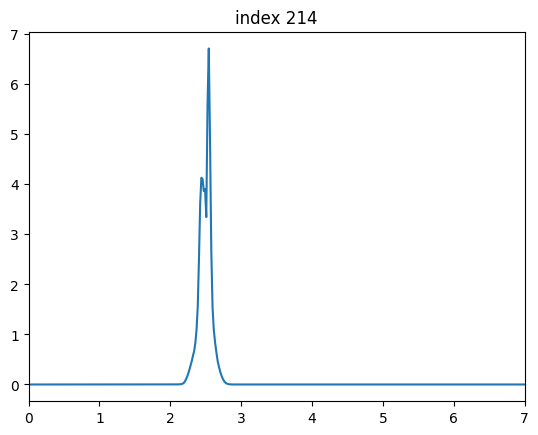

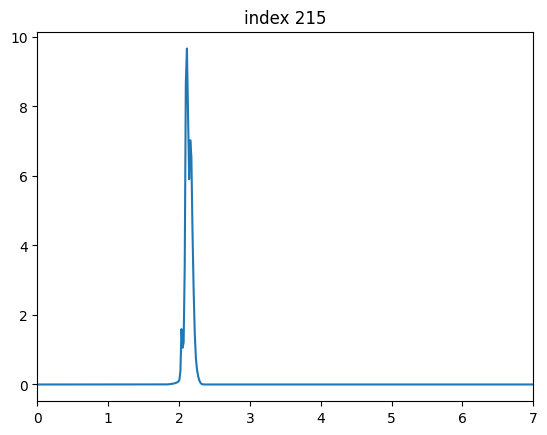

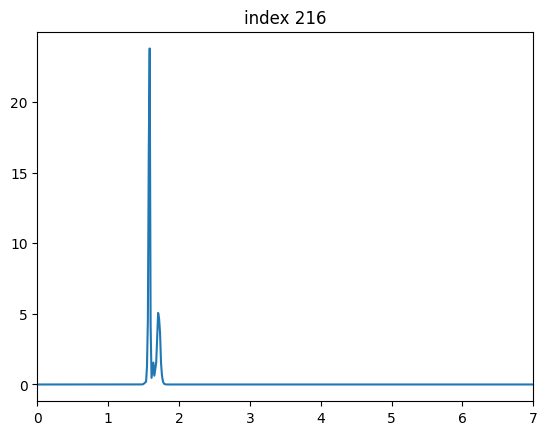

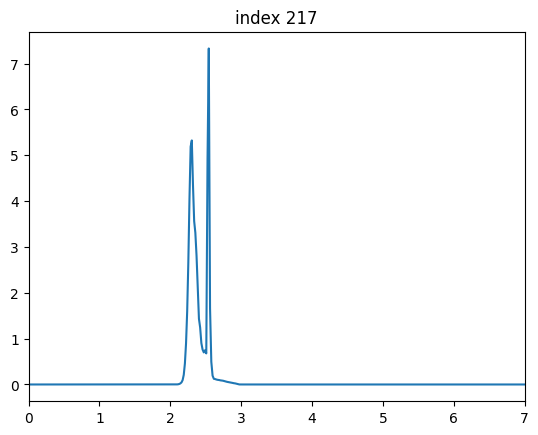

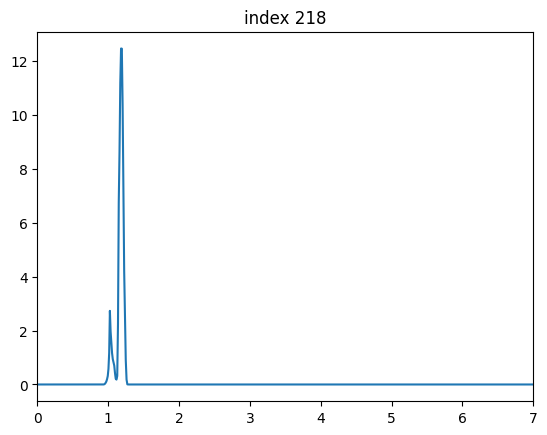

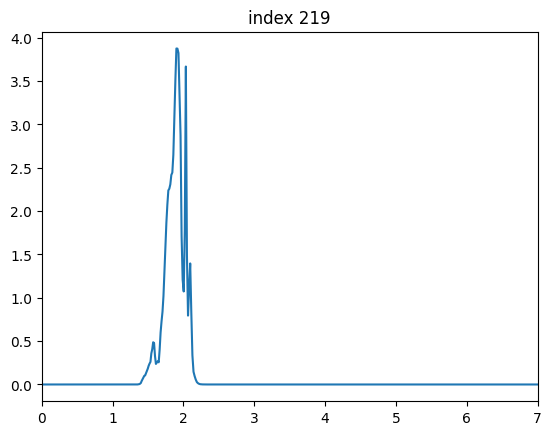

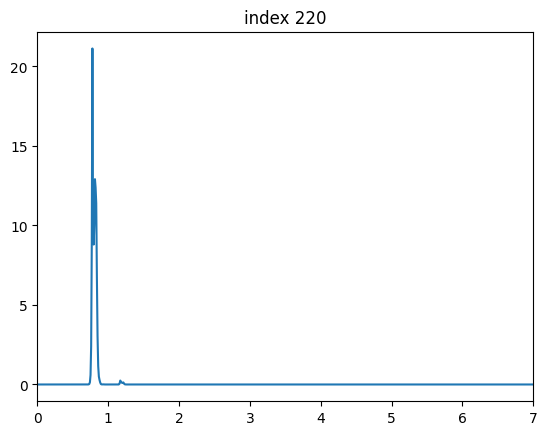

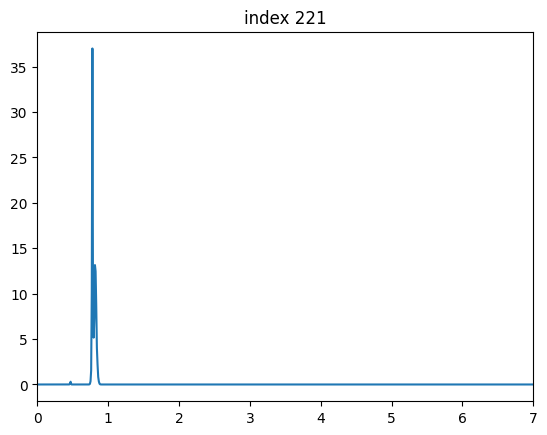

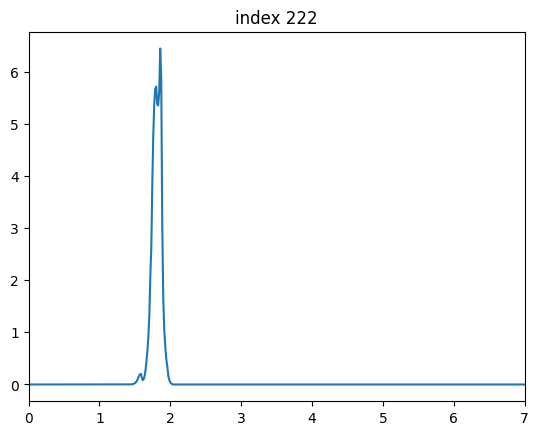

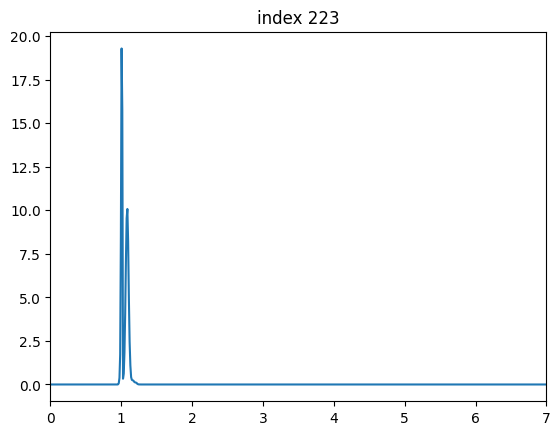

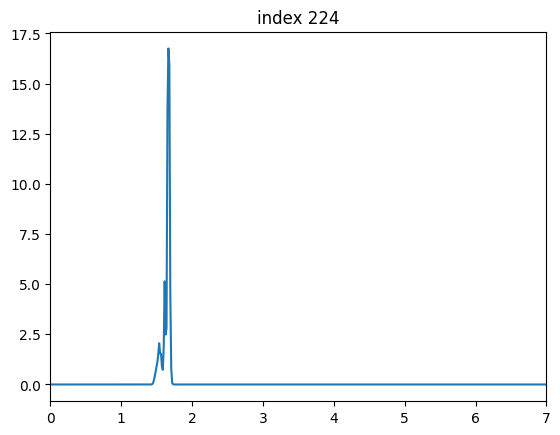

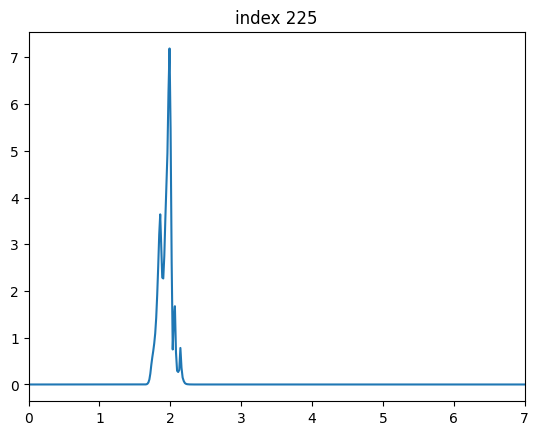

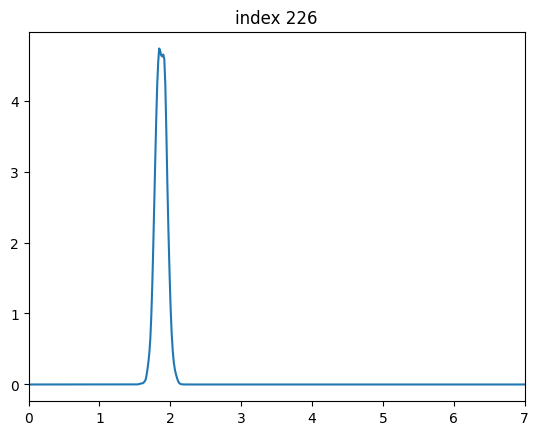

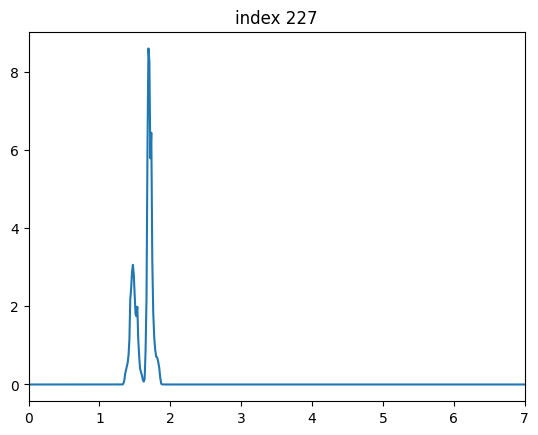

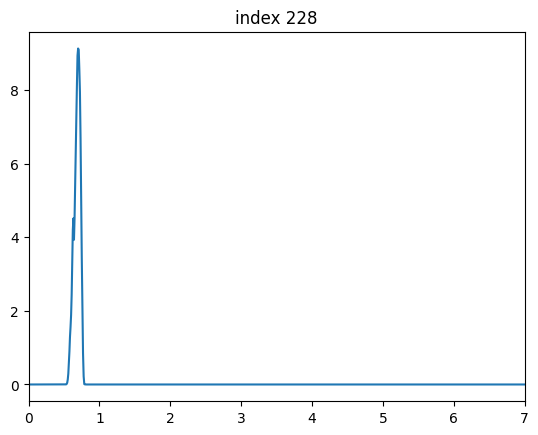

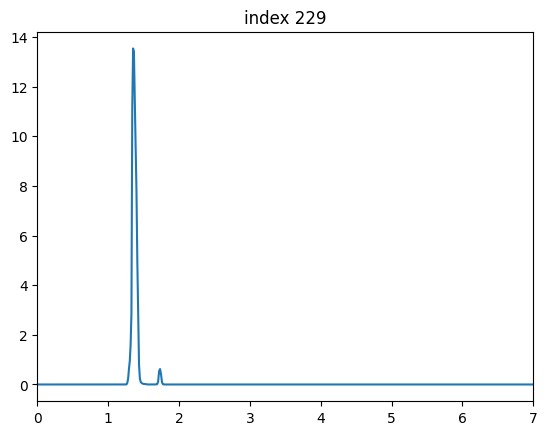

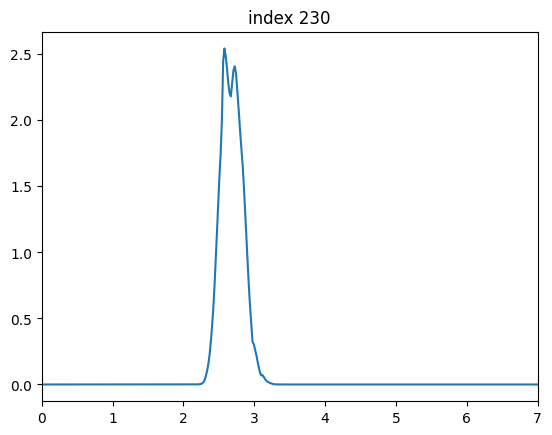

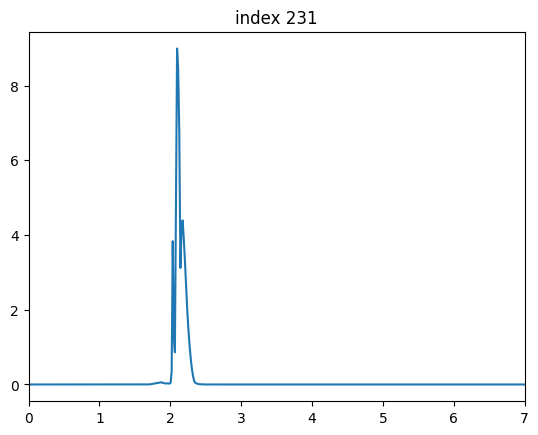

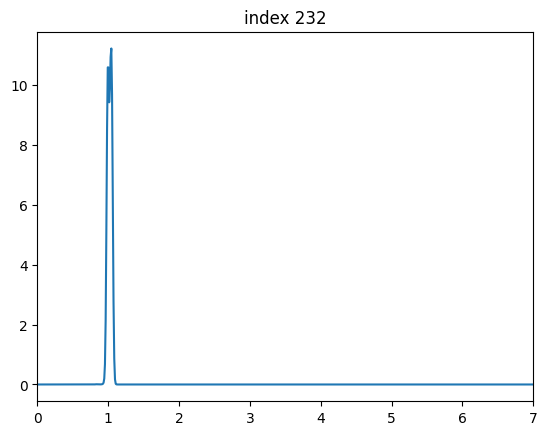

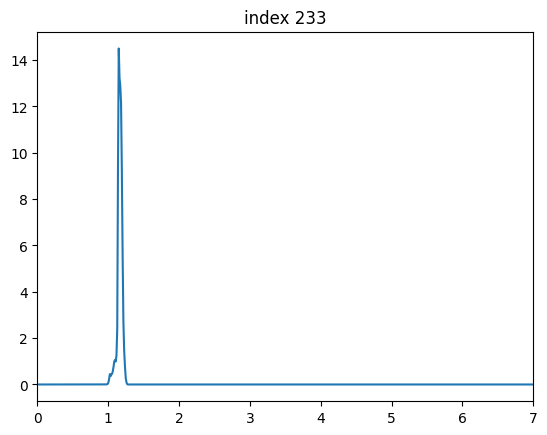

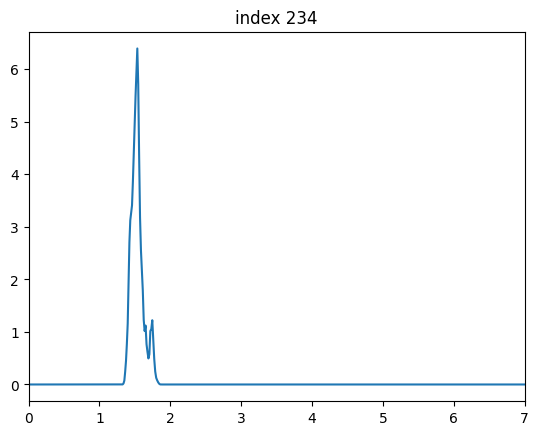

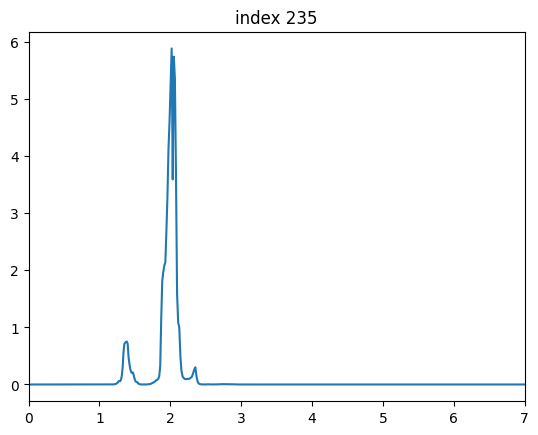

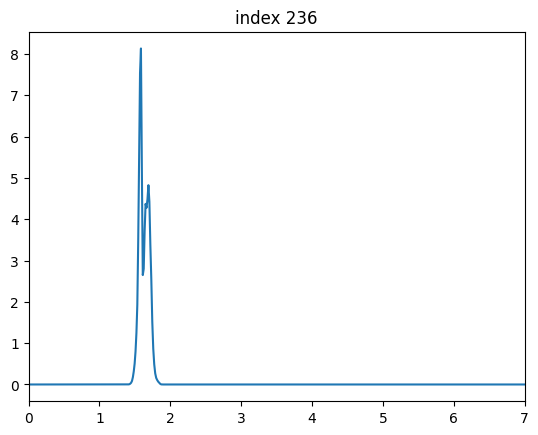

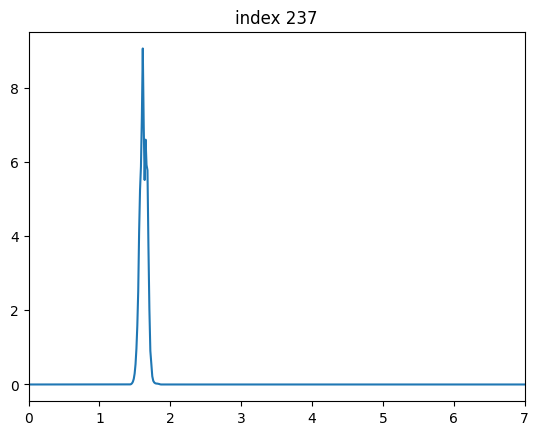

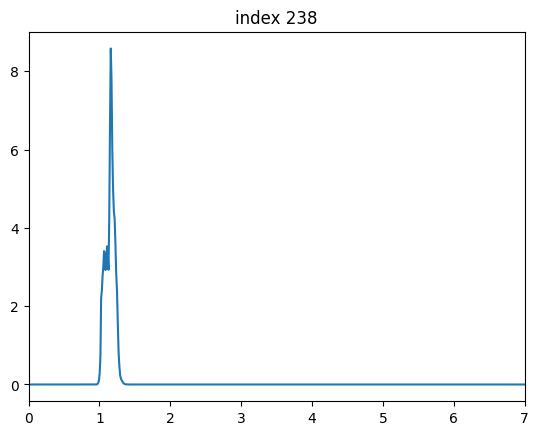

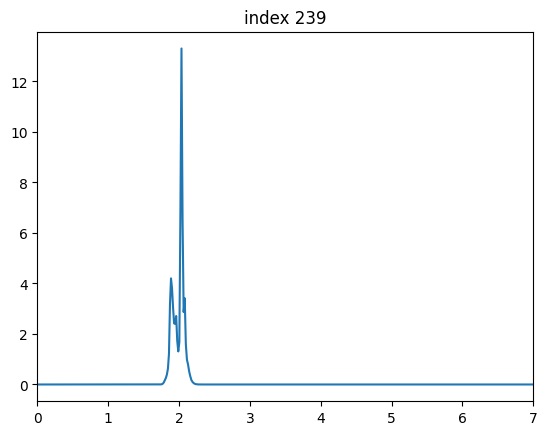

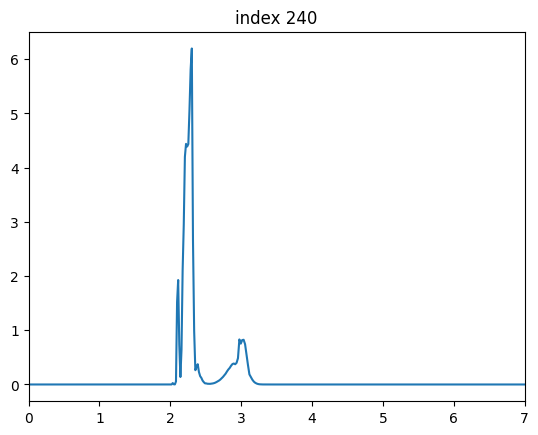

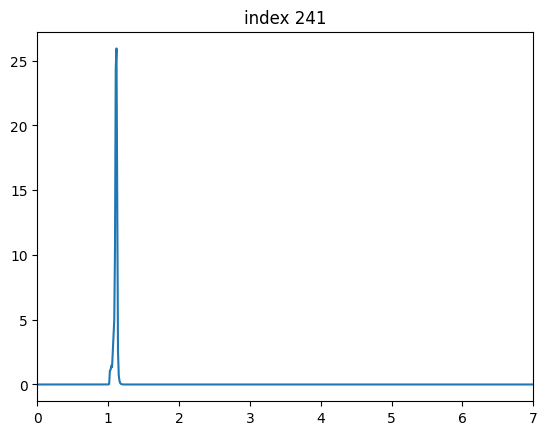

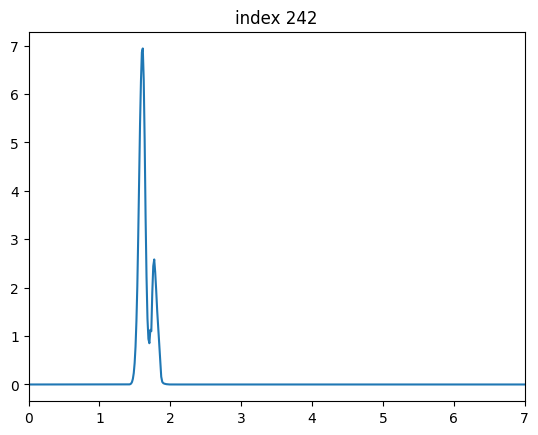

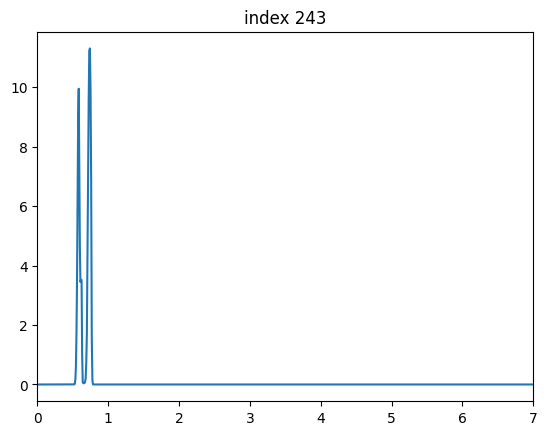

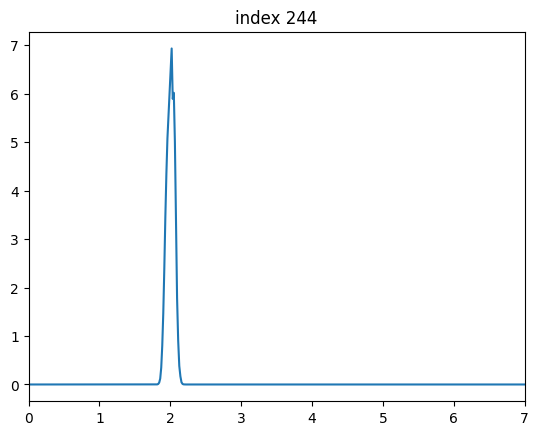

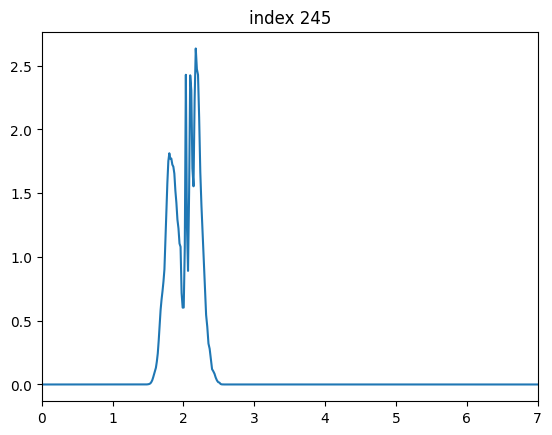

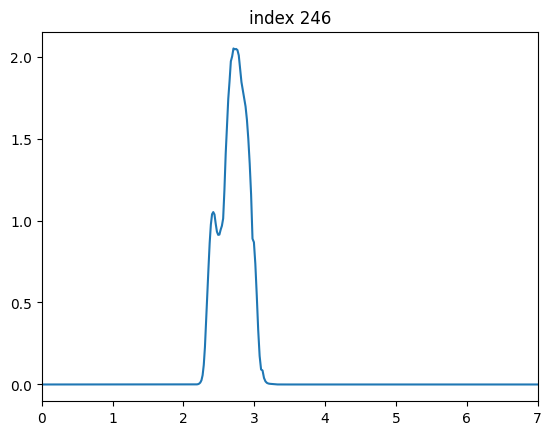

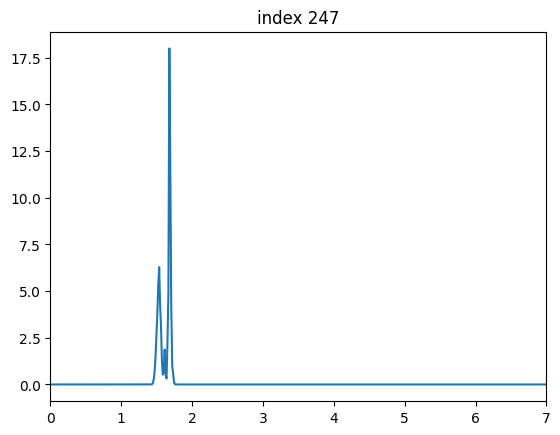

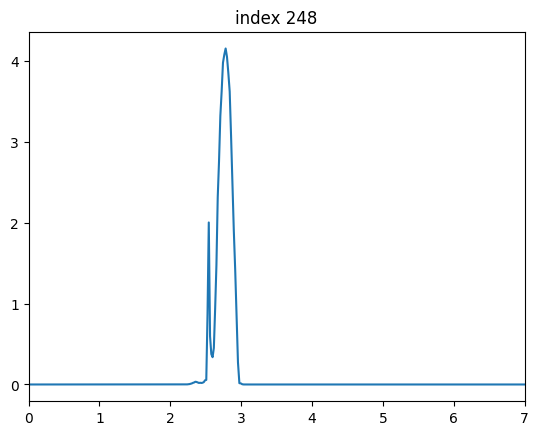

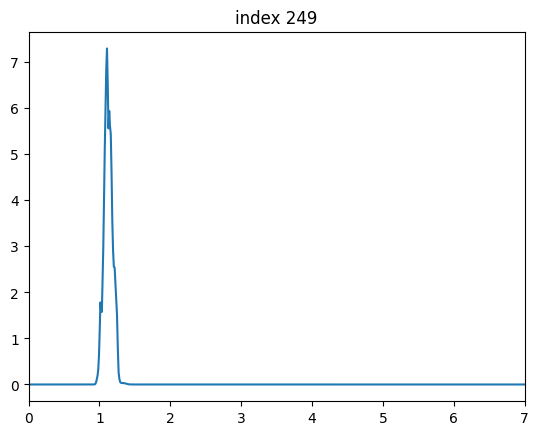

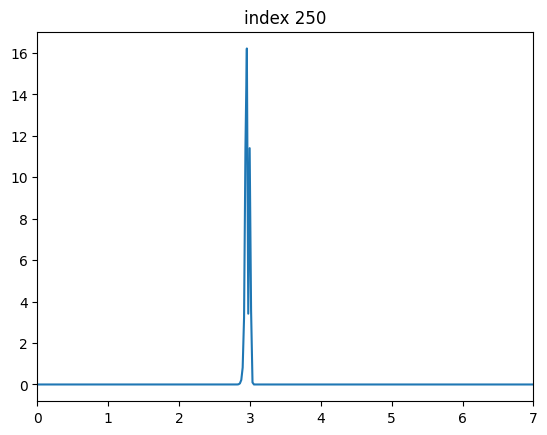

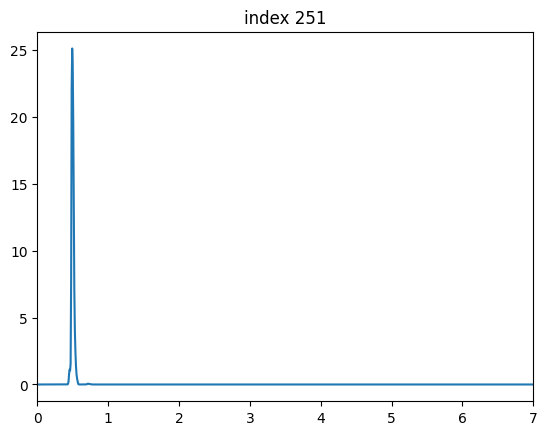

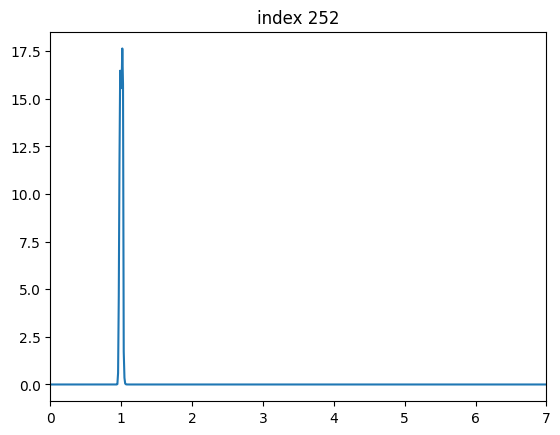

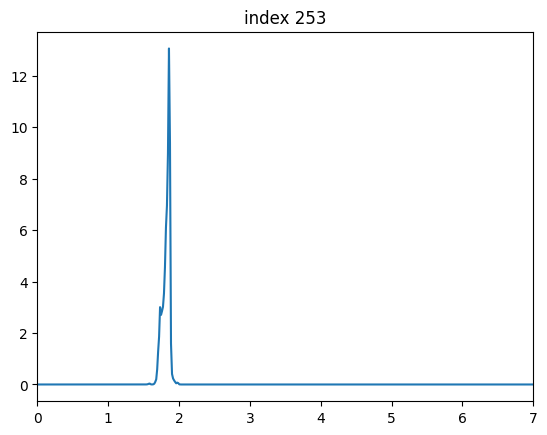

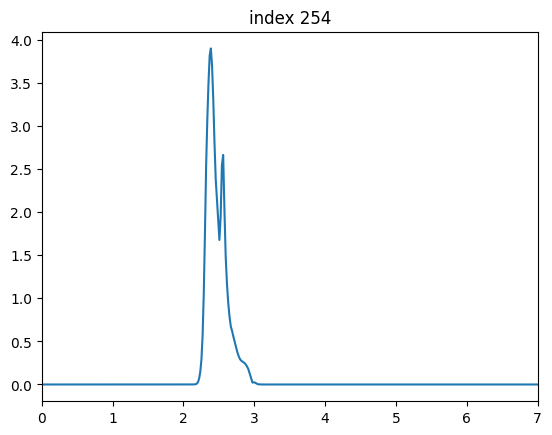

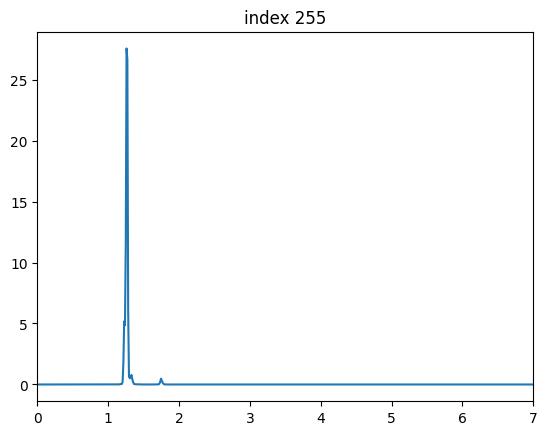

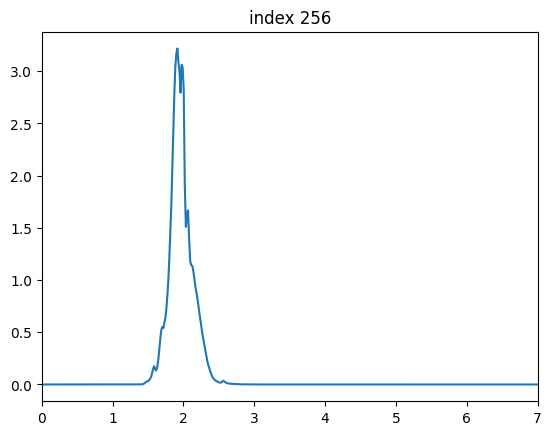

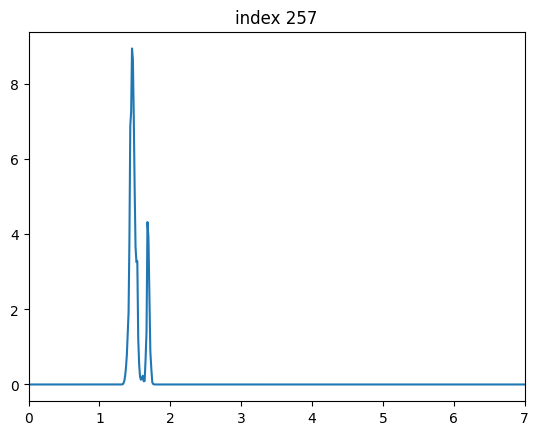

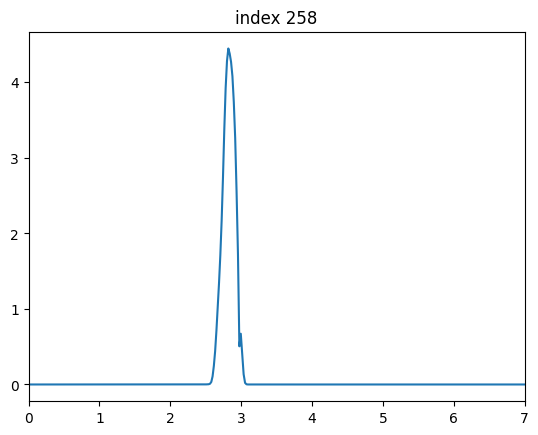

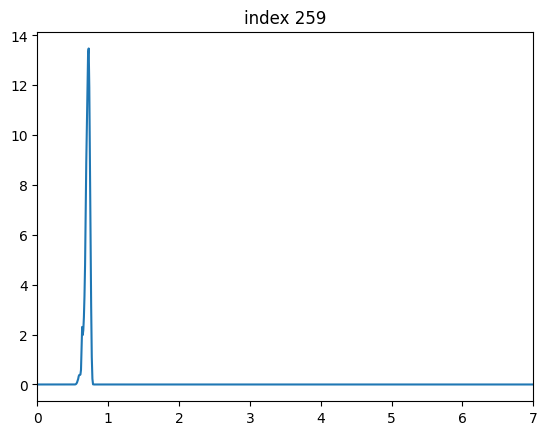

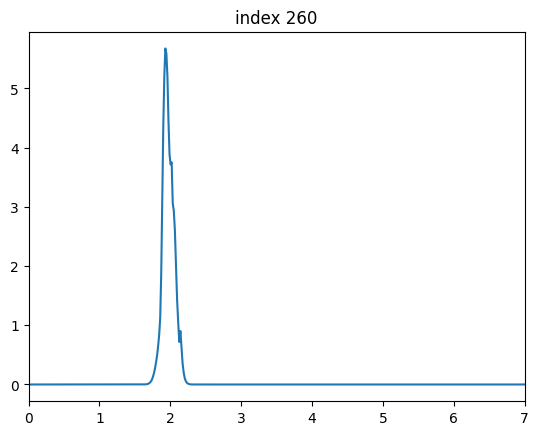

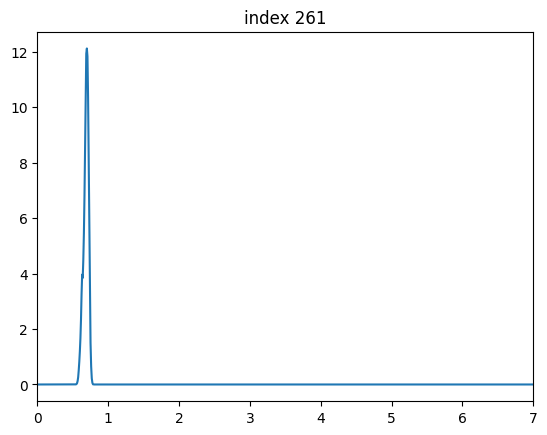

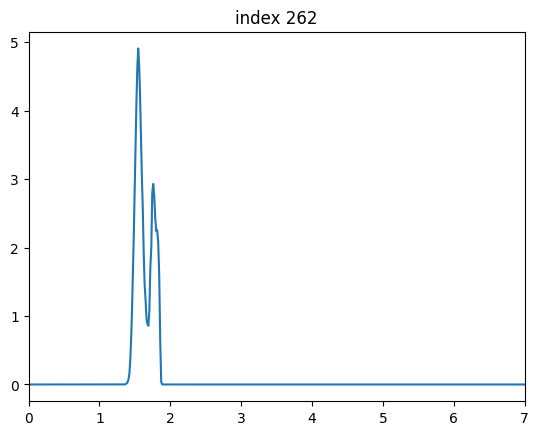

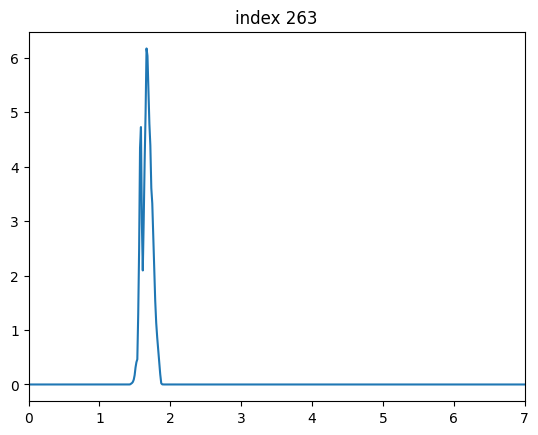

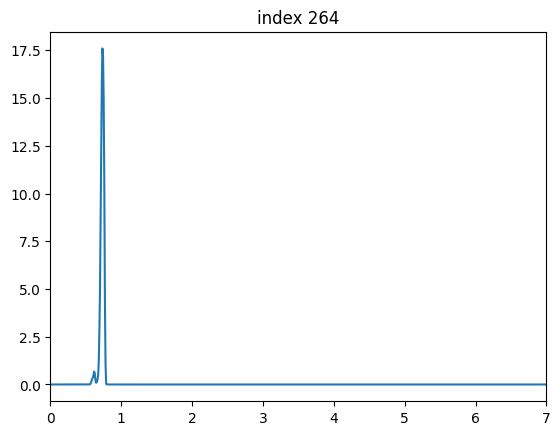

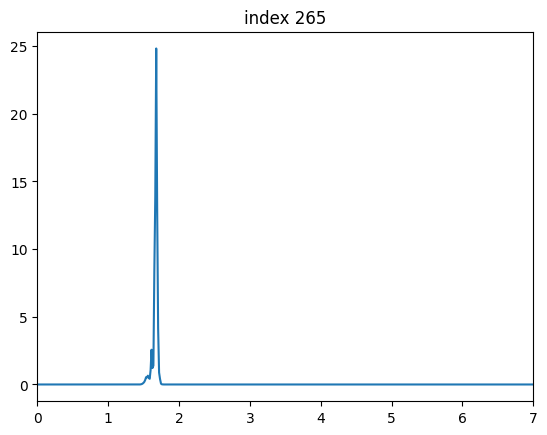

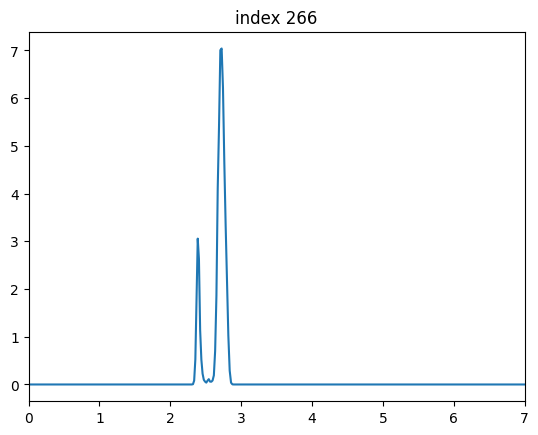

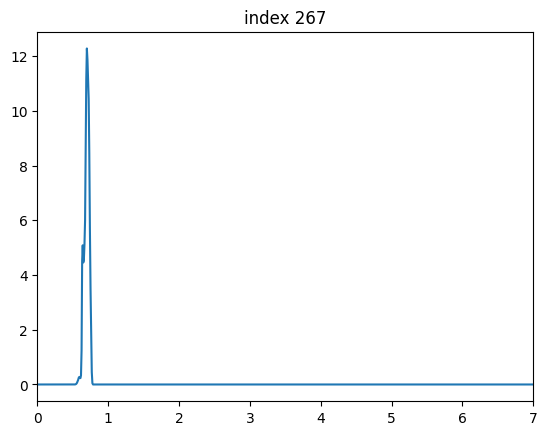

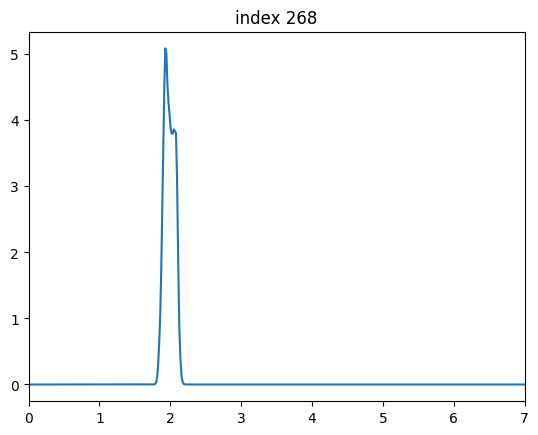

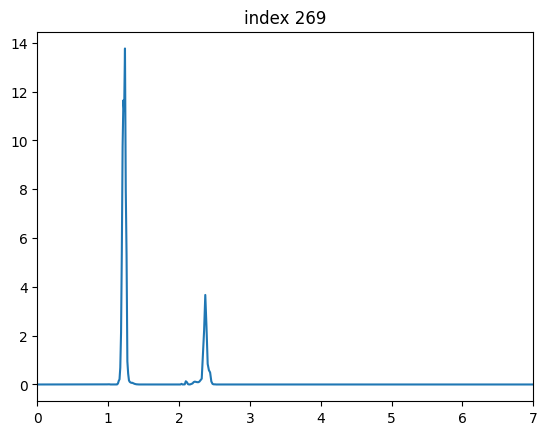

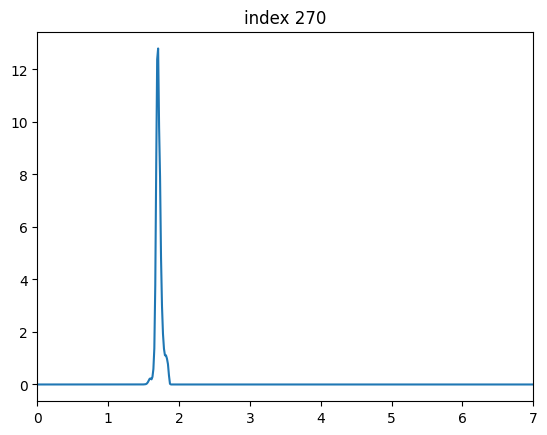

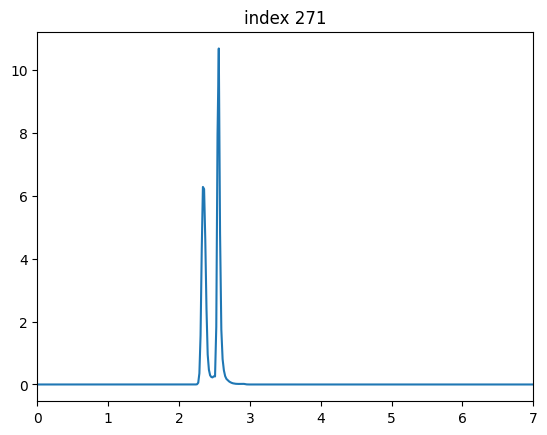

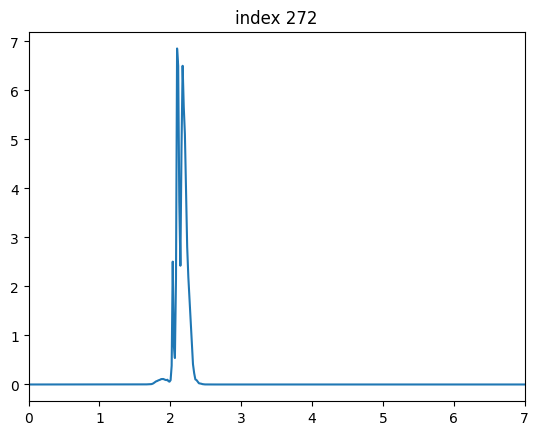

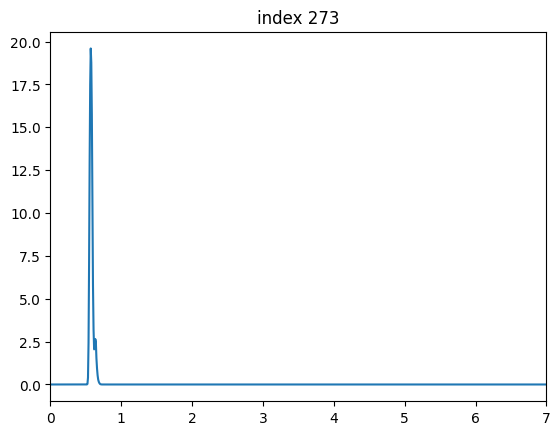

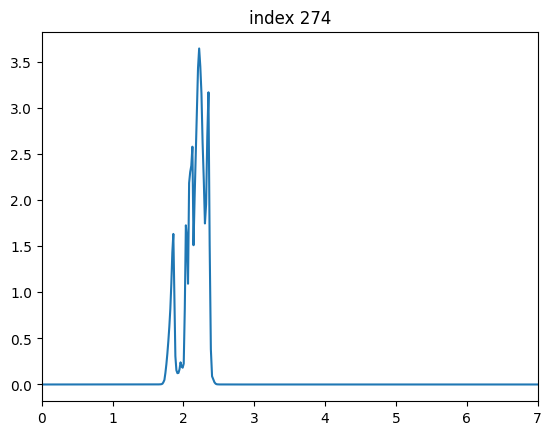

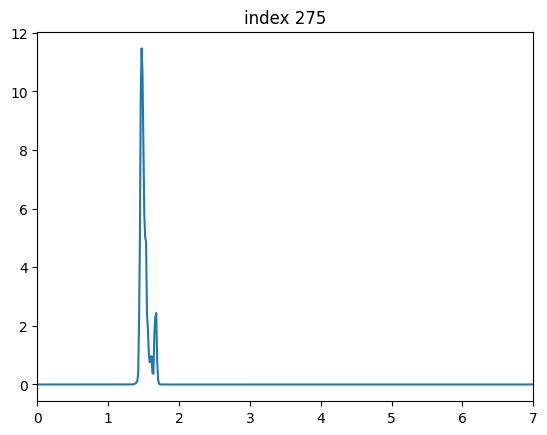

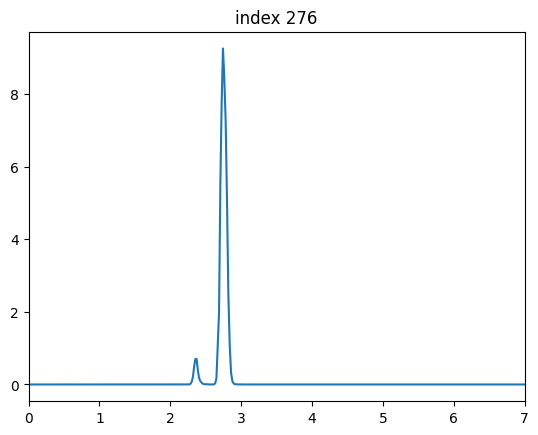

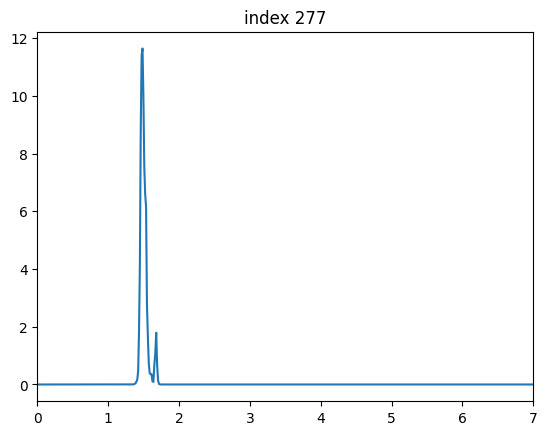

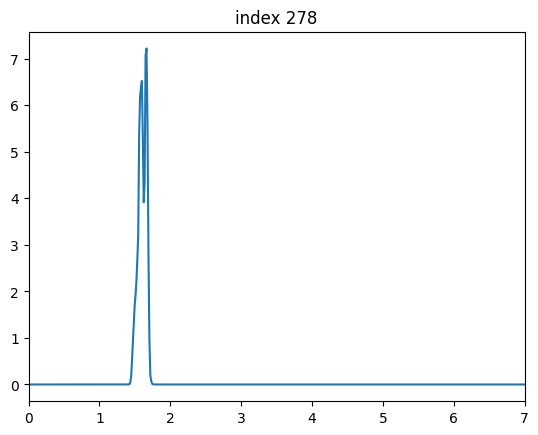

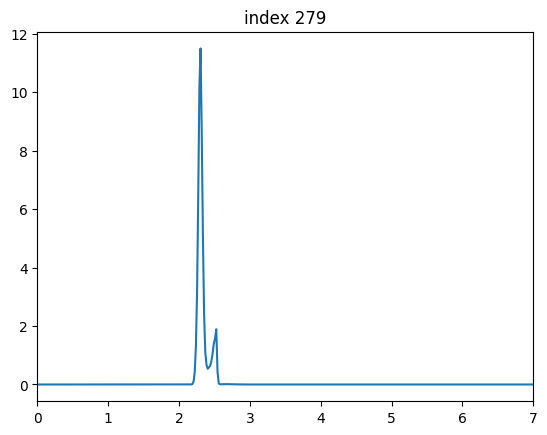

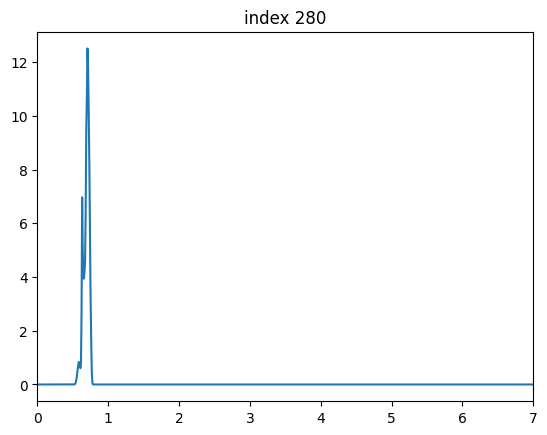

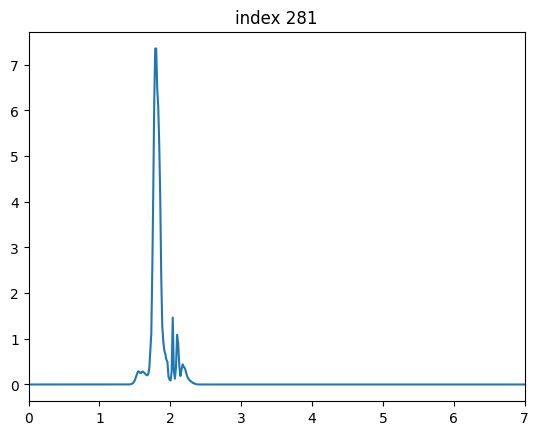

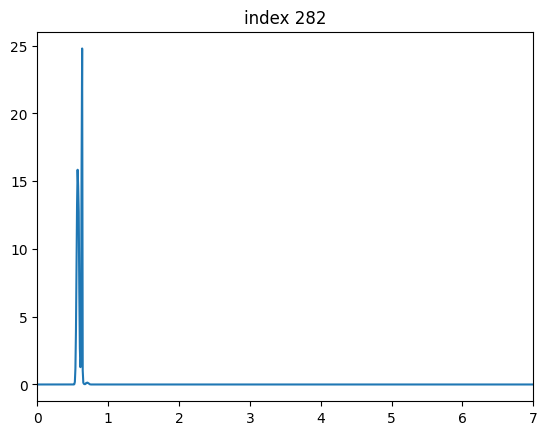

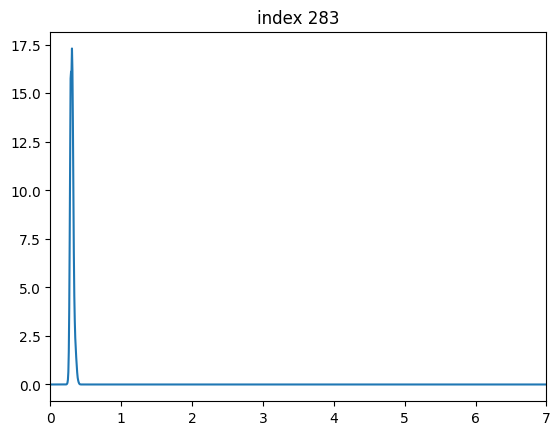

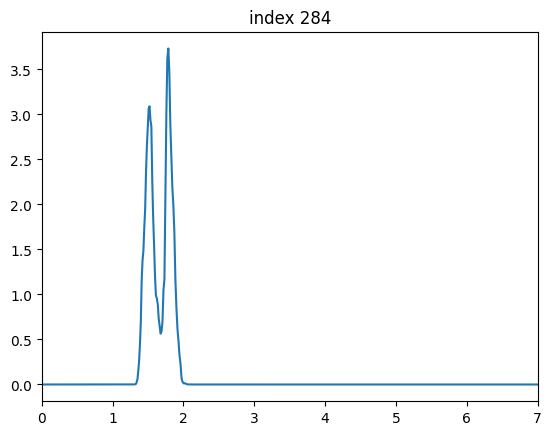

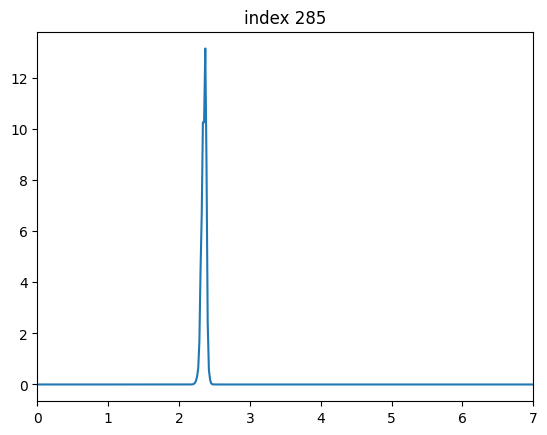

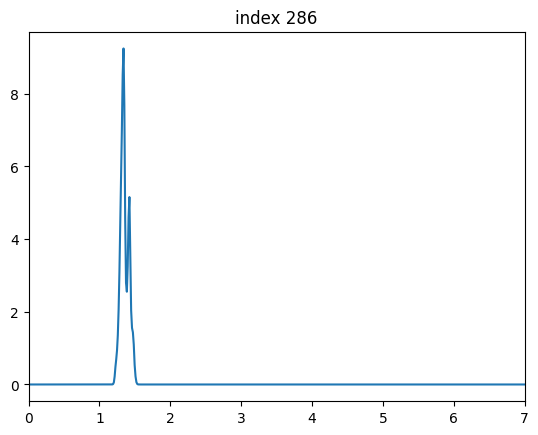

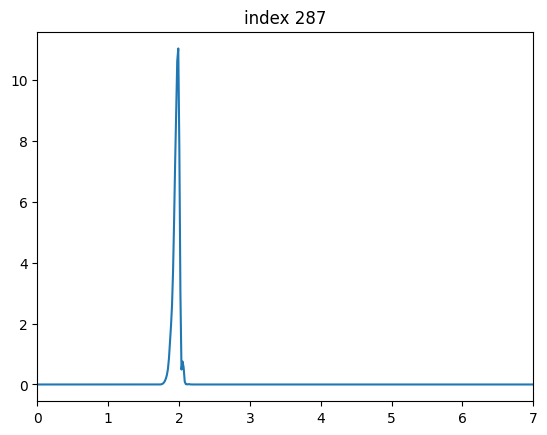

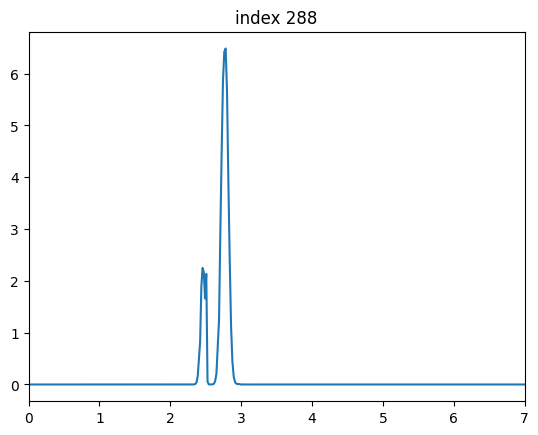

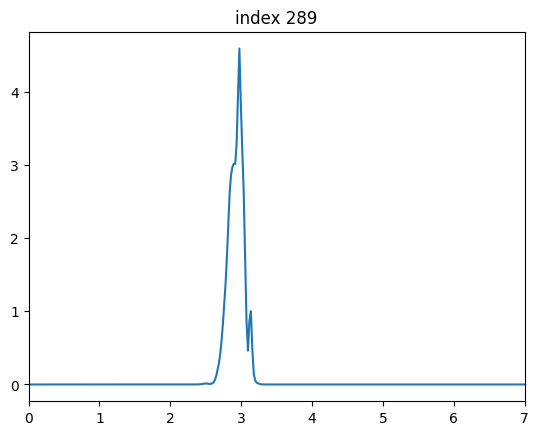

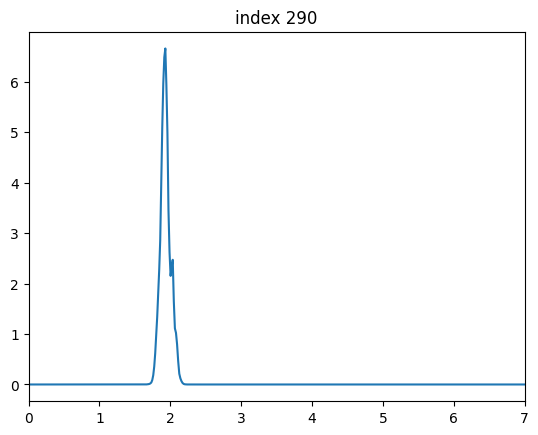

In [523]:
for i in range(len(list_of_degen)):
    
    plt.figure()
    plt.plot(common_z_grid, np.exp(self.lnp[list_of_degen[i],:]))
    plt.title(f"index {i+1}")
    
    plt.xlim(0,7)
#     plt.legend()
    plt.show()
    
    

In [566]:
#     plt.figure()
#     plt.plot(common_z_grid, np.exp(self.lnp[755,:]))
#     plt.title(f"index {i+1}")

1


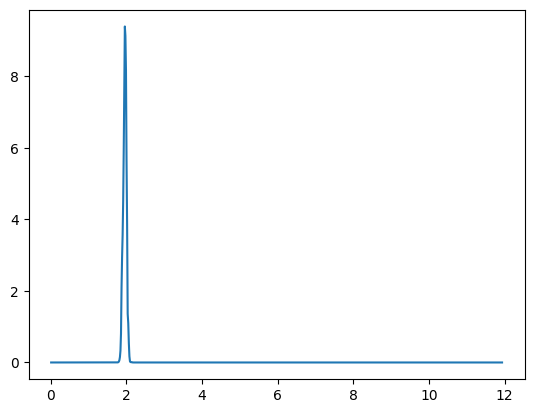

In [511]:
# Find peaks using the find_peaks function from SciPy



test = 3

peaks, _ = find_peaks(np.exp(self.lnp[test,:]), height=5)  # Adjust height parameter as needed

print(len(peaks))


plt.plot(common_z_grid, np.exp(self.lnp[test,:]), label='Optical')

<!-- do it for index ) :
7 (great), 33, 34 meh, 43, 52, 60 ,62,65,65,68,72,73, 77,80, 82, 83, 87(interesting), 118, 129 (GOOD), 149, 155, 171, 244 (decent), 268 (great), 273, 280, 283 (good) , 287,  -->

## do it for index ) :
### 
7 (great), 33, 34 meh, 43, 52, 60 ,62,65,65,68,72,73, 77,80, 82, 83, 87(interesting), 118, 129 (GOOD), 149, 155, 171, 244 (decent), 268 (great), 273, 280, 283 (good) , 287, 



In [525]:
# selected_degen = np.array([7,33, 34, 43, 52, 60, 62, 65, 68, 72, 73, 77, 80, 82, 83, 87, 118,129,149,155,171,244, 268, 273, 280, 283, 287])




array([34, 43])

In [2]:
# np.where(np.max(combined_pdf) == max )


# peaks, _ = find_peaks(combined_pdf)

# peaks

# potential index: 324, 369, 434

In [603]:
# a single function that caluclates p(z) optical and FIR (normalzit it ) and create joint PDF
import numpy as np
from scipy.interpolate import interp1d

def get_broadband_photometry(galaxy_index):


    # Generate example data for two PDFs
    # p1_z = np.exp(self.lnp[ind,:])
    


    p_FIR = get_z_and_T_for_one_galaxy(FIR_index[galaxy_index])[4]
    
    p_FIR /= np.sum(p_FIR)
    

    p_optical = np.exp(self.lnp[galaxy_index,:])
    p_optical /= np.sum(p_optical)

    # # Create a common grid for interpolation
    # common_z_grid = np.linspace(min(p_optical), max(p_optical), len(p_optical))



    # # Combine the PDFs by element-wise multiplication
    combined_pdf = p_FIR * p_optical

    # Normalize the combined PDF
    combined_pdf /= np.sum(combined_pdf)
    
    
#     z_estimate = common_z_grid[np.where(np.array(combined_pdf)==max(combined_pdf))[0][0]]

    # Print the first few values of the combined PDF

    # z_galaxy683_cosmos = 2.322


    plt.plot(common_z_grid, combined_pdf, label='Combined PDF')
    plt.plot(common_z_grid, p_optical, label='Optical')
    plt.plot(common_z_grid, p_FIR, label='FIR')

    plt.axvline(x=z_cosmos_optical[galaxy_index], color='red', linestyle='--', label = 'Cosmos zphot' )



    # z_cosmos_optical[ind]

    # plt.plot(common_grid, combined_pdf, label='Combined PDF')


    # plt.axvline(x=z_galaxy683_cosmos, color='red', linestyle='--', label = 'simulated z' )
    
    plt.xlim(0,7)
    
    plt.xlabel('z_grid')
    plt.ylabel('Probability Density')
    plt.title('Combined Probability Density Function')

    plt.legend()
    plt.grid(True)
    plt.show()
    
    return()

    
    

The chain is shorter than 50 times the integrated autocorrelation time for 2 parameter(s). Use this estimate with caution and run a longer chain!
N/50 = 60;
tau: [309.49904605 310.23296115]


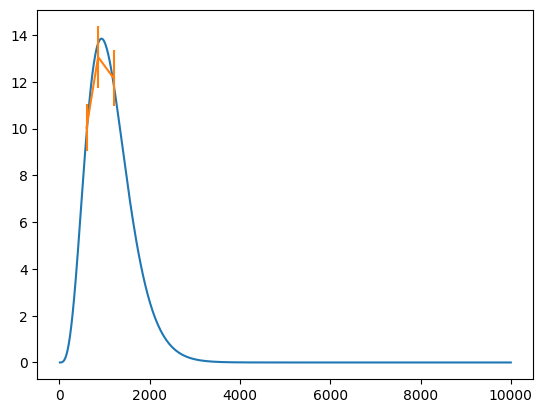

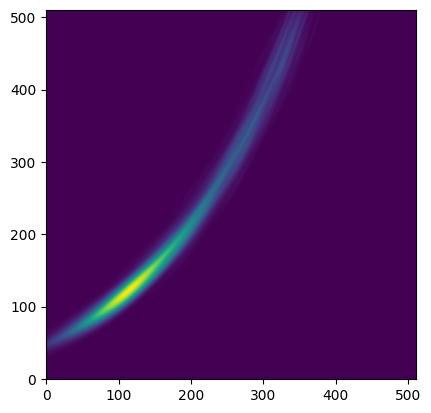

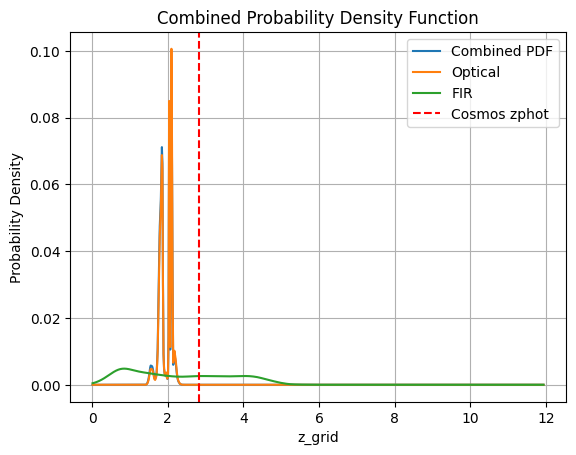

(array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.000000

In [504]:
get_broadband_photometry(369)

The chain is shorter than 50 times the integrated autocorrelation time for 2 parameter(s). Use this estimate with caution and run a longer chain!
N/50 = 60;
tau: [324.06758309 325.30407909]


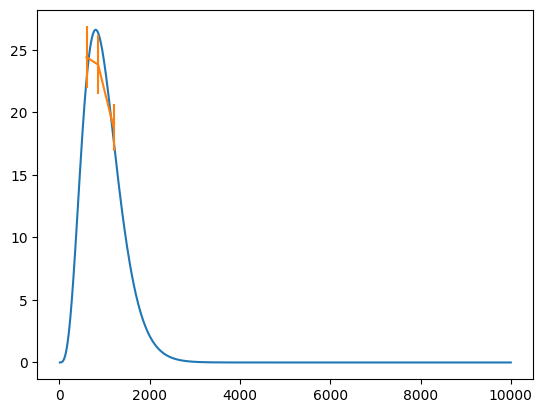

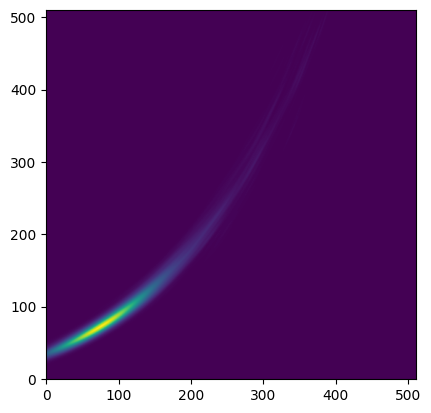

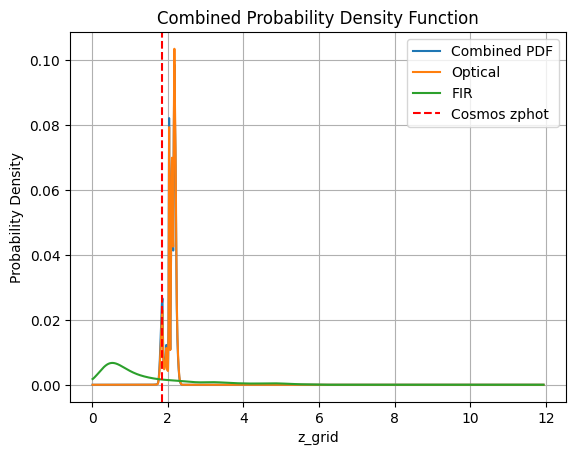

2.1738658

In [506]:
get_broadband_photometry(434)

In [499]:
# combined_pdf

# common_z_grid[np.where(np.array(combined_pdf)==max(combined_pdf))[0][0]]

2.0040169

In [492]:
ind = 324

The chain is shorter than 50 times the integrated autocorrelation time for 2 parameter(s). Use this estimate with caution and run a longer chain!
N/50 = 60;
tau: [245.83462441 243.63536421]


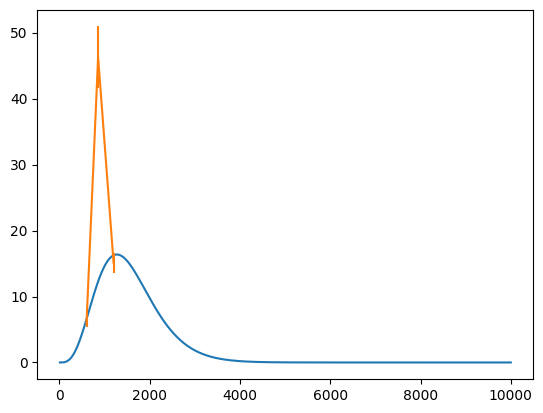

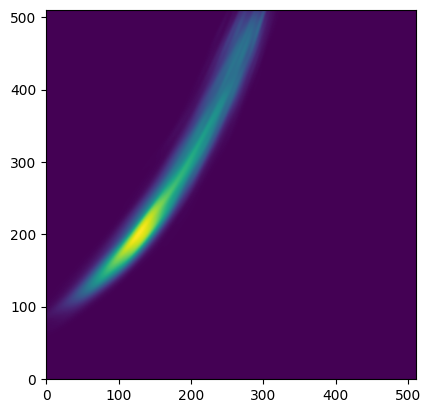

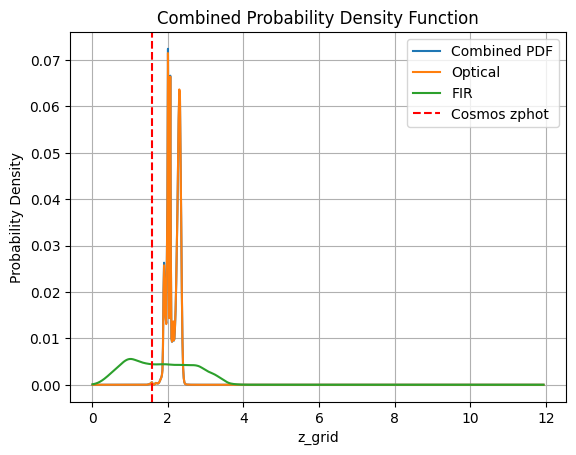

In [493]:
import numpy as np
from scipy.interpolate import interp1d

# Generate example data for two PDFs
# p1_z = np.exp(self.lnp[ind,:])


p_FIR = get_z_and_T_for_one_galaxy(FIR_index[ind])[4]/np.sum(p_FIR)




p_optical = np.exp(self.lnp[ind,:])/np.sum(p_optical)



p_optical /= np.sum(p_optical)

# # Create a common grid for interpolation
# common_z_grid = np.linspace(min(p_optical), max(p_optical), len(p_optical))



# # Combine the PDFs by element-wise multiplication
combined_pdf = p_FIR * p_optical

# Normalize the combined PDF
combined_pdf /= np.sum(combined_pdf)

# Print the first few values of the combined PDF

# z_galaxy683_cosmos = 2.322


plt.plot(common_z_grid, combined_pdf, label='Combined PDF')
plt.plot(common_z_grid, p_optical, label='Optical')
plt.plot(common_z_grid, p_FIR, label='FIR')

plt.axvline(x=z_cosmos_optical[ind], color='red', linestyle='--', label = 'Cosmos zphot' )



# z_cosmos_optical[ind]

# plt.plot(common_grid, combined_pdf, label='Combined PDF')


# plt.axvline(x=z_galaxy683_cosmos, color='red', linestyle='--', label = 'simulated z' )
plt.xlabel('z_grid')
plt.ylabel('Probability Density')
plt.title('Combined Probability Density Function')
plt.legend()
plt.grid(True)
plt.show()


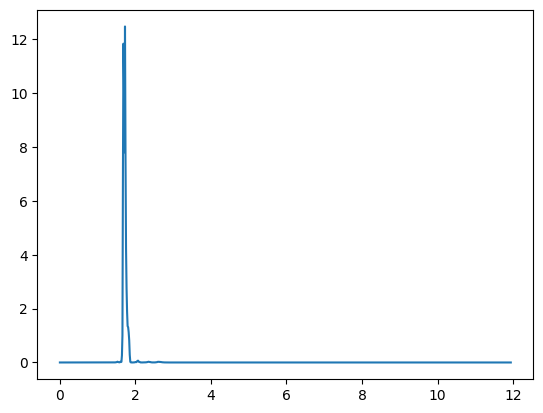

In [458]:
# plt.hist(p_optical)





plt.plot(common_z_grid, np.exp(self.lnp[10,:]), label='Optical')


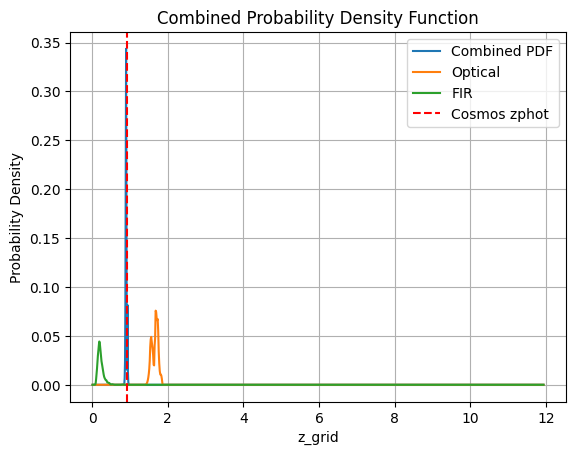

In [452]:
import numpy as np
from scipy.interpolate import interp1d

# Generate example data for two PDFs
# p1_z = np.exp(self.lnp[ind,:])


# p_FIR = get_z_and_T_for_one_galaxy(FIR_index[ind])[4]/np.sum(p_FIR)


p_optical = np.exp(self.lnp[ind,:])/np.sum(p_optical)



p_optical /= np.sum(p_optical)

# # Create a common grid for interpolation
# common_z_grid = np.linspace(min(p_optical), max(p_optical), len(p_optical))



# # Combine the PDFs by element-wise multiplication
combined_pdf = p_FIR * p_optical

# Normalize the combined PDF
combined_pdf /= np.sum(combined_pdf)

# Print the first few values of the combined PDF

# z_galaxy683_cosmos = 2.322


plt.plot(common_z_grid, combined_pdf, label='Combined PDF')
plt.plot(common_z_grid, p_optical, label='Optical')
plt.plot(common_z_grid, p_FIR, label='FIR')

plt.axvline(x=z_cosmos_optical[ind], color='red', linestyle='--', label = 'Cosmos zphot' )



z_cosmos_optical[ind]

# plt.plot(common_grid, combined_pdf, label='Combined PDF')


# plt.axvline(x=z_galaxy683_cosmos, color='red', linestyle='--', label = 'simulated z' )
plt.xlabel('z_grid')
plt.ylabel('Probability Density')
plt.title('Combined Probability Density Function')
plt.legend()
plt.grid(True)
plt.show()


The chain is shorter than 50 times the integrated autocorrelation time for 2 parameter(s). Use this estimate with caution and run a longer chain!
N/50 = 60;
tau: [279.38209403 282.43467417]


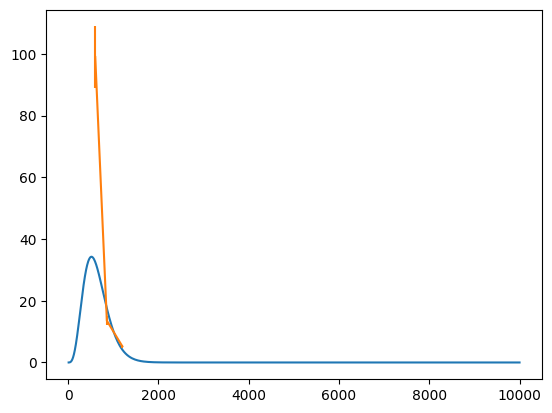

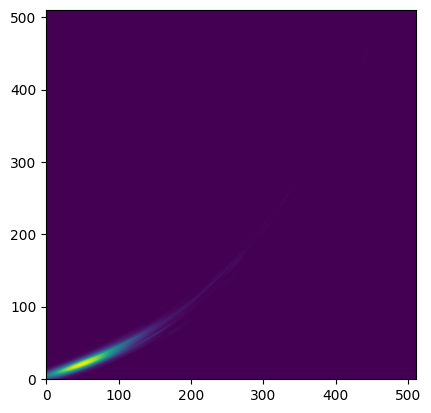

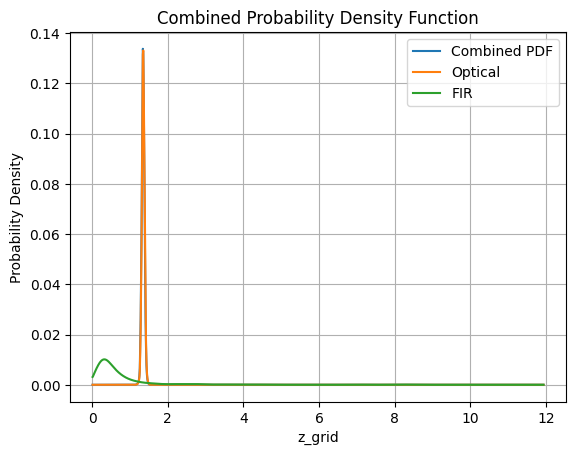

In [417]:
ind = 7




import numpy as np
from scipy.interpolate import interp1d

# Generate example data for two PDFs
# p1_z = np.exp(self.lnp[ind,:])


p_FIR = get_z_and_T_for_one_galaxy(FIR_index[ind])[4]/np.sum(p_FIR)


p_optical = np.exp(self.lnp[ind,:])/np.sum(p_optical)

p_optical /= np.sum(p_optical)

# # Create a common grid for interpolation
# common_z_grid = np.linspace(min(p_optical), max(p_optical), len(p_optical))



# # Combine the PDFs by element-wise multiplication
combined_pdf = p_FIR * p_optical

# Normalize the combined PDF
combined_pdf /= np.sum(combined_pdf)

# Print the first few values of the combined PDF

# z_galaxy683_cosmos = 2.322


plt.plot(common_z_grid, combined_pdf, label='Combined PDF')
plt.plot(common_z_grid, p_optical, label='Optical')
plt.plot(common_z_grid, p_FIR, label='FIR')

# plt.plot(common_grid, combined_pdf, label='Combined PDF')


# plt.axvline(x=z_galaxy683_cosmos, color='red', linestyle='--', label = 'simulated z' )
plt.xlabel('z_grid')
plt.ylabel('Probability Density')
plt.title('Combined Probability Density Function')
plt.legend()
plt.grid(True)
plt.show()


In [418]:
peaks, _ = find_peaks(p_FIR, height=0.01)

len(peaks)

1

In [435]:


Dub_data['zphot'][666]




1.5835

The chain is shorter than 50 times the integrated autocorrelation time for 2 parameter(s). Use this estimate with caution and run a longer chain!
N/50 = 60;
tau: [326.11180727 368.9075907 ]


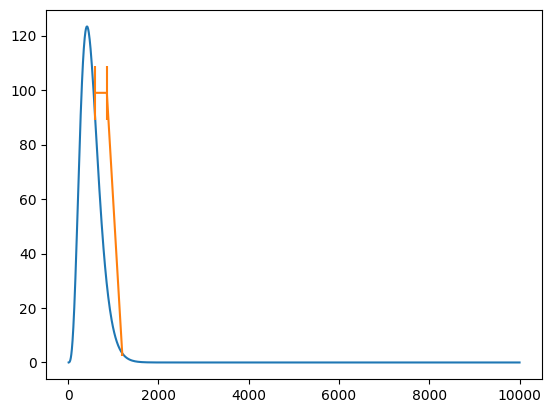

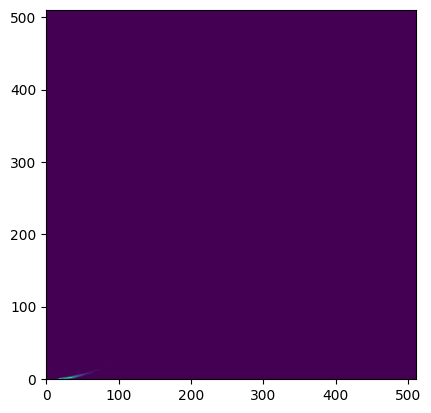

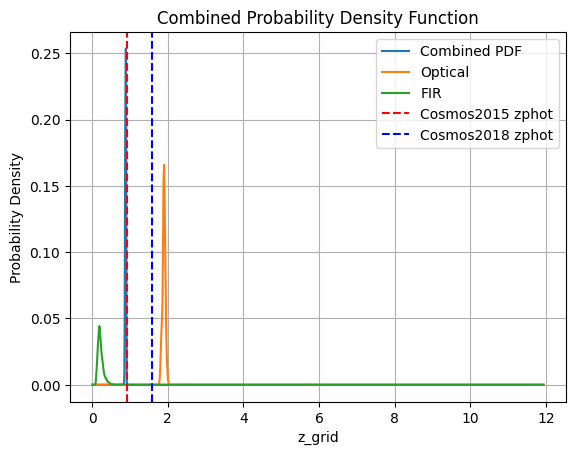

In [436]:
ind = 666




import numpy as np
from scipy.interpolate import interp1d

# Generate example data for two PDFs
# p1_z = np.exp(self.lnp[ind,:])


# p_FIR = get_z_and_T_for_one_galaxy(FIR_index[ind])[4]/np.sum(p_FIR)


p_optical = np.exp(self.lnp[ind,:])/np.sum(p_optical)

p_optical /= np.sum(p_optical)

# # Create a common grid for interpolation
# common_z_grid = np.linspace(min(p_optical), max(p_optical), len(p_optical))



# # Combine the PDFs by element-wise multiplication
combined_pdf = p_FIR * p_optical


# Normalize the combined PDF
combined_pdf /= np.sum(combined_pdf)

# Print the first few values of the combined PDF

# z_galaxy683_cosmos = 2.322


plt.plot(common_z_grid, combined_pdf, label='Combined PDF')
plt.plot(common_z_grid, p_optical, label='Optical')
plt.plot(common_z_grid, p_FIR, label='FIR')
plt.axvline(x=z_cosmos_optical[ind], color='red', linestyle='--', label = 'Cosmos2015 zphot' )

plt.axvline(x=Dub_data['zphot'][ind], color='blue', linestyle='--', label = 'Cosmos2018 zphot' )



# plt.plot(common_grid, combined_pdf, label='Combined PDF')


# plt.axvline(x=z_galaxy683_cosmos, color='red', linestyle='--', label = 'simulated z' )
plt.xlabel('z_grid')
plt.ylabel('Probability Density')
plt.title('Combined Probability Density Function')
plt.legend()
plt.grid(True)
plt.show()


In [437]:
z_cosmos_optical[ind]

0.91

In [ ]:
np.exp(self.lnp[ind,:])

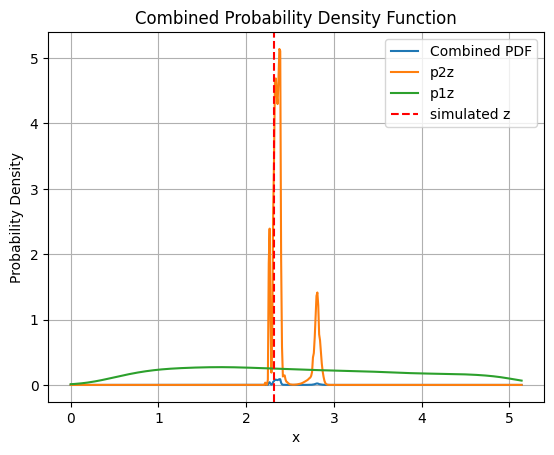

In [474]:
import numpy as np
from scipy.interpolate import interp1d

# Generate example data for two PDFs
# p1_z = np.exp(self.lnp[ind,:])


p_FIR = 
p_optical = np.exp(self.lnp[ind,:])

# # Create a common grid for interpolation
common_grid = np.linspace(min(p2_z), max(p2_z), len(p2_z))

# # Interpolate the first PDF onto the common grid
# interp_p1 = interp1d(np.linspace(min(p1_z), max(p1_z), len(p1_z)), p1_z, kind='linear', fill_value=0.0, bounds_error=False)
# interp_p1_z = interp_p1(common_grid)

# # Combine the PDFs by element-wise multiplication
combined_pdf = p1_z * p2_z

# Normalize the combined PDF
combined_pdf /= np.sum(combined_pdf)

# Print the first few values of the combined PDF

z_galaxy683_cosmos = 2.322


plt.plot(common_grid, combined_pdf, label='Combined PDF')
plt.plot(common_grid, p2_z, label='p2z')
plt.plot(common_grid, p1_z, label='p1z')
# plt.plot(common_grid, combined_pdf, label='Combined PDF')


plt.axvline(x=z_galaxy683_cosmos, color='red', linestyle='--', label = 'simulated z' )
plt.xlabel('x')
plt.ylabel('Probability Density')
plt.title('Combined Probability Density Function')
plt.legend()
plt.grid(True)
plt.show()


In [407]:
best_z_val=common_grid[np.where(np.array(combined_pdf)==max(combined_pdf))[0][0]]

best_z_val

2.3014748769647935

2.3014748769647935

In [440]:
# np.array(zout['z_spec'])[ind]
# np.array(zout['z_phot'])[ind]

# len(common_z_grid)

# len(optical_index)

763

# running for galaxies with clear 2 peak degenerate. 

In [547]:
selected_degen = np.array([7,33, 34, 43, 52, 60, 62, 65, 68, 72, 73, 77, 80, 82, 83, 87, 118,129,149,155,171,244, 268, 273, 280, 283, 287])



The chain is shorter than 50 times the integrated autocorrelation time for 2 parameter(s). Use this estimate with caution and run a longer chain!
N/50 = 60;
tau: [333.86665764 335.29796949]


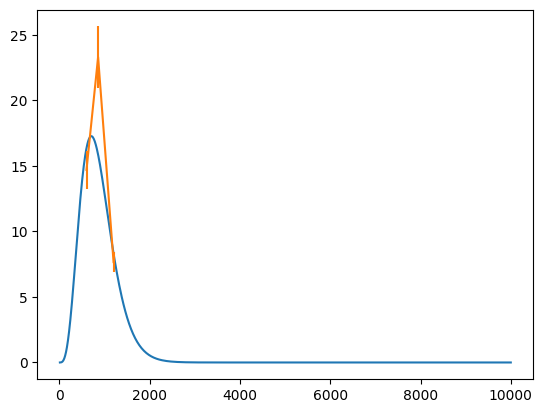

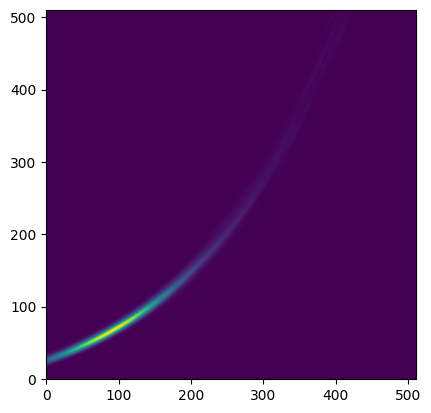

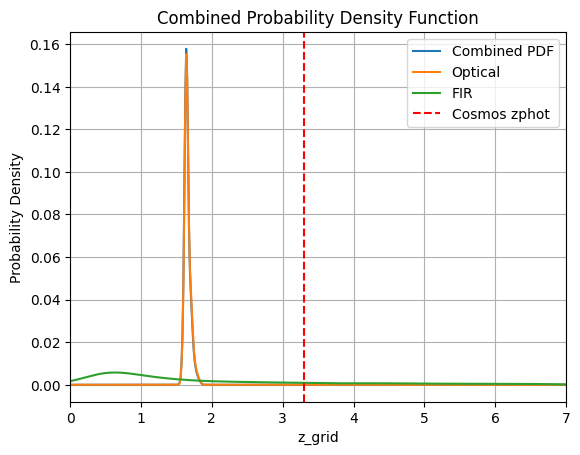

1.6378134

In [530]:
get_broadband_photometry(34)

In [594]:
# degenerate_galaxy

_____________ Index:  12
The chain is shorter than 50 times the integrated autocorrelation time for 2 parameter(s). Use this estimate with caution and run a longer chain!
N/50 = 60;
tau: [311.37189885 327.85821146]


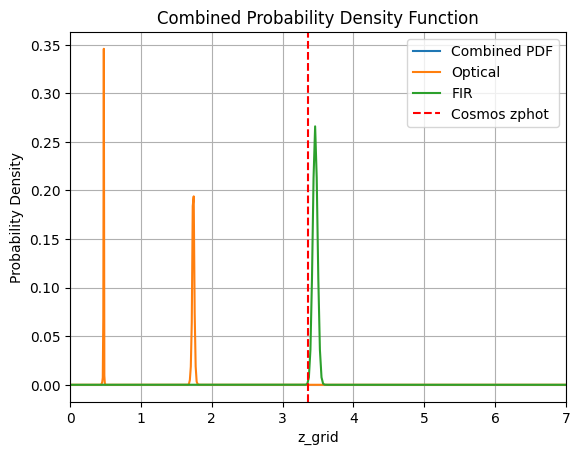

_____________ Index:  78
The chain is shorter than 50 times the integrated autocorrelation time for 2 parameter(s). Use this estimate with caution and run a longer chain!
N/50 = 60;
tau: [311.37705029 309.29268846]


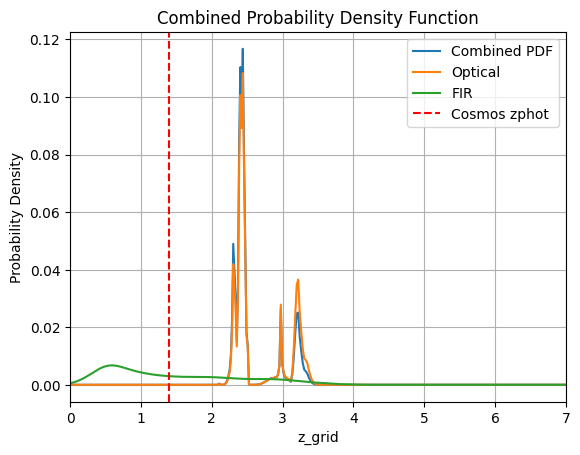

_____________ Index:  80
The chain is shorter than 50 times the integrated autocorrelation time for 2 parameter(s). Use this estimate with caution and run a longer chain!
N/50 = 60;
tau: [285.40902557 290.03189963]


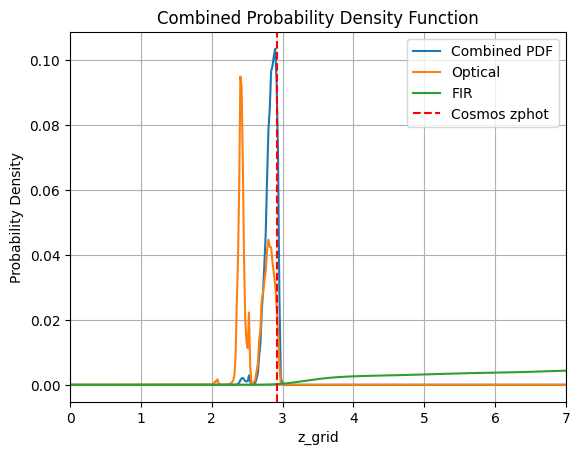

_____________ Index:  98
The chain is shorter than 50 times the integrated autocorrelation time for 2 parameter(s). Use this estimate with caution and run a longer chain!
N/50 = 60;
tau: [312.33285963 323.52465031]


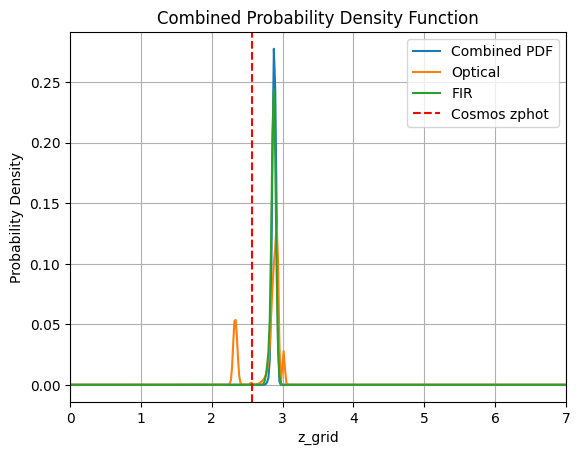

_____________ Index:  113
The chain is shorter than 50 times the integrated autocorrelation time for 2 parameter(s). Use this estimate with caution and run a longer chain!
N/50 = 60;
tau: [305.65891237 311.32877569]


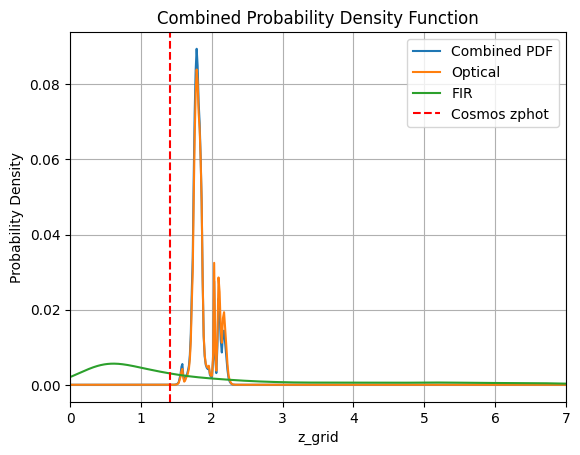

_____________ Index:  138
The chain is shorter than 50 times the integrated autocorrelation time for 2 parameter(s). Use this estimate with caution and run a longer chain!
N/50 = 60;
tau: [319.52910795 317.76733249]


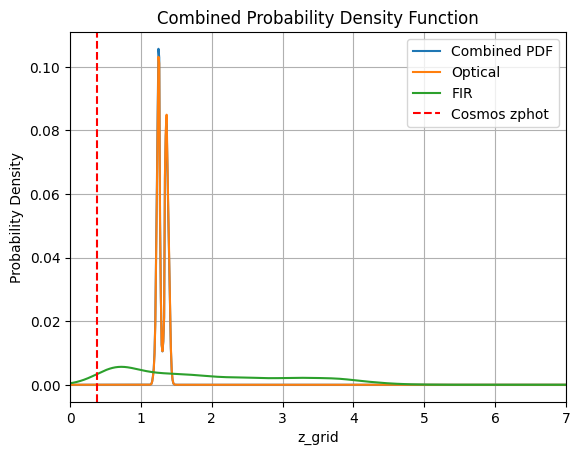

_____________ Index:  141
The chain is shorter than 50 times the integrated autocorrelation time for 2 parameter(s). Use this estimate with caution and run a longer chain!
N/50 = 60;
tau: [255.96003203 246.77997172]


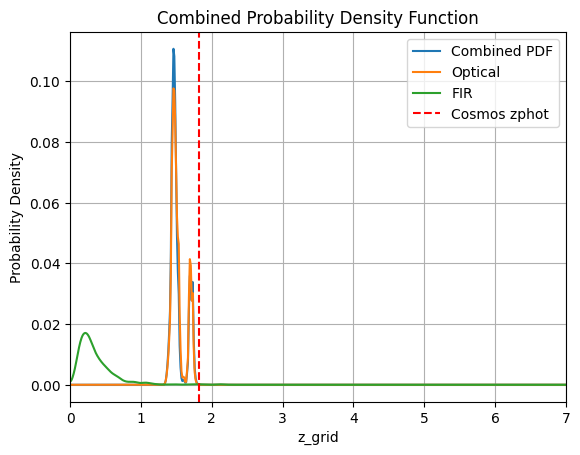

_____________ Index:  146
The chain is shorter than 50 times the integrated autocorrelation time for 2 parameter(s). Use this estimate with caution and run a longer chain!
N/50 = 60;
tau: [224.05975144 220.07110239]


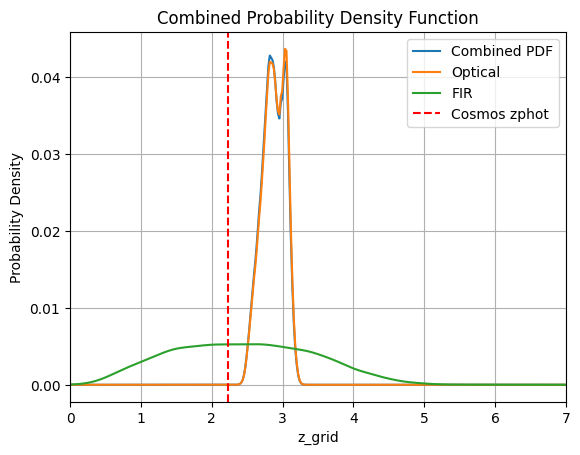

_____________ Index:  152
The chain is shorter than 50 times the integrated autocorrelation time for 2 parameter(s). Use this estimate with caution and run a longer chain!
N/50 = 60;
tau: [308.59332614 316.41956707]


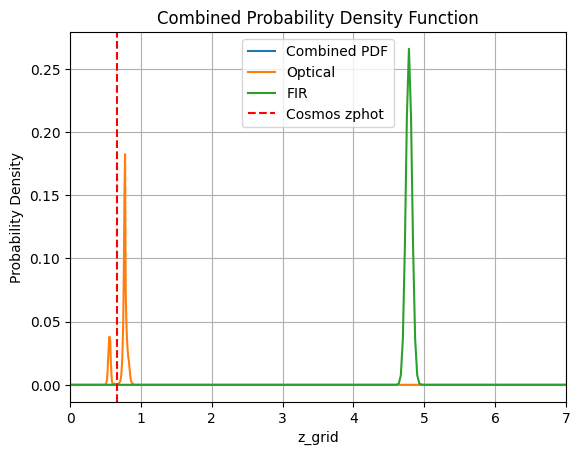

_____________ Index:  161
The chain is shorter than 50 times the integrated autocorrelation time for 2 parameter(s). Use this estimate with caution and run a longer chain!
N/50 = 60;
tau: [265.27380543 208.39083296]


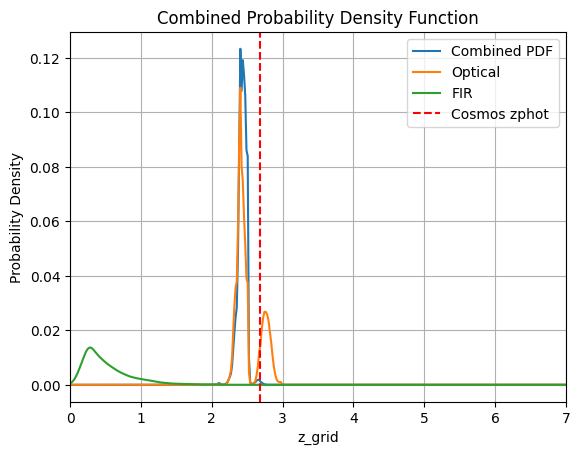

_____________ Index:  162
The chain is shorter than 50 times the integrated autocorrelation time for 2 parameter(s). Use this estimate with caution and run a longer chain!
N/50 = 60;
tau: [272.48338279 208.56503056]


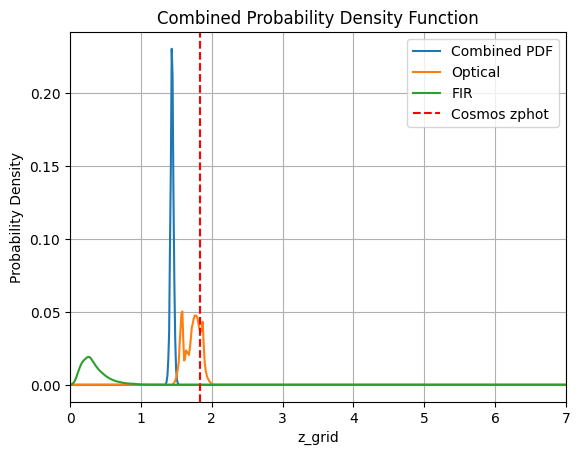

_____________ Index:  170
The chain is shorter than 50 times the integrated autocorrelation time for 2 parameter(s). Use this estimate with caution and run a longer chain!
N/50 = 60;
tau: [307.70748797 308.08864662]


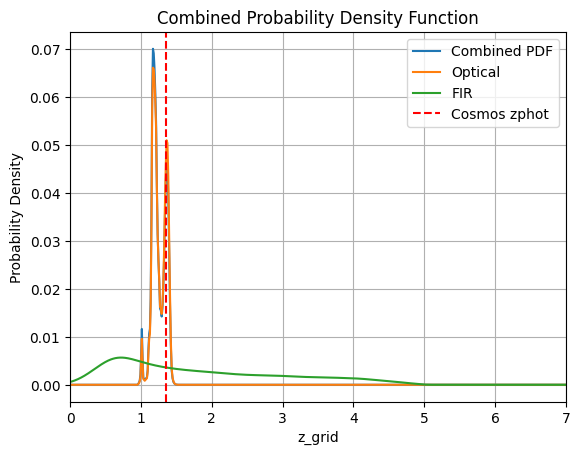

_____________ Index:  175
The chain is shorter than 50 times the integrated autocorrelation time for 2 parameter(s). Use this estimate with caution and run a longer chain!
N/50 = 60;
tau: [314.99151392 312.43811966]


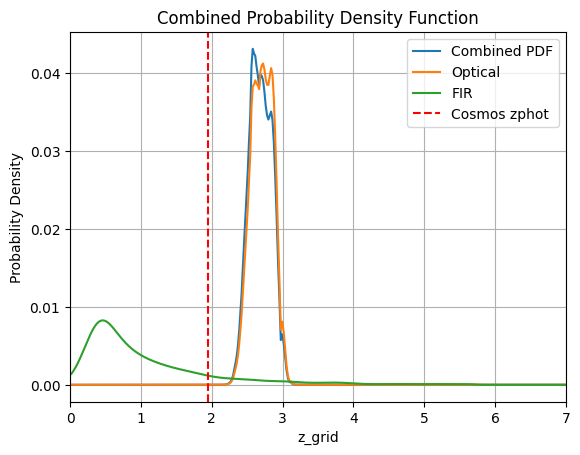

_____________ Index:  182
The chain is shorter than 50 times the integrated autocorrelation time for 2 parameter(s). Use this estimate with caution and run a longer chain!
N/50 = 60;
tau: [285.06841678 291.39348208]


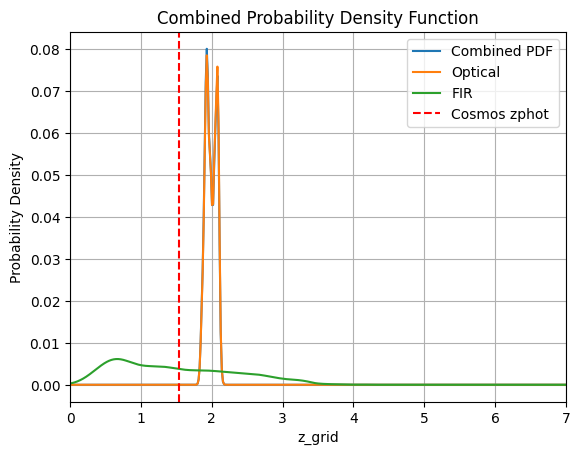

_____________ Index:  186
The chain is shorter than 50 times the integrated autocorrelation time for 2 parameter(s). Use this estimate with caution and run a longer chain!
N/50 = 60;
tau: [297.13912579 295.06418018]


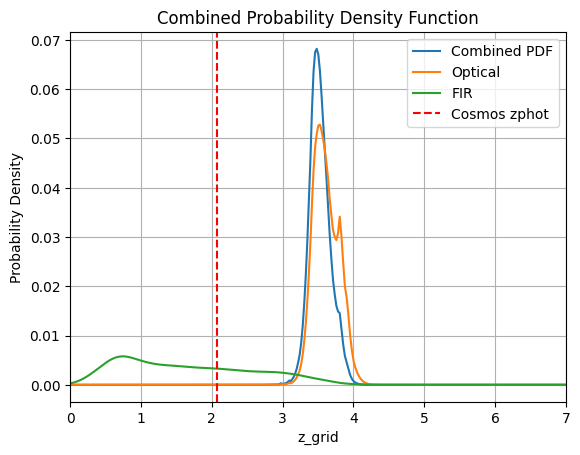

_____________ Index:  195
The chain is shorter than 50 times the integrated autocorrelation time for 2 parameter(s). Use this estimate with caution and run a longer chain!
N/50 = 60;
tau: [257.91660678 257.35316248]


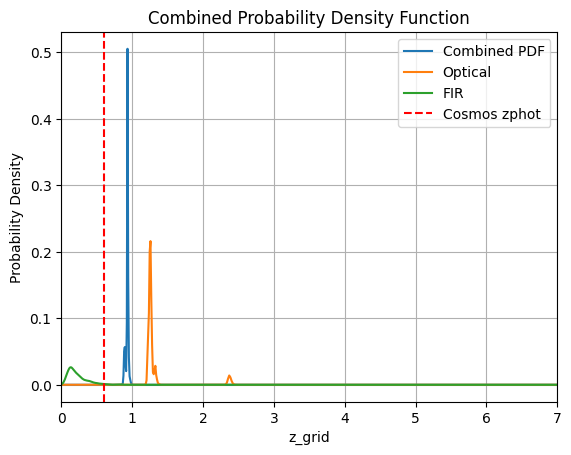

_____________ Index:  297
The chain is shorter than 50 times the integrated autocorrelation time for 2 parameter(s). Use this estimate with caution and run a longer chain!
N/50 = 60;
tau: [331.62976    337.24368341]


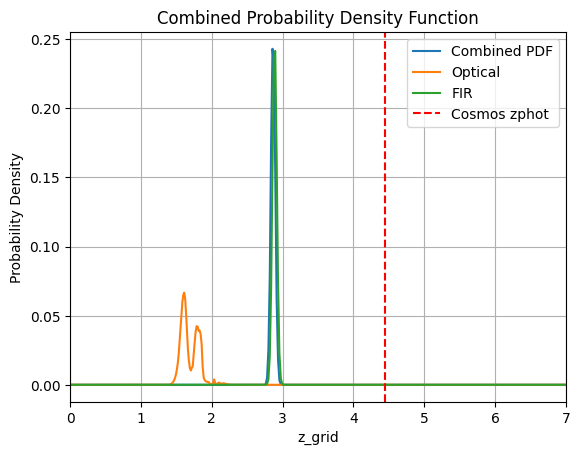

_____________ Index:  323
The chain is shorter than 50 times the integrated autocorrelation time for 2 parameter(s). Use this estimate with caution and run a longer chain!
N/50 = 60;
tau: [321.8101505  319.31900417]


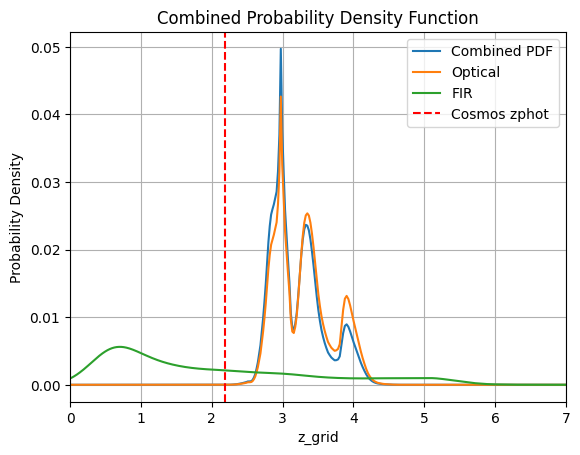

_____________ Index:  369
The chain is shorter than 50 times the integrated autocorrelation time for 2 parameter(s). Use this estimate with caution and run a longer chain!
N/50 = 60;
tau: [306.16783991 305.54458271]


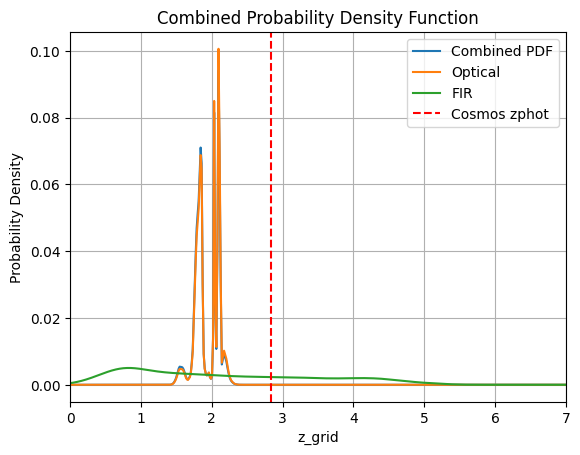

_____________ Index:  378
The chain is shorter than 50 times the integrated autocorrelation time for 2 parameter(s). Use this estimate with caution and run a longer chain!
N/50 = 60;
tau: [333.88705523 335.31458389]


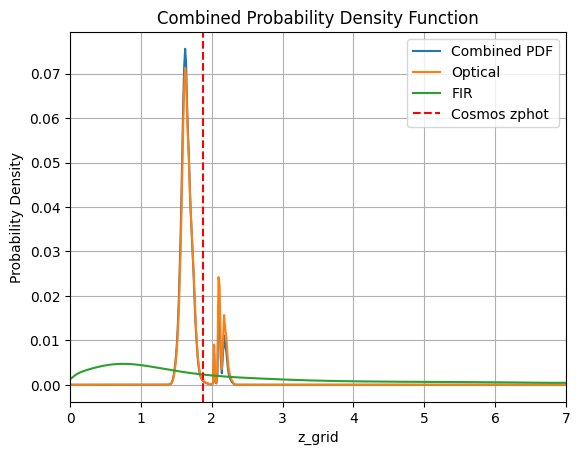

_____________ Index:  434
The chain is shorter than 50 times the integrated autocorrelation time for 2 parameter(s). Use this estimate with caution and run a longer chain!
N/50 = 60;
tau: [315.44555502 317.23622562]


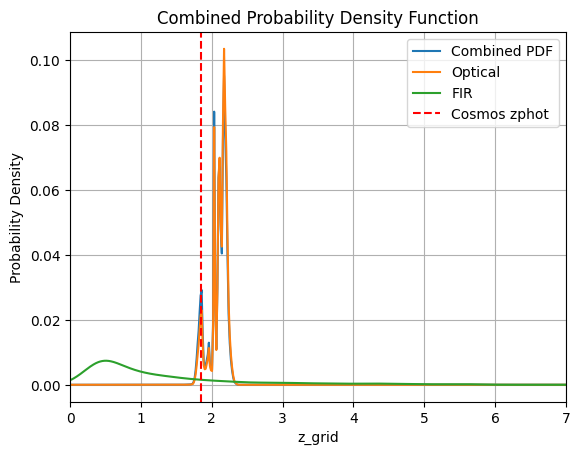

_____________ Index:  651
The chain is shorter than 50 times the integrated autocorrelation time for 2 parameter(s). Use this estimate with caution and run a longer chain!
N/50 = 60;
tau: [239.86892405 240.71147436]


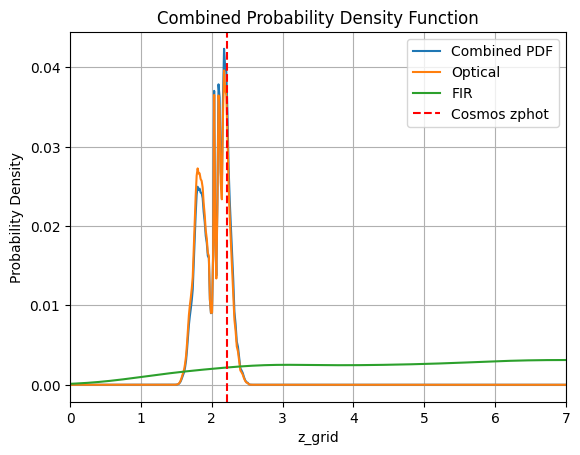

_____________ Index:  713
The chain is shorter than 50 times the integrated autocorrelation time for 2 parameter(s). Use this estimate with caution and run a longer chain!
N/50 = 60;
tau: [294.48057068 298.4453287 ]


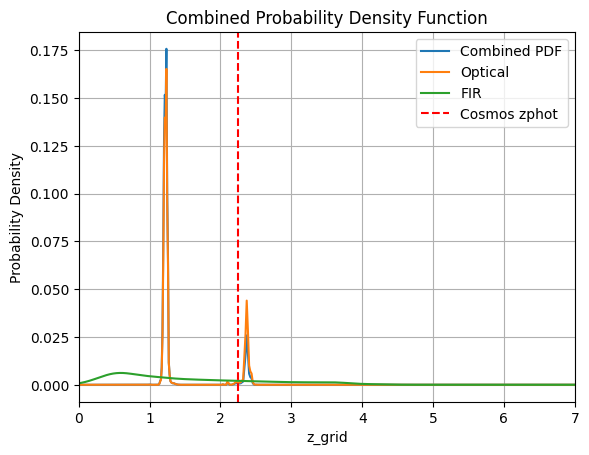

_____________ Index:  723
The chain is shorter than 50 times the integrated autocorrelation time for 2 parameter(s). Use this estimate with caution and run a longer chain!
N/50 = 60;
tau: [297.67333312 294.5935514 ]


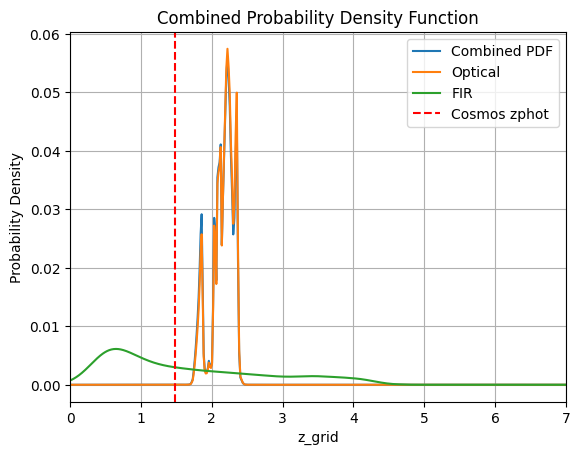

_____________ Index:  737
The chain is shorter than 50 times the integrated autocorrelation time for 2 parameter(s). Use this estimate with caution and run a longer chain!
N/50 = 60;
tau: [290.24755174 299.8257249 ]


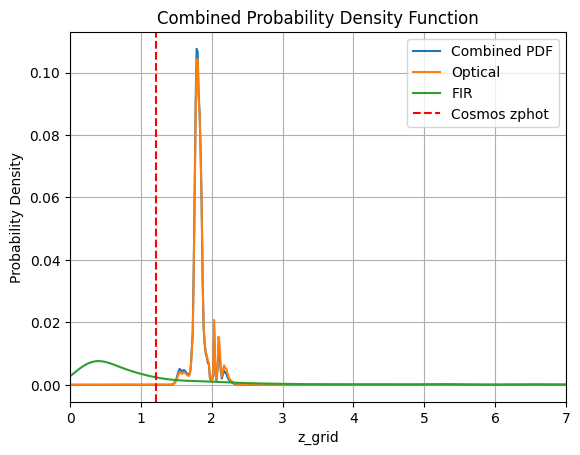

_____________ Index:  744
The chain is shorter than 50 times the integrated autocorrelation time for 2 parameter(s). Use this estimate with caution and run a longer chain!
N/50 = 60;
tau: [334.4129602  333.62561056]


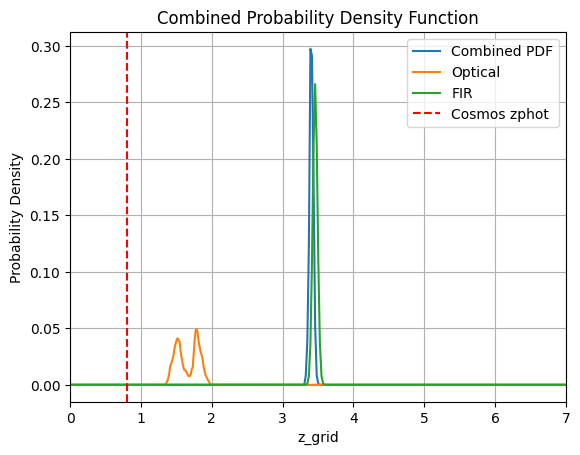

_____________ Index:  755
The chain is shorter than 50 times the integrated autocorrelation time for 2 parameter(s). Use this estimate with caution and run a longer chain!
N/50 = 60;
tau: [216.33623291 332.02143172]


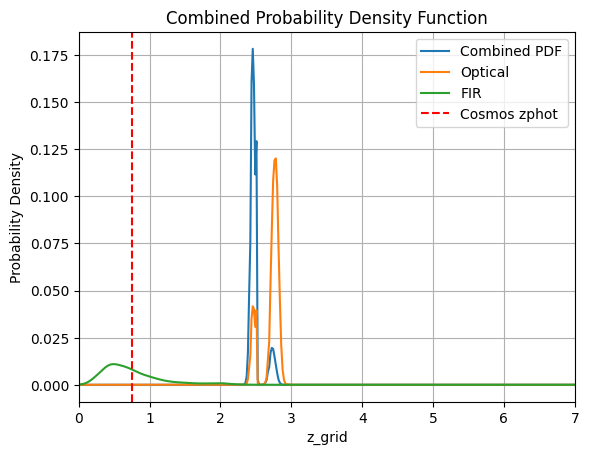

In [606]:
# degenerate_galaxy = []

# for i in range(len(selected_degen)):
#     degenerate_galaxy.append(list_of_degen[selected_degen[i]])
    

for i in range(len(degenerate_galaxy)):
    
    
    
    print('_____________ Index: ',degenerate_galaxy[i] )   
    
    get_broadband_photometry(degenerate_galaxy[i])

    
    
    
    

In [592]:
# degenerate_galaxy